<a href="https://colab.research.google.com/github/ClaudiaA18/AAD/blob/main/Proiect_AAD_rate_suicide_nou.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Componenta Echipa
*   Cioată Dragoș-Robert 341C2
*   Gîrniță Alexandra-Claudia 343C5
*   Popescu Maria-Teodora 345C1

Link document principal:
https://docs.google.com/document/d/1dmxGUODDx3lIvLtH-igWeGqKlDcRgvW-3UHiHmCelSU/edit?tab=t.0

Link kagle:
https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021

Cerinta proiectului
https://docs.google.com/document/d/1zaW0c6cR_a7Q0nhA_Cpsy49aknSKmY82VvZ-SF04AJ8/edit?tab=t.0

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
!mkdir -p ~/.kaggle
!cp '/content/drive/My Drive/kaggle/kaggle.json' ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import kaggle
kaggle.api.dataset_download_files('omkargowda/suicide-rates-overview-1985-to-2021', path='./data', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/omkargowda/suicide-rates-overview-1985-to-2021


## TASK-URI PROIECT [cerinte proiect](https://docs.google.com/document/d/1zaW0c6cR_a7Q0nhA_Cpsy49aknSKmY82VvZ-SF04AJ8/edit?tab=t.0)

# Etapa 1: Procesarea și analiza datelor

În această primă etapă, echipele vor lucra la curățarea și prelucrarea setului de date ales, incluzând pași precum identificarea valorilor lipsă, tratarea valorilor anormale, filtrarea, sortarea, gruparea și agregarea datelor. De asemenea, vor crea vizualizări de bază pentru a înțelege structura și relațiile dintre date.




## Verificarea calității datelor

Încărcarea și prezentarea setului de date
* Importarea bibliotecilor necesare
* Încărcarea datelor din master.csv & auxiliare
* Afișarea primelor și ultimelor rânduri din dataset
* Verificarea dimensiunilor (număr de rânduri și coloane) și afișarea tipurilor de date pentru fiecare coloană

Analiza și prelucrarea coloanelor din tabel
* Prelucrari utilizare fiecare coloana din tabela
* Calculul numărului/procentajului de valori lipsă pentru fiecare coloană
* Decizia de tratare a valorilor lipsă (eliminare, imputare, etc.)
* Corectarea erorilor de formatare sau inconsistențelor

Identificarea și tratarea valorilor aberante (outliers)
* Detectarea outlierilor prin metode statistice (Z-score, IQR)
* Vizualizarea distribuției datelor pentru identificarea valorilor extreme
* Decizia privind tratarea outlierilor și implementarea strategiei



1. Încărcarea și prezentarea setului de date

---



* Importarea bibliotecilor necesare

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
from matplotlib.colors import LinearSegmentedColormap
from scipy.stats import zscore
import ipywidgets as widgets
from IPython.display import display, clear_output
from scipy.stats import pearsonr, spearmanr
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

* Încărcarea datelor din master.csv

In [ ]:
df = pd.read_csv('./data/master.csv', sep=',')
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN     2,15,66,24,900   
1               5.19  Albania1987           NaN     2,15,66,24,900   
2               4.83  Albania1987           NaN     2,15,66,24,900   
3               4.59  Albania1987           NaN     2,15,66,24,900   
4               3.28  Albania1987           NaN     2,15,66,24,900   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2               796.0     Generation X  
3               796.0  G.I. Generation  
4               796.0          Boomers

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [ ]:
# Comunism vs democratie
df_communist = pd.read_csv('data/communist_vs_democracy_counterparts.csv')
df_communist.head()

Communist_Country Democratic_Counterpart  Communism_Start_Year  \
0           Romania                Germany                  1947   
1          Bulgaria                 France                  1946   
2           Hungary         United Kingdom                  1949   
3            Poland          United States                  1947   
4    Czechoslovakia                 Canada                  1948   

   Communism_End_Year  
0              1989.0  
1              1990.0  
2              1989.0  
3              1989.0  
4              1989.0

In [ ]:
df_communist.info()
# OBS: Exista 5 tari care au ca forma de guvernare comunismul (modul de tratare al datelor fiind "inexact")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Communist_Country       37 non-null     object 
 1   Democratic_Counterpart  37 non-null     object 
 2   Communism_Start_Year    37 non-null     int64  
 3   Communism_End_Year      32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.3+ KB


In [ ]:
# Crize economice
df_economic = pd.read_csv('data/economic_crises_1985_2021.csv')
df_economic.head()

Region/Country     Period                     Crisis
0            USA  2008-2009    Global Financial Crisis
1          Japan  1990-1992   Asset Price Bubble Burst
2        Germany  2008-2009    Global Financial Crisis
3         Brazil  2014-2016  Brazilian Economic Crisis
4         Russia  1998-1999   Russian Financial Crisis

In [ ]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Region/Country  20 non-null     object
 1   Period          20 non-null     object
 2   Crisis          20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [ ]:
# Conflicte
df_conflicts = pd.read_csv('data/conflicts_1985_2021.csv')
df_conflicts.head()

Country                   Period          Conflict Description
0      Rwanda                1990–1994        Genocide and civil war
1  D.R. Congo                1996–2003                Congolese Wars
2     Somalia             1991–present                     Civil war
3       Sudan  1983–2005, 2003–present   Civil war and Darfur crisis
4    Ethiopia     1998–2000, 2020–2022  War with Eritrea, Tigray War

In [ ]:
df_conflicts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Country               24 non-null     object
 1   Period                24 non-null     object
 2   Conflict Description  24 non-null     object
dtypes: object(3)
memory usage: 708.0+ bytes


In [ ]:
# Dezastre/Catastrofe
df_disasters = pd.read_csv('data/major_disasters_1985_2021.csv')
df_disasters.head()

Country  Year     Type                           Disaster
0    Armenia  1988  Natural                  Spitak Earthquake
1        USA  2005  Natural                  Hurricane Katrina
2  Indonesia  2004  Natural  Indian Ocean Earthquake & Tsunami
3      Haiti  2010  Natural                   Haiti Earthquake
4      Japan  2011  Natural        Tohoku Earthquake & Tsunami

In [ ]:
df_disasters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   20 non-null     object
 1   Year      20 non-null     int64 
 2   Type      20 non-null     object
 3   Disaster  20 non-null     object
dtypes: int64(1), object(3)
memory usage: 772.0+ bytes


In [ ]:
# Corelatie tari - continente
# info : https://github.com/dbouquin/IS_608/blob/master/NanosatDB_munging/Countries-Continents.csv
df_continents = pd.read_csv('data/countries-continents.csv')
df_continents.columns = ['country', 'continent']
df_continents.head()

country      continent
0              Aruba  North America
1         Cabo Verde         Africa
2              Macau           Asia
3  Republic of Korea           Asia
4           Kiribati        Oceania

In [ ]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   country    114 non-null    object
 1   continent  114 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


Analiza și prelucrarea coloanelor din tabel

In [ ]:
df.columns.tolist()

['country',
 'year',
 'sex',
 'age',
 'suicides_no',
 'population',
 'suicides/100k pop',
 'country-year',
 'HDI for year',
 ' gdp_for_year ($) ',
 'gdp_per_capita ($)',
 'generation']

In [ ]:
df[' gdp_for_year ($) '] = df[' gdp_for_year ($) '].str.replace(',', '')
df[' gdp_for_year ($) '] = pd.to_numeric(df[' gdp_for_year ($) '], errors='coerce')

print(df[' gdp_for_year ($) '].dtype)
df['suicides_no'] = df['suicides_no'].fillna(0)
df.head()

float64


country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   

   suicides/100k pop country-year  HDI for year   gdp_for_year ($)   \
0               6.71  Albania1987           NaN        2.156625e+09   
1               5.19  Albania1987           NaN        2.156625e+09   
2               4.83  Albania1987           NaN        2.156625e+09   
3               4.59  Albania1987           NaN        2.156625e+09   
4               3.28  Albania1987           NaN        2.156625e+09   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2               796.0     Generation X  
3               796.0  G.I. Generation  
4               796.0          Boomers

In [ ]:
# Observam ca in csv-ul despre conflicte, nu este o repartizare eficienta
# Impartim perioadele pentru o relatie de 1 to 1

def split_periods(row):
    country = row['Country']
    description = row['Conflict Description']
    periods = row['Period'].split(',')
    return [{'Country': country,
             'Period': p.strip(),
             'Conflict Description': description} for p in periods]


expanded_rows = []
for _, row in df_conflicts.iterrows():
    expanded_rows.extend(split_periods(row))

df_conflicts_expanded = pd.DataFrame(expanded_rows)


def extract_years(period):
    start_end = period.split('–')
    start = start_end[0].strip()
    end = start_end[1].strip() if len(start_end) > 1 else None
    return pd.Series([start, end])

df_conflicts_expanded[['Start Year', 'End Year']] = df_conflicts_expanded['Period'].apply(extract_years)

df_conflicts_expanded.head(10)

Country        Period          Conflict Description Start Year End Year
0      Rwanda     1990–1994        Genocide and civil war       1990     1994
1  D.R. Congo     1996–2003                Congolese Wars       1996     2003
2     Somalia  1991–present                     Civil war       1991  present
3       Sudan     1983–2005   Civil war and Darfur crisis       1983     2005
4       Sudan  2003–present   Civil war and Darfur crisis       2003  present
5    Ethiopia     1998–2000  War with Eritrea, Tigray War       1998     2000
6    Ethiopia     2020–2022  War with Eritrea, Tigray War       2020     2022
7     Liberia     1989–1997                    Civil wars       1989     1997
8     Liberia     1999–2003                    Civil wars       1999     2003
9  Mozambique     1977–1992                     Civil war       1977     1992

In [ ]:
# Imputare HDI
# Inainte
print("Valori lipsa HDI", df['HDI for year'].isna().sum())
print(f"Procent: {df['HDI for year'].isna().sum() / len(df) * 100:.2f}%")

# Tari fara HDI vs cele cu HDI
countries_with_hdi = df.groupby('country')['HDI for year'].count()
countries_without_hdi = countries_with_hdi[countries_with_hdi == 0].index.tolist()

print(f"Nr tari fara HDI: {len(countries_without_hdi)}")
if countries_without_hdi:
    print("Nume tari:", countries_without_hdi)

Valori lipsa HDI 19456
Procent: 61.27%
Nr tari fara HDI: 8
Nume tari: ['Aruba', 'Cabo Verde', 'Dominica', 'Kiribati', 'Macau', 'Mongolia', 'Saint Kitts and Nevis', 'San Marino']


In [ ]:
# Tari cu HDI
df['HDI for year'] = df.groupby('country')['HDI for year'].transform(lambda x: x.fillna(x.mean()))
df.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   

   suicides/100k pop country-year  HDI for year   gdp_for_year ($)   \
0               6.71  Albania1987         0.673        2.156625e+09   
1               5.19  Albania1987         0.673        2.156625e+09   
2               4.83  Albania1987         0.673        2.156625e+09   
3               4.59  Albania1987         0.673        2.156625e+09   
4               3.28  Albania1987         0.673        2.156625e+09   

   gdp_per_capita ($)       generation  
0               796.0     Generation X  
1               796.0           Silent  
2               796.0     Generation X  
3               796.0  G.I. Generation  
4               796.0          Boomers

In [ ]:
# Tari fara HDI
# adaugare coloana de continente
df = df.merge(df_continents, how="left", on="country")

# media HDI pe tara si pe continent
country_hdi_mean = df.groupby('country')['HDI for year'].transform('mean')
continent_hdi_mean = df.groupby('continent')['HDI for year'].transform('mean')
global_hdi_mean = df['HDI for year'].mean()

# imputare
# media pe tara
df['HDI for year'] = df.groupby('country')['HDI for year'].transform(lambda x: x.fillna(x.mean()))

# media pe continent
df['HDI for year'] = df.groupby('continent')['HDI for year'].transform(lambda x: x.fillna(x.mean()))

# media globala
df['HDI for year'] = df['HDI for year'].fillna(df['HDI for year'].mean())

print("Valori lipsa HDI:", df['HDI for year'].isna().sum())

Valori lipsa HDI: 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         31756 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        31756 non-null  float64
 9    gdp_for_year ($)   31756 non-null  float64
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
 12  continent           31756 non-null  object 
dtypes: float64(5), int64(2), object(6)
memory usage: 3.1+ MB


In [ ]:
unique_countries = df['country'].unique().tolist()
print(unique_countries)

['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 'San Marino

In [ ]:
df.head(10)

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years         21.0      312900   
1  Albania  1987    male  35-54 years         16.0      308000   
2  Albania  1987  female  15-24 years         14.0      289700   
3  Albania  1987    male    75+ years          1.0       21800   
4  Albania  1987    male  25-34 years          9.0      274300   
5  Albania  1987  female    75+ years          1.0       35600   
6  Albania  1987  female  35-54 years          6.0      278800   
7  Albania  1987  female  25-34 years          4.0      257200   
8  Albania  1987    male  55-74 years          1.0      137500   
9  Albania  1987  female   5-14 years          0.0      311000   

   suicides/100k pop country-year  HDI for year   gdp_for_year ($)   \
0               6.71  Albania1987         0.673        2.156625e+09   
1               5.19  Albania1987         0.673        2.156625e+09   
2               4.83  Albania1987         0.673        2.156625e+09   
3               4.59  Albania1987         0.673        2.156625e+09   
4               3.28  Albania1987         0.673        2.156625e+09   
5               2.81  Albania1987         0.673        2.156625e+09   
6               2.15  Albania1987         0.673        2.156625e+09   
7               1.56  Albania1987         0.673        2.156625e+09   
8               0.73  Albania1987         0.673        2.156625e+09   
9               0.00  Albania1987         0.673        2.156625e+09   

   gdp_per_capita ($)       generation continent  
0               796.0     Generation X    Europe  
1               796.0           Silent    Europe  
2               796.0     Generation X    Europe  
3               796.0  G.I. Generation    Europe  
4               796.0          Boomers    Europe  
5               796.0  G.I. Generation    Europe  
6               796.0           Silent    Europe  
7               796.0          Boomers    Europe  
8               796.0  G.I. Generation    Europe  
9               796.0     Generation X    Europe

In [ ]:
df_processed = df.copy()

def extract_age_range(age_str):
    if isinstance(age_str, str):
        age_str = age_str.replace('years', '').strip()
        if '-' in age_str:
            min_age, max_age = age_str.split('-')
            return int(min_age), int(max_age)
        elif '+' in age_str:
            min_age = int(age_str.replace('+', ''))
            return min_age, 100
    return None, None

df_processed[['age_min', 'age_max']] = df_processed['age'].apply(
    lambda x: pd.Series(extract_age_range(x))
)

df_processed['age_mean'] = (df_processed['age_min'] + df_processed['age_max']) / 2

def compute_weighted_or_mean(group_df):
    total_suicides = group_df['suicides_no'].sum()
    if total_suicides == 0:
        return group_df['age_mean'].mean()
    return (group_df['age_mean'] * group_df['suicides_no']).sum() / total_suicides

group_data = df_processed.groupby('country')[['age_mean', 'suicides_no']]
weighted_avg_age = group_data.apply(compute_weighted_or_mean).reset_index(name='avg_age_weighted')

df_processed = df_processed.merge(weighted_avg_age, on='country', how='left')
df_processed.drop(columns=['age_min', 'age_max'], inplace=True)

df_processed.tail(10)

country  year     sex        age  suicides_no  \
31746                    Sweden  2017  female  75+ years         45.0   
31747               Switzerland  2017  female  75+ years         28.0   
31748                Tajikistan  2017  female  75+ years          0.0   
31749                  Thailand  2017  female  75+ years         59.0   
31750                    Turkey  2017  female  75+ years          0.0   
31751                   Ukraine  2017  female  75+ years        256.0   
31752            United Kingdom  2017  female  75+ years        104.0   
31753  United States of America  2017  female  75+ years        501.0   
31754                   Uruguay  2017  female  75+ years         14.0   
31755                Uzbekistan  2017  female  75+ years          3.0   

       population  suicides/100k pop                  country-year  \
31746    10057698           0.447418                    Sweden2017   
31747     8451840           0.331289               Switzerland2017   
31748     8925525           0.000000                Tajikistan2017   
31749    70898202           0.083218                  Thailand2017   
31750    82089826           0.000000                    Turkey2017   
31751    44831135           0.571032                   Ukraine2017   
31752    66058859           0.157435            United Kingdom2017   
31753   325122128           0.154096  United States of America2017   
31754     3422200           0.409094                   Uruguay2017   
31755    32388600           0.009263                Uzbekistan2017   

       HDI for year   gdp_for_year ($)   gdp_per_capita ($)       generation  \
31746      0.933002        5.410000e+11        53791.508730  G.I. Generation   
31747      0.937875        7.040000e+11        83352.088650  G.I. Generation   
31748      0.628268        7.536440e+09          848.672380  G.I. Generation   
31749      0.787437        4.560000e+11         6593.818352  G.I. Generation   
31750      0.795343        8.590000e+11        10589.667720  G.I. Generation   
31751      0.785458        1.120000e+11         2638.326055  G.I. Generation   
31752      0.914735        2.700000e+12        40857.755580  G.I. Generation   
31753      0.918620        1.950000e+13        60109.655730  G.I. Generation   
31754      0.816745        6.423397e+10        18690.893840  G.I. Generation   
31755      0.691258        6.208132e+10         1916.764642  G.I. Generation   

           continent  age_mean  avg_age_weighted  
31746         Europe      87.5         51.579464  
31747         Europe      87.5         54.506970  
31748           Asia      87.5         33.935028  
31749           Asia      87.5         40.388876  
31750           Asia      87.5         40.870909  
31751         Europe      87.5         49.038644  
31752         Europe      87.5         46.820846  
31753  North America      87.5         45.956308  
31754  South America      87.5         50.003932  
31755           Asia      87.5         34.861847

In [ ]:
if df_processed.isna().sum().sum() == 0:
    print("nu sunt NaN uri")


nu sunt NaN uri


***Identificarea și tratarea valorilor aberante (outliers)***




Outlieri zscore
suicides_no           451
suicides/100k pop     631
population            144
HDI for year           84
 gdp_for_year ($)     372
gdp_per_capita ($)    600
age_mean                0
avg_age_weighted        0
dtype: int64
Outlieri IQR:
suicides_no           4514
suicides/100k pop     2514
population            3942
HDI for year            60
 gdp_for_year ($)     4234
gdp_per_capita ($)    1316
age_mean                 0
avg_age_weighted         0
dtype: int64


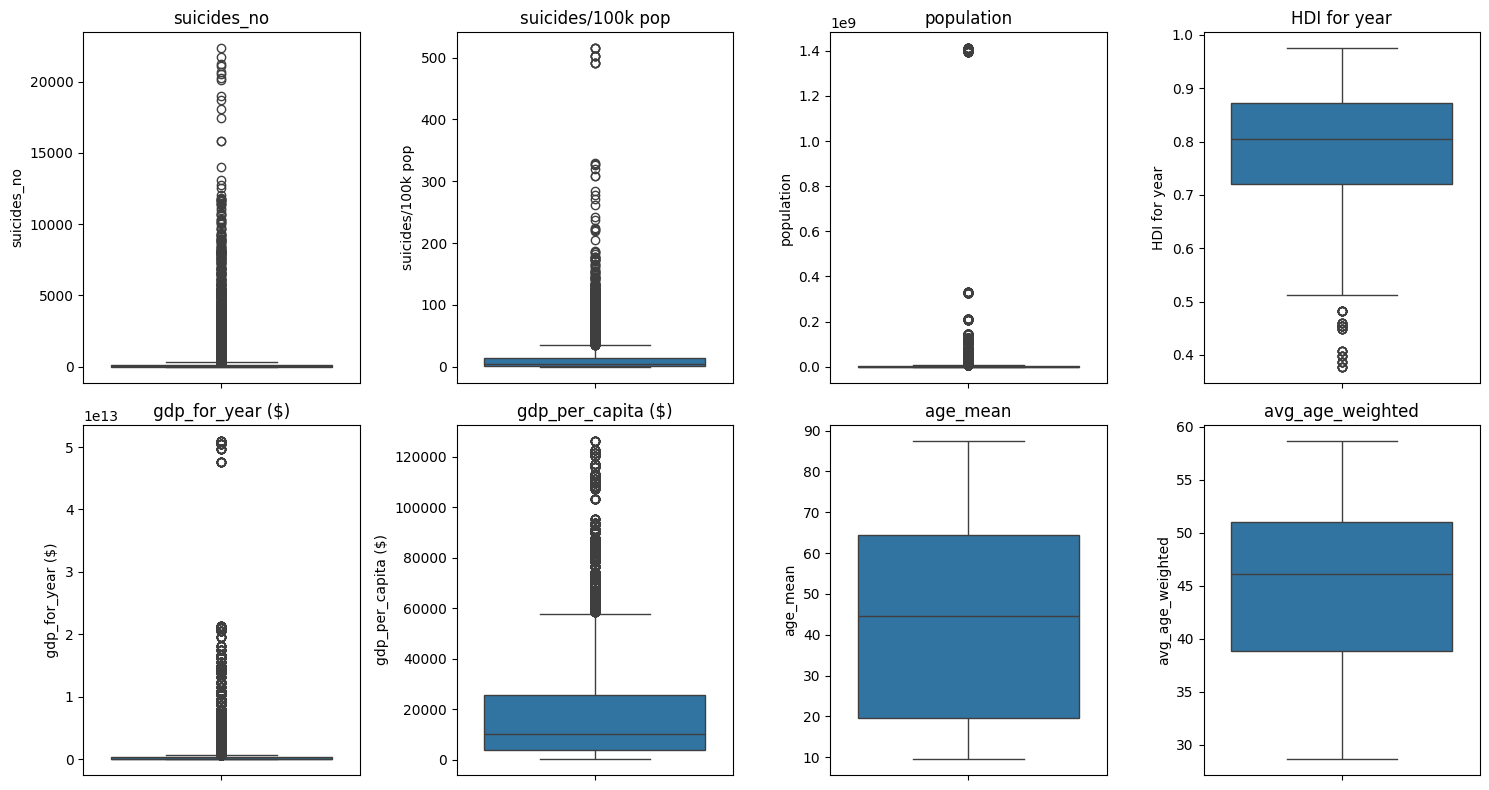

In [ ]:
# in cazul in care vom avea nevoie de un df fara valori extreme
# identificam si eliminam intr-un df separat

num_cols = ['suicides_no', 'suicides/100k pop', 'population', 'HDI for year',
            ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'age_mean', 'avg_age_weighted']

df_outlier = df_processed[num_cols].dropna()

z_scores = np.abs(zscore(df_outlier))
outliers_z = (z_scores > 3)
outlier_counts_z = outliers_z.sum(axis=0)

print("Outlieri zscore")
print(outlier_counts_z)

Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df_outlier < (Q1 - 1.5 * IQR)) | (df_outlier > (Q3 + 1.5 * IQR)))
outlier_counts_iqr = outliers_iqr.sum()

print("Outlieri IQR:")
print(outlier_counts_iqr)

plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_processed, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()


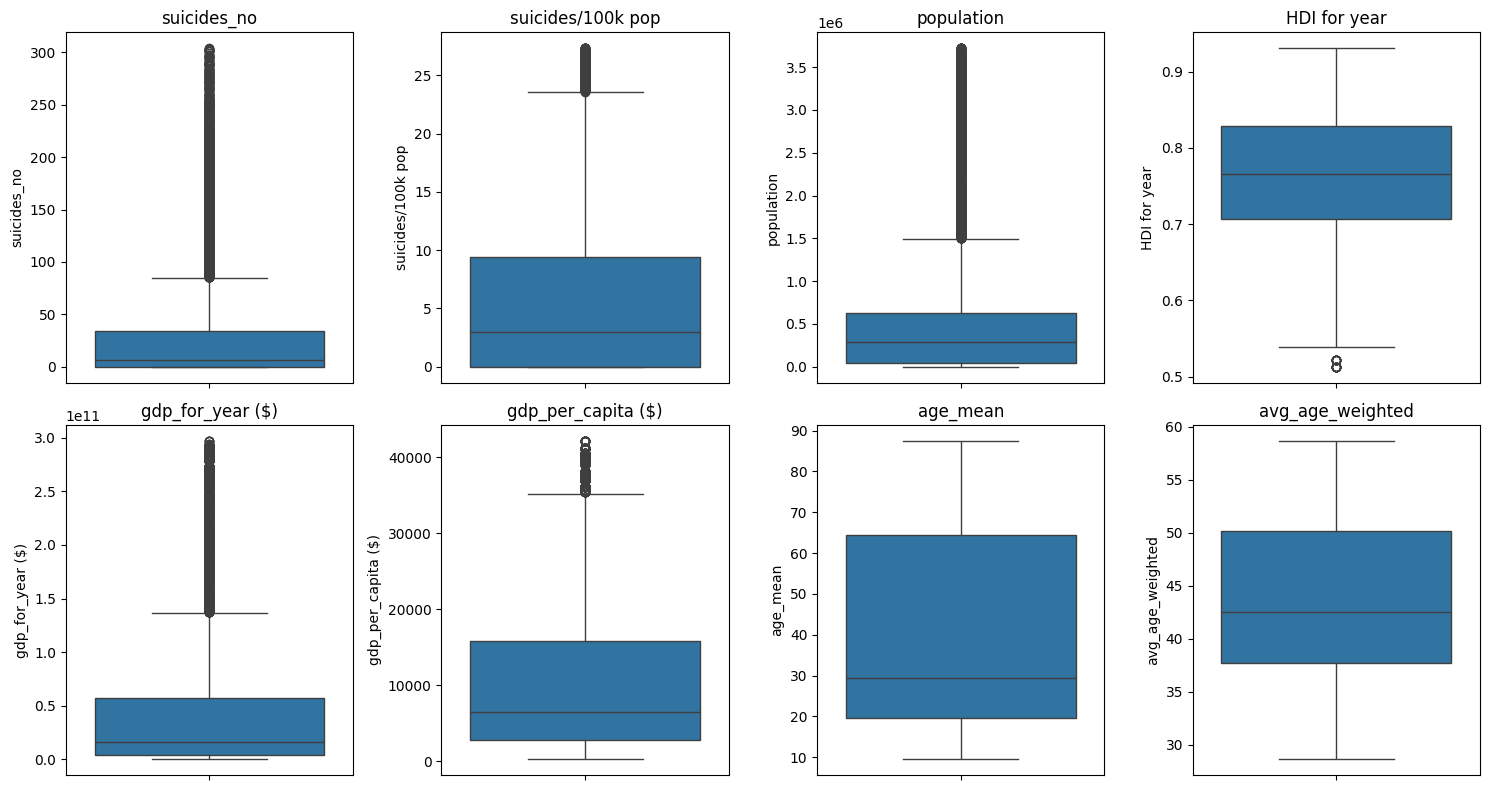

In [ ]:
# un dataframe cleaned in caz ca vom avea nevoie mai tarziu
# desi si outlierii sunt relevanti in viitoarele grafice

df_cleaned = df_processed.copy()

num_cols = ['suicides_no', 'suicides/100k pop', 'population', 'HDI for year',
            'gdp_for_year ($)', 'gdp_per_capita ($)', 'age_mean', 'avg_age_weighted']

df_cleaned.columns = df_cleaned.columns.str.strip()

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in ['suicides_no', 'suicides/100k pop', 'population', 'HDI for year',
            'gdp_for_year ($)', 'gdp_per_capita ($)']:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)


plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 4, i+1)
    sns.boxplot(data=df_cleaned, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

## Analiza cantitativă/statistică

Statistici descriptive pentru variabilele numerice
* Calculul mediei, medianei, deviației standard, minimului, maximului
* Interpretarea statisticilor descriptive în contextul problematicii


Analiza frecvențelor pentru variabilele categorice
* Distribuția sinuciderilor pe țări, gen, grupe de vârstă, generații
* Identificarea categoriilor predominante


Analiza tendințelor temporale
* Evoluția numărului de sinucideri de-a lungul anilor
* Calculul ratelor de creștere/descreștere


Analize comparative
* Compararea ratelor sinuciderii între diferite grupuri demografice
* Analiza distribuției sinuciderilor în funcție de PIB/locuitor

# 1. Statistici descriptive pentru variabilele numerice

In [ ]:
# selectam coloanele numerice relevante
numeric_cols = ['year', 'suicides_no', 'population', 'suicides/100k pop',
                'HDI for year', 'gdp_per_capita ($)']
stats_desc = df[numeric_cols].describe()
print(stats_desc)

               year   suicides_no    population  suicides/100k pop  \
count  31756.000000  31756.000000  3.175600e+04       31756.000000   
mean    2003.395390    228.175305  7.217454e+06          11.716668   
std        9.760604    852.598398  5.799323e+07          21.590926   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1996.000000      2.000000  1.288210e+05           0.370000   
50%     2004.000000     22.000000  5.468325e+05           4.285000   
75%     2011.000000    123.000000  2.908763e+06          14.560000   
max     2020.000000  22338.000000  1.411100e+09         515.092734   

       HDI for year  gdp_per_capita ($)  
count  31756.000000        31756.000000  
mean       0.793916        17588.954606  
std        0.090337        19464.861140  
min        0.377790          251.000000  
25%        0.719857         3765.000000  
50%        0.804625        10062.000000  
75%        0.871955        25622.000000  
max        0.975114       126352.

In [ ]:
print("Statistici de suicid in functie de gen:")
gender_stats = df.groupby('sex')['suicides_no'].agg(['mean', 'median', 'std', 'min', 'max'])
display(gender_stats)

Statistici de suicid in functie de gen:


mean  median          std  min      max
sex                                                  
female  107.386195    12.0   322.991482  0.0   4053.0
male    348.964416    43.0  1149.081584  0.0  22338.0

In [ ]:
print("Statistici de suicid in functie de grupa de varsta:")
age_stats = df.groupby('age')['suicides_no'].agg(['mean', 'median', 'std', 'min', 'max'])
display(age_stats)

Statistici de suicid in functie de grupa de varsta:


mean  median          std  min      max
age                                                       
15-24 years  166.306153    30.0   498.628412  0.0   6945.0
25-34 years  228.145527    37.0   721.570004  0.0  10310.0
35-54 years  490.315402    76.5  1546.863062  0.0  22338.0
5-14 years    11.363084     2.0    31.775841  0.0    404.0
55-74 years  335.981314    50.0   964.006490  0.0  11431.0
75+ years    135.630804    17.0   354.916997  0.0   3171.0

In [ ]:
print("Statistici de suicid in functie de grupa de varsta:")
age_stats = df.groupby('age')['suicides_no'].agg(['mean', 'median', 'std', 'min', 'max'])
display(age_stats)

Statistici de suicid in functie de grupa de varsta:


mean  median          std  min      max
age                                                       
15-24 years  166.306153    30.0   498.628412  0.0   6945.0
25-34 years  228.145527    37.0   721.570004  0.0  10310.0
35-54 years  490.315402    76.5  1546.863062  0.0  22338.0
5-14 years    11.363084     2.0    31.775841  0.0    404.0
55-74 years  335.981314    50.0   964.006490  0.0  11431.0
75+ years    135.630804    17.0   354.916997  0.0   3171.0

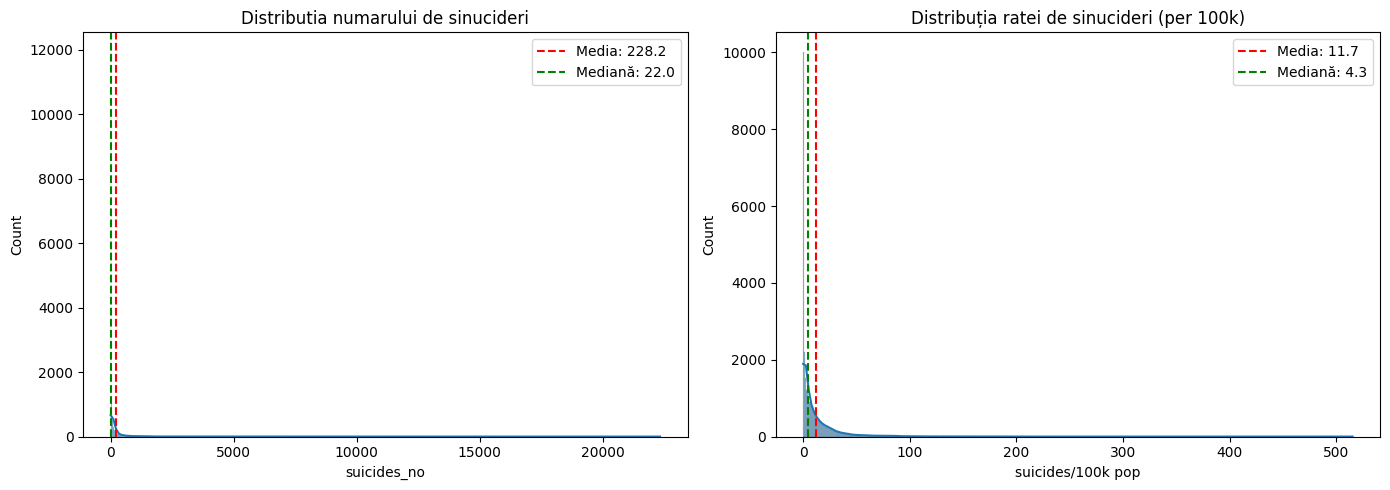

In [ ]:
# Distributia de sinucideri
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histograma pentru nr de sinucideri
sns.histplot(df['suicides_no'].dropna(), kde=True, ax=axes[0])
axes[0].set_title('Distributia numarului de sinucideri')
axes[0].axvline(df['suicides_no'].mean(), color='red', linestyle='--', label=f'Media: {df["suicides_no"].mean():.1f}')
axes[0].axvline(df['suicides_no'].median(), color='green', linestyle='--', label=f'Mediană: {df["suicides_no"].median():.1f}')
axes[0].legend()

# Histograma pentru rata de sinucideri per 100k
sns.histplot(df['suicides/100k pop'].dropna(), kde=True, ax=axes[1])
axes[1].set_title('Distribuția ratei de sinucideri (per 100k)')
axes[1].axvline(df['suicides/100k pop'].mean(), color='red', linestyle='--', label=f'Media: {df["suicides/100k pop"].mean():.1f}')
axes[1].axvline(df['suicides/100k pop'].median(), color='green', linestyle='--', label=f'Mediană: {df["suicides/100k pop"].median():.1f}')
axes[1].legend()

plt.tight_layout()
plt.show()

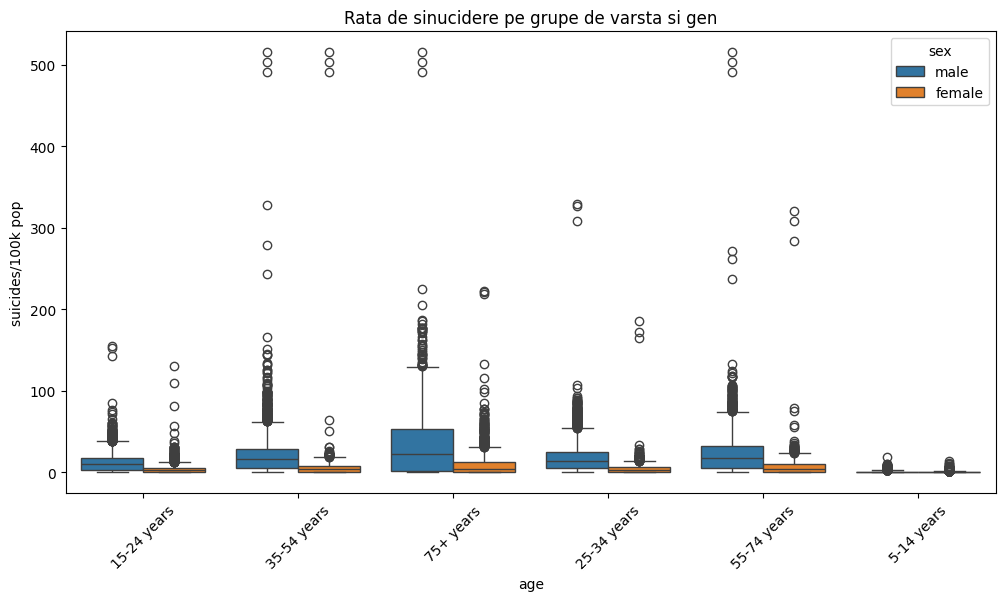

In [ ]:
# Compararea ratelor de sinucidere intre grupuri demografice (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='age', y='suicides/100k pop', hue='sex', data=df)
plt.title('Rata de sinucidere pe grupe de varsta si gen')
plt.xticks(rotation=45)
plt.show()


# 2. Analiza frecvențelor pentru variabilele categorice

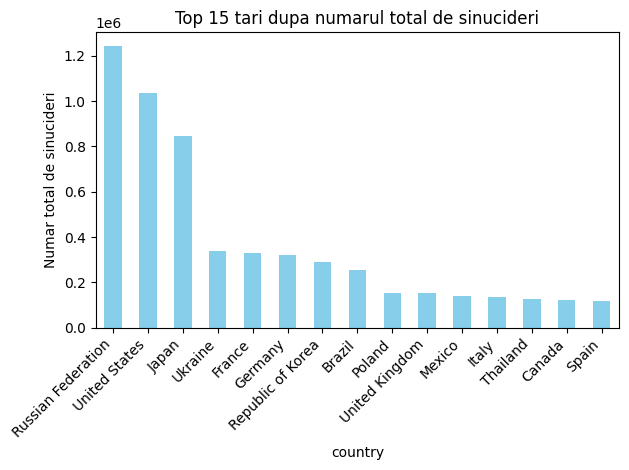

In [ ]:
# Distributia sinuciderilor pe tari (top 15)
country_suicides = df.groupby('country')['suicides_no'].sum().sort_values(ascending=False).head(15)
country_suicides.plot(kind='bar', color='skyblue')
plt.title('Top 15 tari dupa numarul total de sinucideri')
plt.ylabel('Numar total de sinucideri')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

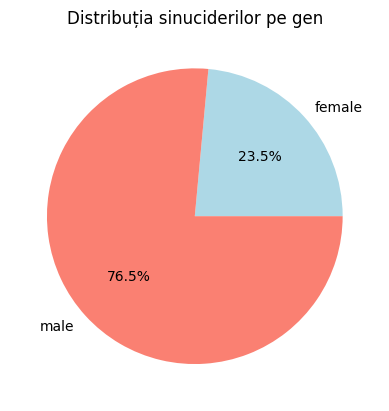

In [ ]:
# Distributia sinuciderilor pe gen
gender_suicides = df.groupby('sex')['suicides_no'].sum()
gender_pct = gender_suicides / gender_suicides.sum() * 100

plt.figure()
gender_suicides.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Distribuția sinuciderilor pe gen')
plt.ylabel('')
plt.show()

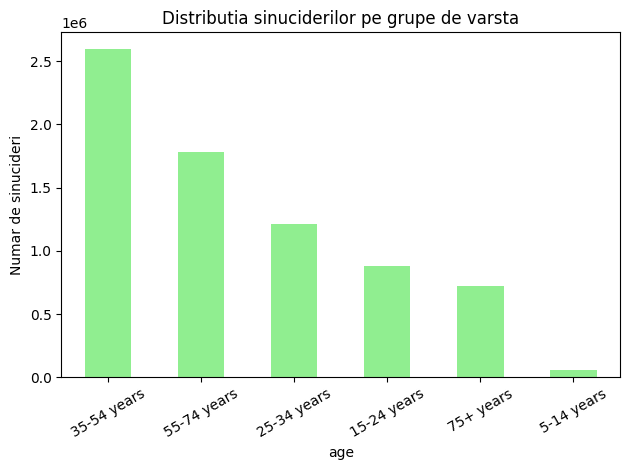

In [ ]:
# Distributia sinuciderilor pe grupe de varsta
age_suicides = df.groupby('age')['suicides_no'].sum().sort_values(ascending=False)
age_pct = age_suicides / age_suicides.sum() * 100

plt.figure()
age_suicides.plot(kind='bar', color='lightgreen')
plt.title('Distributia sinuciderilor pe grupe de varsta')
plt.ylabel('Numar de sinucideri')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

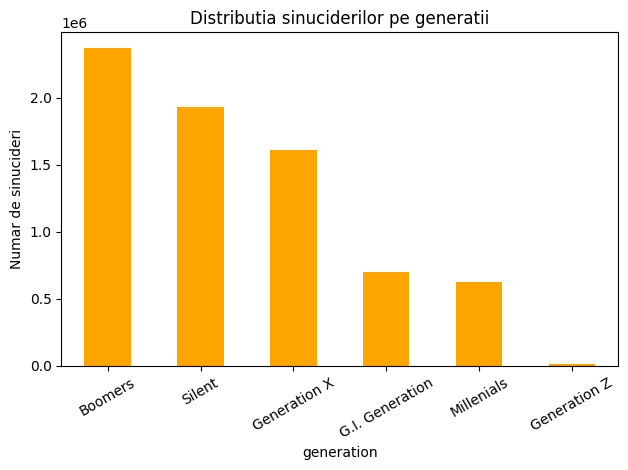

In [ ]:
# Distributia sinuciderilor pe generatii
gen_suicides = df.groupby('generation')['suicides_no'].sum().sort_values(ascending=False)
gen_pct = gen_suicides / gen_suicides.sum() * 100

plt.figure()
gen_suicides.plot(kind='bar', color='orange')
plt.title('Distributia sinuciderilor pe generatii')
plt.ylabel('Numar de sinucideri')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

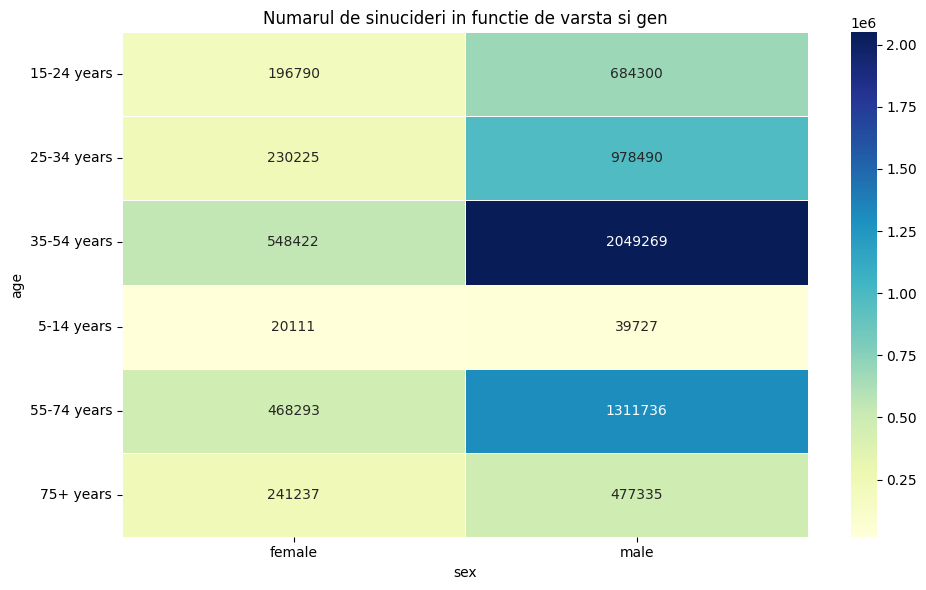

In [ ]:
# Heatmap pentru corelare gen si varsta
age_gender_suicides = df.groupby(['age', 'sex'])['suicides_no'].sum().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_suicides, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Numarul de sinucideri in functie de varsta si gen')
plt.tight_layout()
plt.show()

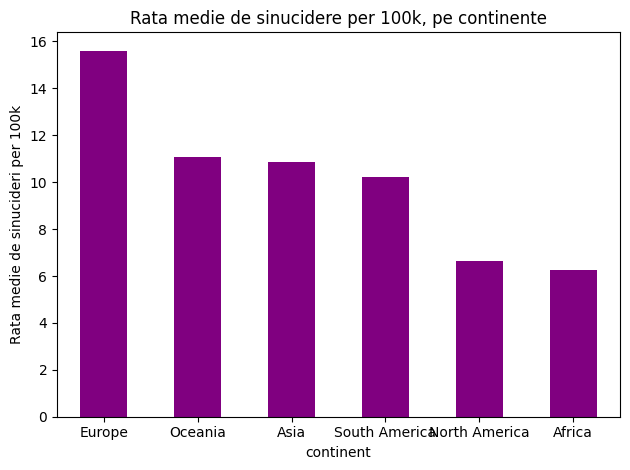

In [ ]:
# Rata medie de sinucidere per 100k de locuitori
continent_stats = df.groupby('continent')['suicides/100k pop'].mean().sort_values(ascending=False)
plt.figure()
continent_stats.plot(kind='bar', color='purple')
plt.title('Rata medie de sinucidere per 100k, pe continente')
plt.ylabel('Rata medie de sinucideri per 100k')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# 3. Analiza tendințelor temporale

In [ ]:
# Analiza tendintelor temporale interactiva cu dropdown

# Pregatirea datelor pentru analiza temporala
yearly_suicides = df.groupby('year')['suicides_no'].sum().reset_index()
yearly_suicides.columns = ['An', 'Numar de sinucideri']
yearly_suicides['Rata de crestere (%)'] = yearly_suicides['Numar de sinucideri'].pct_change() * 100

gender_yearly = df.groupby(['year', 'sex'])['suicides_no'].sum().unstack()
rate_yearly = df.groupby('year')['suicides/100k pop'].mean().reset_index()
rate_yearly.columns = ['An', 'Rata medie per 100k']

# Functia pentru crearea graficelor
def plot_time_trend(option):
    plt.figure(figsize=(14, 7))

    if option == 'Numar total de sinucideri':
        plt.plot(yearly_suicides['An'], yearly_suicides['Numar de sinucideri'],
                marker='o', linewidth=2, color='royalblue')
        plt.title('Evolutia numarului global de sinucideri (1985-2020)', fontsize=14)
        plt.ylabel('Numar de sinucideri', fontsize=12)

    elif option == 'Rata de crestere/descrestere (%)':
        bars = plt.bar(yearly_suicides['An'][1:], yearly_suicides['Rata de crestere (%)'][1:],
               color=np.where(yearly_suicides['Rata de crestere (%)'][1:] >= 0, 'green', 'red'))
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        plt.title('Rata anuala de crestere/descrestere a numarului de sinucideri', fontsize=14)
        plt.ylabel('Rata de crestere (%)', fontsize=12)

    elif option == 'Evolutie pe genuri':
        gender_yearly.plot(marker='o', ax=plt.gca())
        plt.title('Evolutia numarului de sinucideri in functie de gen', fontsize=14)
        plt.ylabel('Numar de sinucideri', fontsize=12)
        plt.legend(title='Gen')

    elif option == 'Rata medie per 100k locuitori':
        plt.plot(rate_yearly['An'], rate_yearly['Rata medie per 100k'],
                marker='o', color='purple', linewidth=2)
        plt.title('Evolutia ratei medii de sinucidere per 100k locuitori', fontsize=14)
        plt.ylabel('Rata medie de sinucidere per 100k', fontsize=12)

    elif option == 'Tendinta de baza (media mobila)':
        rolling_mean = yearly_suicides.set_index('An')['Numar de sinucideri'].rolling(window=5).mean()
        plt.plot(yearly_suicides['An'], yearly_suicides['Numar de sinucideri'],
                marker='o', alpha=0.6, label='Valori anuale')
        plt.plot(rolling_mean.index, rolling_mean.values,
                color='red', linewidth=2, label='Media mobila (5 ani)')
        plt.title('Tendinta de baza si media mobila pe 5 ani', fontsize=14)
        plt.ylabel('Numar de sinucideri', fontsize=12)
        plt.legend()

    plt.xlabel('An', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.xticks(yearly_suicides['An'][::3])  # Afisare eticheta pentru fiecare al treilea an
    plt.tight_layout()
    plt.show()

    # Afisare valori numerice pentru optiunea selectata
    if option == 'Numar total de sinucideri':
        display(yearly_suicides[['An', 'Numar de sinucideri']].head(10))
        print("...si alte", len(yearly_suicides)-10, "inregistrari")
    elif option == 'Rata de crestere/descrestere (%)':
        display(yearly_suicides[['An', 'Rata de crestere (%)']].dropna().head(10))
        print("...si alte", len(yearly_suicides)-11, "inregistrari")

# Crearea dropdown-ului interactiv
options = ['Numar total de sinucideri',
           'Rata de crestere/descrestere (%)',
           'Evolutie pe genuri',
           'Rata medie per 100k locuitori',
           'Tendinta de baza (media mobila)']

dropdown = widgets.Dropdown(
    options=options,
    value=options[0],
    description='Alege graficul:',
    style={'description_width': 'initial'}
)

# Interactivitate
output = widgets.Output()
display(dropdown, output)

def on_change(change):
    with output:
        output.clear_output()
        plot_time_trend(change['new'])

dropdown.observe(on_change, names='value')

# primul grafic
with output:
    plot_time_trend(options[0])

Dropdown(description='Alege graficul:', options=('Numar total de sinucideri', 'Rata de crestere/descrestere (%…

Output()

# 4. Analize comparative

In [ ]:
# Cream dropdown-ul pentru selectarea tipului de analiza
analysis_dropdown = widgets.Dropdown(
    options=['Generatie vs Gen',
             'Varsta vs Gen',
             'PIB vs Rata sinucidere',
             'HDI vs Rata sinucidere',
             'Top 10 tari'],
    value='Generatie vs Gen',
    description='Tip analiza:',
    style={'description_width': 'initial'}
)

# Cream zona de output pentru afisarea rezultatelor
output = widgets.Output()

# Functia pentru afisarea analizelor comparative
def show_comparative_analysis(analysis_type):
    with output:
        clear_output(wait=True)

        if analysis_type == 'Generatie vs Gen':
            # Analiza intre generatie si gen
            gen_gender_rate = df.groupby(['generation', 'sex'])['suicides/100k pop'].mean().unstack()

            # Ordonam generatiile cronologic
            generation_order = ['G.I. Generation', 'Silent', 'Boomers',
                              'Generation X', 'Millennials', 'Generation Z']
            gen_gender_rate = gen_gender_rate.reindex(generation_order)

            plt.figure(figsize=(12, 6))
            gen_gender_rate.plot(kind='bar', width=0.7)
            plt.title('Rata de sinucidere per 100k locuitori in functie de generatie si gen', fontsize=14)
            plt.xlabel('Generatie', fontsize=12)
            plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
            plt.xticks(rotation=45)
            plt.legend(title='Gen')
            plt.tight_layout()
            plt.show()

            print("Rata medie de sinucidere (per 100k) in functie de generatie si gen:")
            display(gen_gender_rate.round(2))

        elif analysis_type == 'Varsta vs Gen':
            # Analiza intre varsta si gen
            age_gender_rate = df.groupby(['age', 'sex'])['suicides/100k pop'].mean().unstack()

            plt.figure(figsize=(12, 6))
            age_gender_rate.plot(kind='bar', width=0.7)
            plt.title('Rata de sinucidere per 100k locuitori in functie de varsta si gen', fontsize=14)
            plt.xlabel('Grupa de varsta', fontsize=12)
            plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
            plt.xticks(rotation=30)
            plt.legend(title='Gen')
            plt.tight_layout()
            plt.show()

            print("Rata medie de sinucidere (per 100k) in functie de varsta si gen:")
            display(age_gender_rate.round(2))

        elif analysis_type == 'PIB vs Rata sinucidere':
            # Analiza intre PIB per capita si rata de sinucidere
            plt.figure(figsize=(12, 7))
            sns.scatterplot(x='gdp_per_capita ($)', y='suicides/100k pop',
                          hue='sex', data=df, alpha=0.5)

            plt.title('Relatia intre PIB per capita si rata de sinucidere', fontsize=14)
            plt.xlabel('PIB per capita ($)', fontsize=12)
            plt.ylabel('Rata de sinucidere (per 100k)', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.legend(title='Gen')
            plt.tight_layout()
            plt.show()

            # Calculam coeficientul de corelatie
            correlation = df[['gdp_per_capita ($)', 'suicides/100k pop']].corr().iloc[0, 1]
            print(f"Coeficientul de corelatie intre PIB per capita si rata de sinucidere: {correlation:.4f}")

            # Grupam tarile dupa PIB per capita
            df['gdp_category'] = pd.qcut(df['gdp_per_capita ($)'], 4,
                                       labels=['Venit scazut', 'Venit mediu-scazut',
                                             'Venit mediu-ridicat', 'Venit ridicat'])

            gdp_group_stats = df.groupby('gdp_category')['suicides/100k pop'].agg(['mean', 'std', 'count'])
            print("\nRate de sinucidere in functie de categoria de venit:")
            display(gdp_group_stats.round(2))

        elif analysis_type == 'HDI vs Rata sinucidere':
            # Analiza intre HDI si rata de sinucidere
            # Filtram datele cu HDI valid
            hdi_data = df.dropna(subset=['HDI for year'])

            plt.figure(figsize=(12, 7))
            sns.scatterplot(x='HDI for year', y='suicides/100k pop',
                          hue='sex', data=hdi_data, alpha=0.5)

            plt.title('Relatia intre Indicele Dezvoltarii Umane (HDI) si rata de sinucidere', fontsize=14)
            plt.xlabel('HDI', fontsize=12)
            plt.ylabel('Rata de sinucidere (per 100k)', fontsize=12)
            plt.grid(True, alpha=0.3)
            plt.legend(title='Gen')
            plt.tight_layout()
            plt.show()

            # Calculam coeficientul de corelatie
            hdi_corr = hdi_data[['HDI for year', 'suicides/100k pop']].corr().iloc[0, 1]
            print(f"Coeficientul de corelatie intre HDI si rata de sinucidere: {hdi_corr:.4f}")

        elif analysis_type == 'Top 10 tari':
            # Top 10 tari dupa rata de sinucidere
            country_rates = df.groupby('country')['suicides/100k pop'].mean().sort_values(ascending=False)
            top10_countries = country_rates.head(10)

            plt.figure(figsize=(12, 6))
            top10_countries.plot(kind='bar', color='crimson')
            plt.title('Top 10 tari cu cele mai mari rate de sinucidere (per 100k)', fontsize=14)
            plt.xlabel('Tara', fontsize=12)
            plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, alpha=0.3, axis='y')
            plt.tight_layout()
            plt.show()

            print("Top 10 tari cu cele mai mari rate medii de sinucidere (per 100k):")
            display(pd.DataFrame(top10_countries).round(2))

# Functia care se executa la schimbarea selectiei din dropdown
def on_change(change):
    show_comparative_analysis(change['new'])

# Conectam functia la evenimentul de schimbare a valorii dropdown-ului
analysis_dropdown.observe(on_change, names='value')

# Afisam dropdown-ul si output-ul
display(analysis_dropdown, output)

# Afisam prima analiza
show_comparative_analysis('Generatie vs Gen') # dropdownul acesta nu merge la mine; celelalte da

Dropdown(description='Tip analiza:', options=('Generatie vs Gen', 'Varsta vs Gen', 'PIB vs Rata sinucidere', '…

Output()

## Corelări

Calculul corelațiilor între variabilele numerice
* Crearea matricei de corelație
* Identificarea corelațiilor puternice (pozitive și negative)


Analiza relației între variabilele socio-economice și rata sinuciderilor
* Corelația între PIB/locuitor și rata sinuciderilor
* Corelația între HDI (Indicele Dezvoltării Umane) și rata sinuciderilor


Analiza corelațiilor între factori demografici și sinucideri
* Relația dintre vârstă/generație și rata sinuciderii
* Diferențe în rata sinuciderii în funcție de gen


Teste statistice pentru validarea corelațiilor
* Aplicarea testelor statistice relevante (ANOVA, chi-square)
* Interpretarea rezultatelor testelor

Dropdown(description='Selectează țara:', layout=Layout(width='50%'), options=('Toate țările', 'Afghanistan', '…

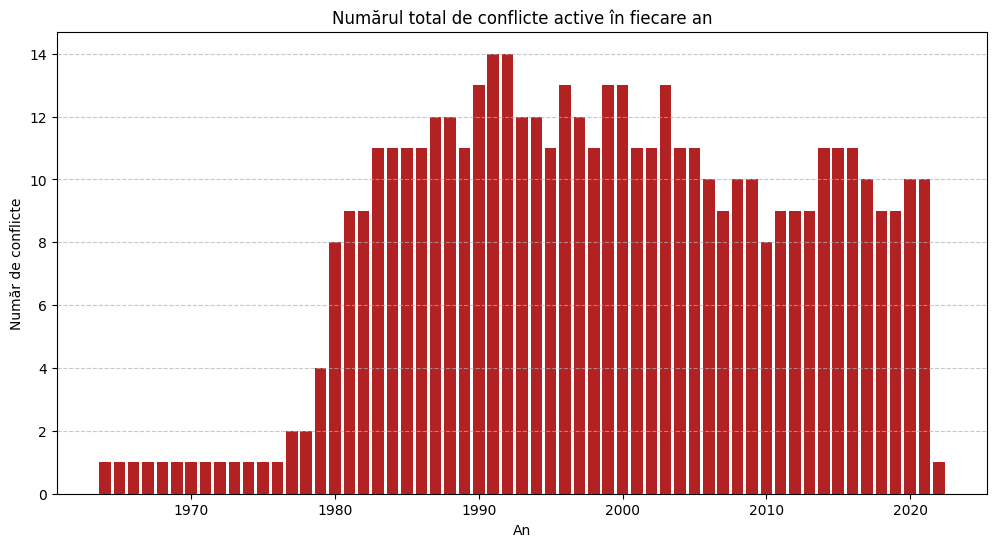

Numărul de conflicte active pe an:


year  num_conflicts
46  1964              1
47  1965              1
48  1966              1
49  1967              1
50  1968              1
51  1969              1
52  1970              1
53  1971              1
54  1972              1
55  1973              1
56  1974              1
57  1975              1
58  1976              1
40  1977              2
41  1978              2
42  1979              4
43  1980              8
44  1981              9
45  1982              9
32  1983             11
33  1984             11
34  1985             11
35  1986             11
36  1987             12
37  1988             12
38  1989             11
0   1990             13
1   1991             14
2   1992             14
3   1993             12
4   1994             12
13  1995             11
5   1996             13
6   1997             12
7   1998             11
8   1999             13
9   2000             13
10  2001             11
11  2002             11
12  2003             13
14  2004             11
15  2005             11
16  2006             10
17  2007              9
18  2008             10
19  2009             10
20  2010              8
21  2011              9
22  2012              9
23  2013              9
24  2014             11
25  2015             11
26  2016             11
27  2017             10
28  2018              9
29  2019              9
30  2020             10
31  2021             10
39  2022              1

In [ ]:
# Dict pentru conflicte / an si tara
conflicts_by_year = {}
conflicts_by_country = {}

# Pracurg DataFrame-ul df_conflicts_expanded
for _, conflict in df_conflicts_expanded.iterrows():
    country = conflict['Country']
    description = conflict['Conflict Description']
    start_year = conflict['Start Year']
    end_year = conflict['End Year']

    # Convertesc start_year în integer
    try:
        start_year = int(start_year)
    except ValueError:
        # dk start_year nu este valid, iau cv deflt
        start_year = 1980

    # aflu end_year
    if end_year == 'present' or str(end_year).lower() == 'present':
        end_year = 2021  # cum avem date pana in 2021, zicem si noi ca present e 2021
    else:
        try:
            end_year = int(end_year)
        except (ValueError, TypeError):
            # dk nu e deloc trecut la end
            end_year = 2021

    # adaug tara
    if country not in conflicts_by_country:
        conflicts_by_country[country] = []

    # fac obj/ k v pair ptr dict
    conflict_info = {
        'country': country,
        'description': description,
        'start_year': start_year,
        'end_year': end_year
    }

    # adaug ce conflict e
    if conflict_info not in conflicts_by_country[country]:
        conflicts_by_country[country].append(conflict_info)

    # adaug si in ce perioada a fost
    for year in range(start_year, end_year + 1):
        if year not in conflicts_by_year:
            conflicts_by_year[year] = []

        if conflict_info not in conflicts_by_year[year]:
            conflicts_by_year[year].append({
                'country': country,
                'description': description
            })

# calculez nr de confl pe an
conflicts_count = {year: len(conflicts) for year, conflicts in conflicts_by_year.items()}
conflicts_df = pd.DataFrame(list(conflicts_count.items()), columns=['year', 'num_conflicts'])
conflicts_df = conflicts_df.sort_values(by='year')

# fac dropdn
countries = sorted(list(conflicts_by_country.keys()))
country_dropdown = widgets.Dropdown(
    options=['Toate țările'] + countries,
    value='Toate țările',
    description='Selectează țara:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# fct pentru dropdn ca sa mearga
def on_country_select(change):
    clear_output(wait=True)
    display(country_dropdown)

    selected_country = change['new']

    if selected_country == 'Toate țările':
        # nr confl / an
        plt.figure(figsize=(12, 6))
        plt.bar(conflicts_df['year'], conflicts_df['num_conflicts'], color='firebrick')
        plt.title('Numărul total de conflicte active în fiecare an')
        plt.xlabel('An')
        plt.ylabel('Număr de conflicte')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        print("Numărul de conflicte active pe an:")
        display(conflicts_df)
    else:
        # altfl, iau in fct de tara selectata
        country_conflicts = conflicts_by_country[selected_country]

        if not country_conflicts:
            print(f"Nu există conflicte înregistrate pentru {selected_country}.")
            return

        # fac cate un df ptr fiece chestie pe an
        years_with_conflicts = []
        for conflict in country_conflicts:
            start_year = conflict['start_year']
            end_year = conflict['end_year']
            description = conflict['description']

            for year in range(start_year, end_year + 1):
                years_with_conflicts.append({'year': year, 'description': description})

        if years_with_conflicts:
            country_conflicts_df = pd.DataFrame(years_with_conflicts)

            # iar calc nr de confl pe an ca o fac pentru o anumita tara
            conflict_count_by_year = country_conflicts_df.groupby('year').size().reset_index(name='count')

            # fac si grafic, ca de ce nu
            plt.figure(figsize=(12, 6))
            plt.bar(conflict_count_by_year['year'], conflict_count_by_year['count'], color='darkblue')
            plt.title(f'Conflicte pentru {selected_country} de-a lungul timpului')
            plt.xlabel('An')
            plt.ylabel('Număr de conflicte')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            # + alte detalii sper ca e ok asa
            print(f"Conflicte pentru {selected_country}:")
            for conflict in country_conflicts:
                status_end = conflict['end_year']
                if status_end == 2021:
                    end_display = "prezent"
                else:
                    end_display = status_end

                print(f"Perioada: {conflict['start_year']}-{end_display}, Descriere: {conflict['description']}")
        else:
            print(f"Nu există conflicte înregistrate pentru {selected_country}.")

country_dropdown.observe(on_country_select, names='value')

# pun mai intai in dropdn sa fie pe toate tarile, ca asta int mai mult
display(country_dropdown)
on_country_select({'new': 'Toate țările'})

Dropdown(description='Selectează regiunea/țara:', layout=Layout(width='50%'), options=('Toate regiunile/țările…

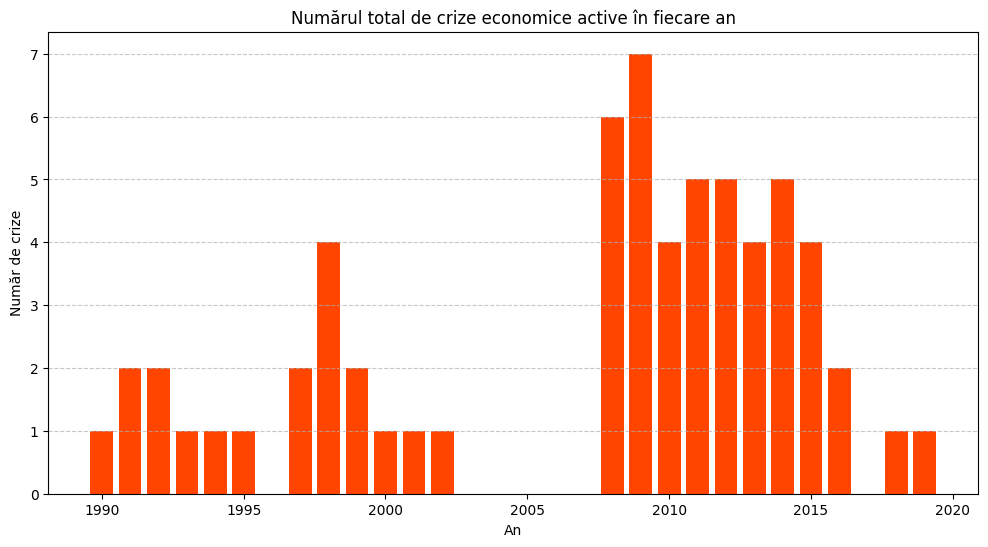

Numărul de crize economice active pe an:


year  num_crises
2   1990           1
3   1991           2
4   1992           2
18  1993           1
19  1994           1
20  1995           1
13  1997           2
8   1998           4
9   1999           2
10  2000           1
11  2001           1
12  2002           1
0   2008           6
1   2009           7
14  2010           4
15  2011           5
16  2012           5
17  2013           4
5   2014           5
6   2015           4
7   2016           2
21  2018           1
22  2019           1

In [ ]:
# fac cate un dict pentru crize majore, in fct de an si regiune
crises_by_year = {}
crises_by_region = {}

# trec prin df
for _, crisis in df_economic.iterrows():
    period = crisis['Period']
    region = crisis['Region/Country']
    crisis_desc = crisis['Crisis']

    # parsez perioada ca nu mai e data cu start si end ca mai devr
    if '-' in period:
        parts = period.split('-')
        start_year = int(parts[0])
        end_year = int(parts[1])
    else:
        try:
            start_year = end_year = int(period)
        except ValueError:
            continue

    # adaug cheie in dict
    if region not in crises_by_region:
        crises_by_region[region] = []

    # obj ptr dict
    crisis_info = {
        'region': region,
        'description': crisis_desc,
        'start_year': start_year,
        'end_year': end_year
    }

    # pun ce criza a fost
    if crisis_info not in crises_by_region[region]:
        crises_by_region[region].append(crisis_info)

    # perioafa crizei
    for year in range(start_year, end_year + 1):
        if year not in crises_by_year:
            crises_by_year[year] = []

        crisis_year_info = {
            'region': region,
            'description': crisis_desc
        }

        # iau fara duplicate
        if not any(c['region'] == region and c['description'] == crisis_desc for c in crises_by_year[year]):
            crises_by_year[year].append(crisis_year_info)

# calc nr crize pe an
crises_count = {year: len(crises) for year, crises in crises_by_year.items()}
crises_df = pd.DataFrame(list(crises_count.items()), columns=['year', 'num_crises'])
crises_df = crises_df.sort_values(by='year')

# fac dropdn
regions = sorted(list(crises_by_region.keys()))
region_dropdown = widgets.Dropdown(
    options=['Toate regiunile/țările'] + regions,
    value='Toate regiunile/țările',
    description='Selectează regiunea/țara:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# fct selectare item dropdn aka tara
def on_region_select(change):
    clear_output(wait=True)
    display(region_dropdown)

    selected_region = change['new']

    if selected_region == 'Toate regiunile/țările':
        # nr tara dk sunt de toate
        plt.figure(figsize=(12, 6))
        plt.bar(crises_df['year'], crises_df['num_crises'], color='orangered')
        plt.title('Numărul total de crize economice active în fiecare an')
        plt.xlabel('An')
        plt.ylabel('Număr de crize')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

        print("Numărul de crize economice active pe an:")
        display(crises_df)
    else:
        # la fel ca mai sus, la cele economice, numar iar, dar in fct de tara selectata, la fel, cu creare de noi df uri si toate nebuniile
        region_crises = crises_by_region[selected_region]

        if not region_crises:
            print(f"Nu există crize economice înregistrate pentru {selected_region}.")
            return

        years_with_crises = []
        for crisis in region_crises:
            start_year = crisis['start_year']
            end_year = crisis['end_year']
            description = crisis['description']

            for year in range(start_year, end_year + 1):
                years_with_crises.append({'year': year, 'description': description})

        if years_with_crises:
            region_crises_df = pd.DataFrame(years_with_crises)

            crisis_count_by_year = region_crises_df.groupby('year').size().reset_index(name='count')

            # de fiecare data e un alt grafic
            plt.figure(figsize=(12, 6))
            plt.bar(crisis_count_by_year['year'], crisis_count_by_year['count'], color='darkred')
            plt.title(f'Crize economice pentru {selected_region} de-a lungul timpului')
            plt.xlabel('An')
            plt.ylabel('Număr de crize')
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

            print(f"Crize economice pentru {selected_region}:")
            for crisis in region_crises:
                print(f"Perioada: {crisis['start_year']}-{crisis['end_year']}, Criză: {crisis['description']}")
        else:
            print(f"Nu există crize economice înregistrate pentru {selected_region}.")

region_dropdown.observe(on_region_select, names='value')

display(region_dropdown)
on_region_select({'new': 'Toate regiunile/țările'})

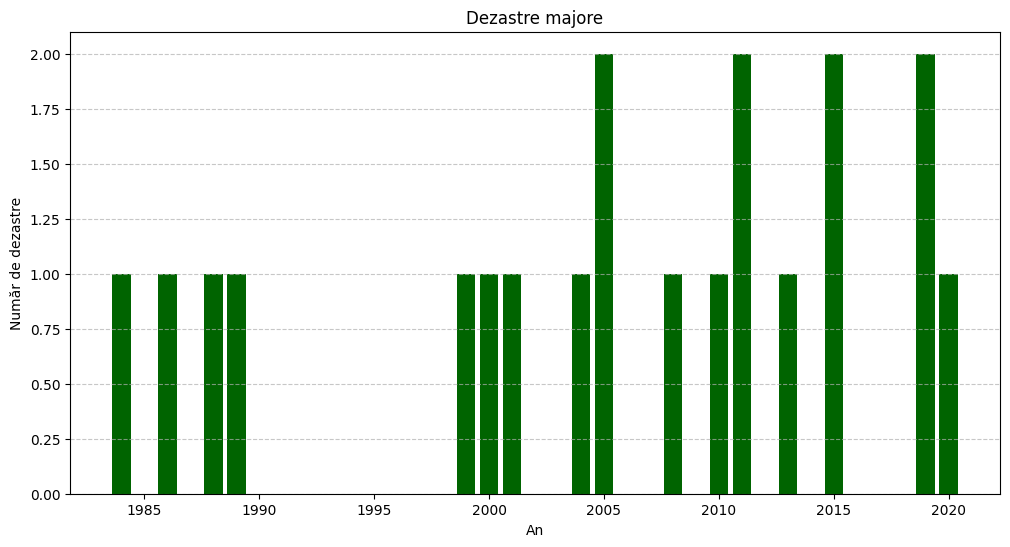


Dezastre în 1984:
  - India: Bhopal Gas Tragedy (Tip: Man-Made)

Dezastre în 1986:
  - Ukraine (USSR): Chernobyl Nuclear Disaster (Tip: Man-Made)

Dezastre în 1988:
  - Armenia: Spitak Earthquake (Tip: Natural)

Dezastre în 1989:
  - USA: Exxon Valdez Oil Spill (Tip: Man-Made)

Dezastre în 1999:
  - India: Odisha Cyclone (Tip: Natural)

Dezastre în 2000:
  - Russia: Kursk Submarine Disaster (Tip: Man-Made)

Dezastre în 2001:
  - USA: 9/11 Terrorist Attacks (Tip: Man-Made)

Dezastre în 2004:
  - Indonesia: Indian Ocean Earthquake & Tsunami (Tip: Natural)

Dezastre în 2005:
  - USA: Hurricane Katrina (Tip: Natural)
  - Pakistan: Kashmir Earthquake (Tip: Natural)

Dezastre în 2008:
  - China: Sichuan Earthquake (Poor Construction) (Tip: Man-Made)

Dezastre în 2010:
  - Haiti: Haiti Earthquake (Tip: Natural)

Dezastre în 2011:
  - Japan: Tohoku Earthquake & Tsunami (Tip: Natural)
  - Japan: Fukushima Nuclear Disaster (Tip: Man-Made)

Dezastre în 2013:
  - Philippines: Typhoon Haiyan (Tip:

In [ ]:
# Pe ideile de mai sus, am mers si aici
# structura/flow-ul, in mare, e acelasi, adica:
# - fac cate un dict, unul pe an si unul pe tara
# - ieterez prin df si parsez perioada ca la unele aparent am facut cu start year si end year si la altele nu =/ (am uitat)
# - dupa ce fac asta cu anii si parsatul fac un obiect/map/k-v dummy element sa l pun in dict
# - pun in dict de tari - tara si obj
# - pun in dict pe an un obj asemanator
# - calculez pe fiece an nr de conflicte, iterand prin dict de ani
# - fac dropdn cu tari si nr conflicte (si cand selectez cv din dropdn fac si un grafic sugestiv bar plot cu numarul de conflicte din acea tara pe ani)
# - mai intai selectez pe toate tarile, ca un overview, apoi cand selectez o tara numar din dictionarul cu acea tara
# - de fiecare data cand selectez ceva fac un alt grafic si alte numaratori
# - atasez functia ce numara si face grafice la obj de tip dropdn -> e din bibl ipynb widgets

disasters_by_year = {}
disasters_by_country = {}

for _, disaster in df_disasters.iterrows():
    year = disaster['Year']
    country = disaster['Country']
    disaster_type = disaster['Type']
    description = disaster['Disaster']

    if country not in disasters_by_country:
        disasters_by_country[country] = []

    disaster_info = {
        'year': year,
        'country': country,
        'type': disaster_type,
        'description': description
    }

    disasters_by_country[country].append(disaster_info)

    if year not in disasters_by_year:
        disasters_by_year[year] = []

    disasters_by_year[year].append({
        'country': country,
        'type': disaster_type,
        'description': description
    })

disasters_count = {year: len(disasters) for year, disasters in disasters_by_year.items()}
disasters_df = pd.DataFrame(list(disasters_count.items()), columns=['year', 'num_disasters'])
disasters_df = disasters_df.sort_values(by='year')

print("\nNumărul de dezastre majore pe an:")
print(disasters_df.head())

countries = sorted(list(disasters_by_country.keys()))
country_dropdown = widgets.Dropdown(
    options=['Toate țările'] + countries,
    value='Toate țările',
    description='Selectează țara:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

disaster_types = sorted(list(set(disaster['type'] for disasters in disasters_by_year.values() for disaster in disasters)))
type_dropdown = widgets.Dropdown(
    options=['Toate tipurile'] + disaster_types,
    value='Toate tipurile',
    description='Selectează tipul:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

def on_selection_change(_):
    clear_output(wait=True)
    display(widgets.HBox([country_dropdown, type_dropdown]))

    selected_country = country_dropdown.value
    selected_type = type_dropdown.value

    filtered_years = {}
    for year, disasters in disasters_by_year.items():
        filtered_disasters = disasters

        if selected_country != 'Toate țările':
            filtered_disasters = [d for d in filtered_disasters if d['country'] == selected_country]

        if selected_type != 'Toate tipurile':
            filtered_disasters = [d for d in filtered_disasters if d['type'] == selected_type]

        if filtered_disasters:
            filtered_years[year] = filtered_disasters

    if not filtered_years:
        print("Nu există dezastre care să corespundă criteriilor selectate.")
        return

    filtered_count = {year: len(disasters) for year, disasters in filtered_years.items()}
    filtered_df = pd.DataFrame(list(filtered_count.items()), columns=['year', 'num_disasters'])
    filtered_df = filtered_df.sort_values(by='year')

    title_parts = ['Dezastre majore']
    if selected_country != 'Toate țările':
        title_parts.append(f'în {selected_country}')
    if selected_type != 'Toate tipurile':
        title_parts.append(f'de tip {selected_type}')
    title = ' '.join(title_parts)

    plt.figure(figsize=(12, 6))
    plt.bar(filtered_df['year'], filtered_df['num_disasters'], color='darkgreen')
    plt.title(title)
    plt.xlabel('An')
    plt.ylabel('Număr de dezastre')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

    for year in sorted(filtered_years.keys()):
        print(f"\nDezastre în {year}:")
        for disaster in filtered_years[year]:
            print(f"  - {disaster['country']}: {disaster['description']} (Tip: {disaster['type']})")

    print(f"\nÎn total: {sum(filtered_count.values())} dezastre")

country_dropdown.observe(on_selection_change, names='value')
type_dropdown.observe(on_selection_change, names='value')

display(widgets.HBox([country_dropdown, type_dropdown]))
on_selection_change(None)

In [ ]:
# Calculăm rata medie de sinucidere pentru fiecare an
suicide_by_year = df.groupby('year')[['suicides_no', 'population', 'suicides/100k pop']].agg({
    'suicides_no': 'sum',
    'population': 'sum',
    'suicides/100k pop': 'mean'
}).reset_index()

suicide_by_year['suicide_rate'] = (suicide_by_year['suicides_no'] / suicide_by_year['population']) * 100000

# Combinăm cu datele despre conflicte
combined_data = suicide_by_year.merge(conflicts_df, on='year', how='left')
# Combinăm cu datele despre crize economice
combined_data = combined_data.merge(crises_df, on='year', how='left')
# Combinăm cu datele despre dezastre
combined_data = combined_data.merge(disasters_df, on='year', how='left')

# Înlocuim valorile lipsă cu 0 (ani fără evenimente înregistrate)
combined_data['num_conflicts'] = combined_data['num_conflicts'].fillna(0)
combined_data['num_crises'] = combined_data['num_crises'].fillna(0)
combined_data['num_disasters'] = combined_data['num_disasters'].fillna(0)

# Adăugăm o coloană pentru numărul total de evenimente
combined_data['total_events'] = combined_data['num_conflicts'] + combined_data['num_crises'] + combined_data['num_disasters']

print("\nDatele combinate (primele 5 rânduri):")
print(combined_data.head())


Datele combinate (primele 5 rânduri):
   year  suicides_no  population  suicides/100k pop  suicide_rate  \
0  1985     116063.0  1008600086          11.826198     11.507336   
1  1986     120670.0  1029909613          11.423333     11.716562   
2  1987     126842.0  1095029726          11.644213     11.583430   
3  1988     121026.0  1054094424          12.709405     11.481514   
4  1989     160244.0  1225514347          12.879071     13.075653   

   num_conflicts  num_crises  num_disasters  total_events  
0             11         0.0            0.0          11.0  
1             11         0.0            1.0          12.0  
2             12         0.0            0.0          12.0  
3             12         0.0            1.0          13.0  
4             12         0.0            1.0          13.0  



Corelații între evenimente globale și rata de sinucidere:
Conflicte - Rata sinucidere: 0.320
Crize economice - Rata sinucidere: 0.133
Dezastre - Rata sinucidere: -0.171
Total evenimente - Rata sinucidere: 0.258


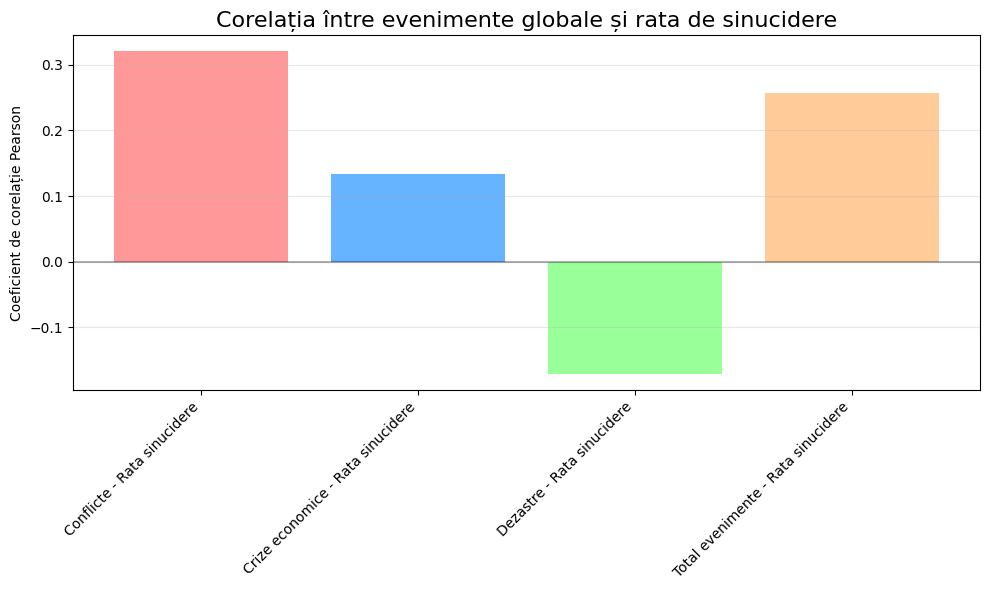

In [ ]:
# Calculul corelațiilor
correlations = {}
correlations['Conflicte - Rata sinucidere'] = combined_data['num_conflicts'].corr(combined_data['suicide_rate'])
correlations['Crize economice - Rata sinucidere'] = combined_data['num_crises'].corr(combined_data['suicide_rate'])
correlations['Dezastre - Rata sinucidere'] = combined_data['num_disasters'].corr(combined_data['suicide_rate'])
correlations['Total evenimente - Rata sinucidere'] = combined_data['total_events'].corr(combined_data['suicide_rate'])

print("\nCorelații între evenimente globale și rata de sinucidere:")
for key, value in correlations.items():
    print(f"{key}: {value:.3f}")

# Vizualizarea corelațiilor
plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values(), color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Corelația între evenimente globale și rata de sinucidere', fontsize=16)
plt.ylabel('Coeficient de corelație Pearson')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

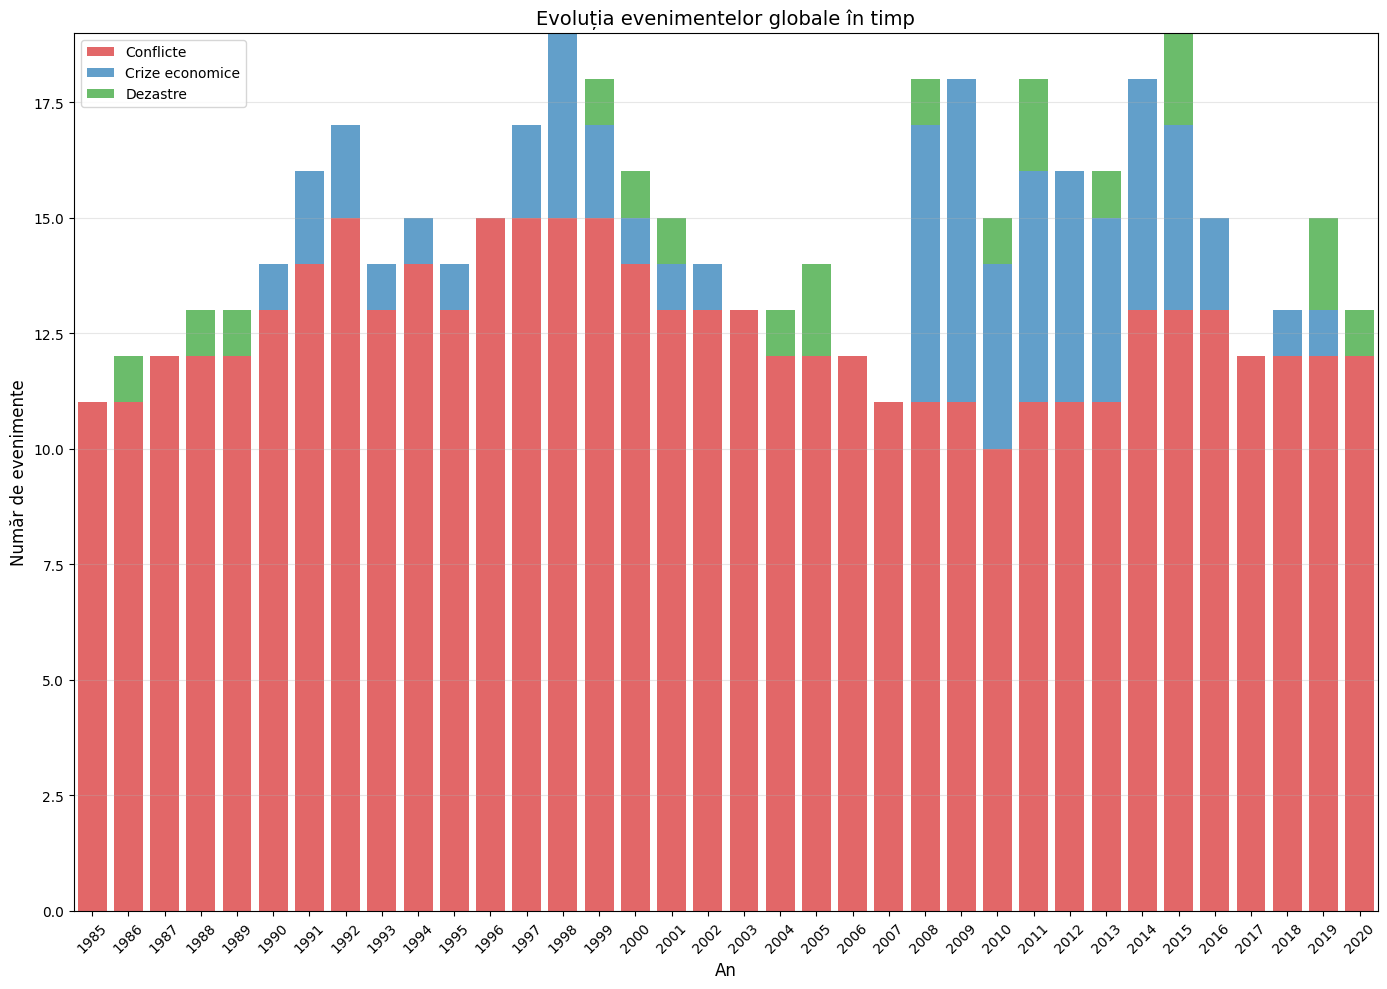

In [ ]:
plt.figure(figsize=(14, 10))

# Grafic pentru numărul de evenimente
ax = plt.subplot(111)
plt.bar(combined_data['year'], combined_data['num_conflicts'], label='Conflicte', alpha=0.7, color='#d62728')
plt.bar(combined_data['year'], combined_data['num_crises'], bottom=combined_data['num_conflicts'],
        label='Crize economice', alpha=0.7, color='#1f77b4')
plt.bar(combined_data['year'], combined_data['num_disasters'],
        bottom=combined_data['num_conflicts'] + combined_data['num_crises'],
        label='Dezastre', alpha=0.7, color='#2ca02c')

# Îmbunătățirea axei X - setăm explicit anii pentru a avea un control mai bun
years = combined_data['year'].unique()
plt.xticks(years, rotation=45)

# Setăm limite mai stricte pentru axa X pentru a evita spațiile mari la margini
plt.xlim(min(years)-0.5, max(years)+0.5)

# Adăugăm etichete și titlu
plt.xlabel('An', fontsize=12)
plt.ylabel('Număr de evenimente', fontsize=12)
plt.title('Evoluția evenimentelor globale în timp', fontsize=14)

# Adăugăm grid și legendă
plt.grid(True, alpha=0.3, axis='y')
plt.legend(loc='upper left')

# Optimizăm layoutul
plt.tight_layout()
plt.show()


Analiza impactului evenimentelor majore asupra ratelor de sinucidere:
     An                  Eveniment  Rata în timpul evenimentului  \
0  1997  Criza financiară asiatică                     14.136594   
1  2001   Atacurile teroriste 9/11                     14.277565   
2  2008   Criza financiară globală                     12.654217   
3  2011            Primăvara Arabă                     11.863573   
4  2020          Pandemia COVID-19                      0.107797   

   Rata înainte de eveniment  Rata după eveniment  \
0                  14.842676            14.467522   
1                  14.218988            14.054529   
2                  12.551757            12.320793   
3                  11.951250            12.032546   
4                   0.320507                  NaN   

   Modificare înainte-în timpul (%)  Modificare în timpul-după (%)  
0                         -4.757105                       2.340934  
1                          0.411962                      -1.562

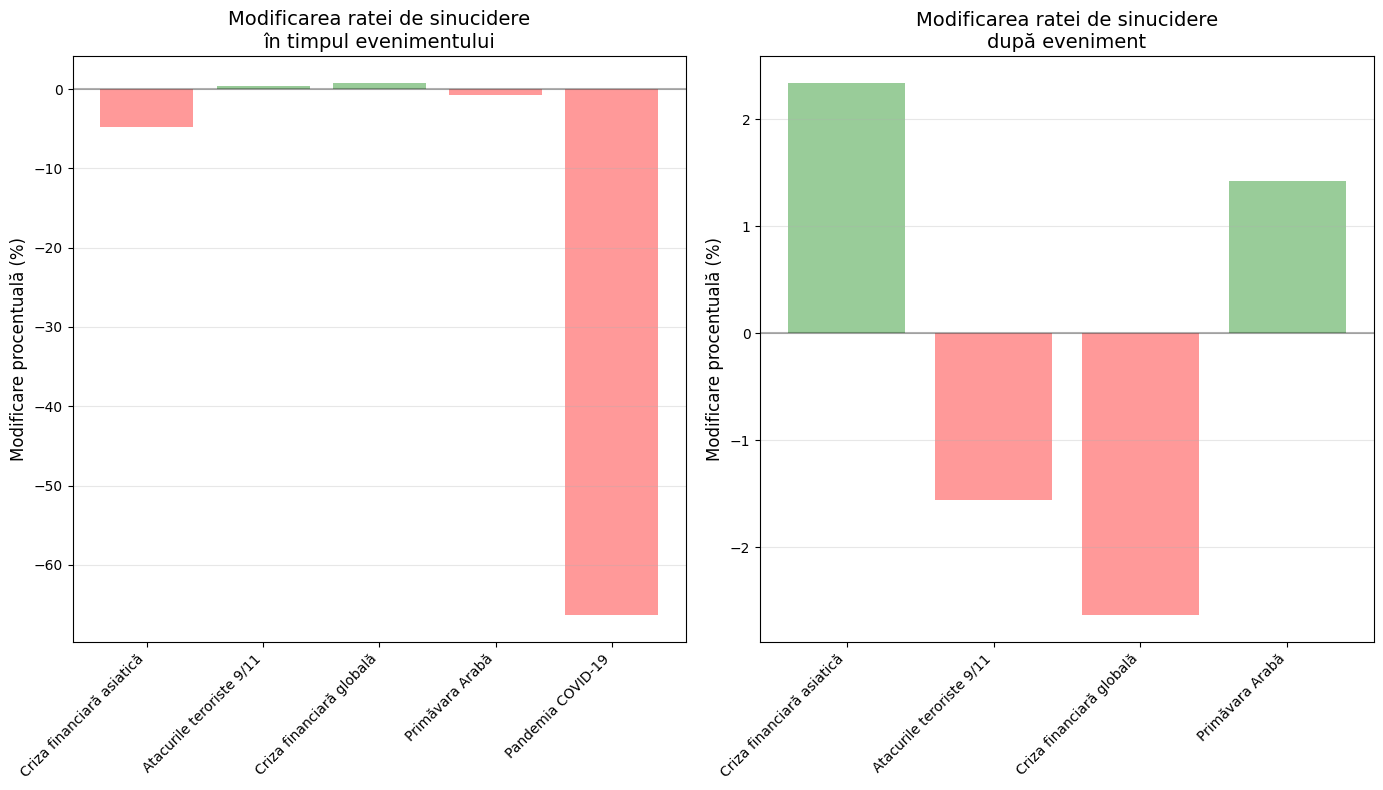

In [ ]:
# Definim anii cu evenimente majore
major_events = {
    1997: 'Criza financiară asiatică',
    2001: 'Atacurile teroriste 9/11',
    2008: 'Criza financiară globală',
    2011: 'Primăvara Arabă',
    2020: 'Pandemia COVID-19'
}

# Calculăm ratele de sinucidere înainte, în timpul și după evenimentele majore
event_analysis = []

for event_year, event_name in major_events.items():
    event_data = {}
    event_data['An'] = event_year
    event_data['Eveniment'] = event_name

    # Datele pentru anul evenimentului
    during_event = combined_data[combined_data['year'] == event_year]
    if not during_event.empty:
        event_data['Rata în timpul evenimentului'] = during_event['suicide_rate'].values[0]
    else:
        event_data['Rata în timpul evenimentului'] = None

    # Datele pentru anul anterior
    before_event = combined_data[combined_data['year'] == event_year - 1]
    if not before_event.empty:
        event_data['Rata înainte de eveniment'] = before_event['suicide_rate'].values[0]
    else:
        event_data['Rata înainte de eveniment'] = None

    # Datele pentru anul următor
    after_event = combined_data[combined_data['year'] == event_year + 1]
    if not after_event.empty:
        event_data['Rata după eveniment'] = after_event['suicide_rate'].values[0]
    else:
        event_data['Rata după eveniment'] = None

    # Calculăm modificările procentuale
    if event_data['Rata înainte de eveniment'] is not None and event_data['Rata în timpul evenimentului'] is not None:
        event_data['Modificare înainte-în timpul (%)'] = ((event_data['Rata în timpul evenimentului'] -
                                                         event_data['Rata înainte de eveniment']) /
                                                         event_data['Rata înainte de eveniment']) * 100
    else:
        event_data['Modificare înainte-în timpul (%)'] = None

    if event_data['Rata în timpul evenimentului'] is not None and event_data['Rata după eveniment'] is not None:
        event_data['Modificare în timpul-după (%)'] = ((event_data['Rata după eveniment'] -
                                                      event_data['Rata în timpul evenimentului']) /
                                                      event_data['Rata în timpul evenimentului']) * 100
    else:
        event_data['Modificare în timpul-după (%)'] = None

    event_analysis.append(event_data)

# Convertim în DataFrame pentru afișare
event_analysis_df = pd.DataFrame(event_analysis)
print("\nAnaliza impactului evenimentelor majore asupra ratelor de sinucidere:")
print(event_analysis_df)

# Vizualizarea modificărilor în ratele de sinucidere în jurul evenimentelor majore
plt.figure(figsize=(14, 8))

# Grafic pentru modificarea înainte-în timpul evenimentului
plt.subplot(121)
events = event_analysis_df['Eveniment'].tolist()
changes_during = event_analysis_df['Modificare înainte-în timpul (%)'].tolist()

# Filtrăm valorile None
valid_indices = [i for i, val in enumerate(changes_during) if val is not None]
valid_events = [events[i] for i in valid_indices]
valid_changes = [changes_during[i] for i in valid_indices]

colors = ['#ff9999' if val < 0 else '#99cc99' for val in valid_changes]
plt.bar(valid_events, valid_changes, color=colors)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Modificarea ratei de sinucidere\nîn timpul evenimentului', fontsize=14)
plt.ylabel('Modificare procentuală (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Grafic pentru modificarea în timpul-după eveniment
plt.subplot(122)
changes_after = event_analysis_df['Modificare în timpul-după (%)'].tolist()

# Filtrăm valorile None
valid_indices = [i for i, val in enumerate(changes_after) if val is not None]
valid_events = [events[i] for i in valid_indices]
valid_changes = [changes_after[i] for i in valid_indices]

colors = ['#ff9999' if val < 0 else '#99cc99' for val in valid_changes]
plt.bar(valid_events, valid_changes, color=colors)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.title('Modificarea ratei de sinucidere\ndupă eveniment', fontsize=14)
plt.ylabel('Modificare procentuală (%)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

<ipython-input-62-e948d6e9ec29>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conflict_analysis = combined_data.groupby('conflict_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()



Analiza ratei de sinucidere în funcție de numărul de conflicte:
                     conflict_level       mean      std  count
0       Fără/puține conflicte (0-5)        NaN      NaN      0
1         Conflicte moderate (6-10)  11.951250      NaN      1
2       Conflicte numeroase (11-15)  11.648799  4.29834     35
3  Conflicte foarte numeroase (>15)        NaN      NaN      0


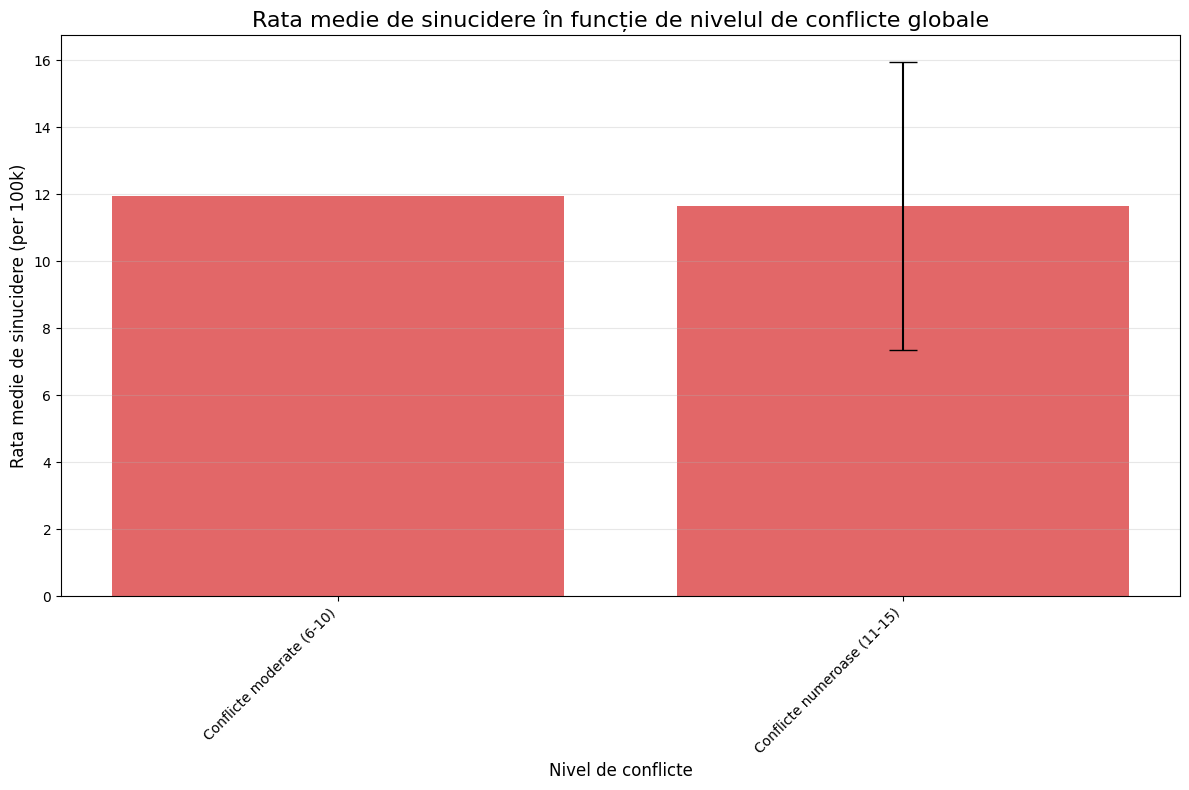


Rezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de conflicte:
F-statistic: 0.0048, p-value: 9.4509e-01
Diferențele sunt semnificative statistic (α=0.05): False


In [ ]:
# Calculăm rata medie de sinucidere pentru anii cu diferite niveluri de conflicte
combined_data['conflict_level'] = pd.cut(
    combined_data['num_conflicts'],
    bins=[0, 5, 10, 15, float('inf')],
    labels=['Fără/puține conflicte (0-5)', 'Conflicte moderate (6-10)',
            'Conflicte numeroase (11-15)', 'Conflicte foarte numeroase (>15)']
)

conflict_analysis = combined_data.groupby('conflict_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()
print("\nAnaliza ratei de sinucidere în funcție de numărul de conflicte:")
print(conflict_analysis)

# Vizualizarea relației între numărul de conflicte și rata de sinucidere
plt.figure(figsize=(12, 8))
plt.bar(conflict_analysis['conflict_level'], conflict_analysis['mean'],
        yerr=conflict_analysis['std'], capsize=10, color='#d62728', alpha=0.7)
plt.title('Rata medie de sinucidere în funcție de nivelul de conflicte globale', fontsize=16)
plt.xlabel('Nivel de conflicte', fontsize=12)
plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Testul ANOVA pentru a verifica semnificația statistică a diferențelor
from scipy.stats import f_oneway

# Grupăm datele după nivelul de conflicte
conflict_groups = []
for level in conflict_analysis['conflict_level']:
    group_data = combined_data[combined_data['conflict_level'] == level]['suicide_rate']
    if not group_data.empty:
        conflict_groups.append(group_data)

# Aplicăm testul ANOVA dacă avem cel puțin două grupuri
if len(conflict_groups) >= 2:
    f_stat, p_val = f_oneway(*conflict_groups)
    print(f"\nRezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de conflicte:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
    print(f"Diferențele sunt semnificative statistic (α=0.05): {p_val < 0.05}")

<ipython-input-63-06fa7d669c5c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  crisis_analysis = combined_data.groupby('crisis_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()



Analiza ratei de sinucidere în funcție de numărul de crize economice:
           crisis_level       mean       std  count
0            Fără crize  10.856383  4.831671     13
1    Crize puține (1-2)  12.020786  5.025145     14
2  Crize moderate (3-4)  12.425530  1.375884      4
3  Crize numeroase (>4)  12.106625  0.389867      5


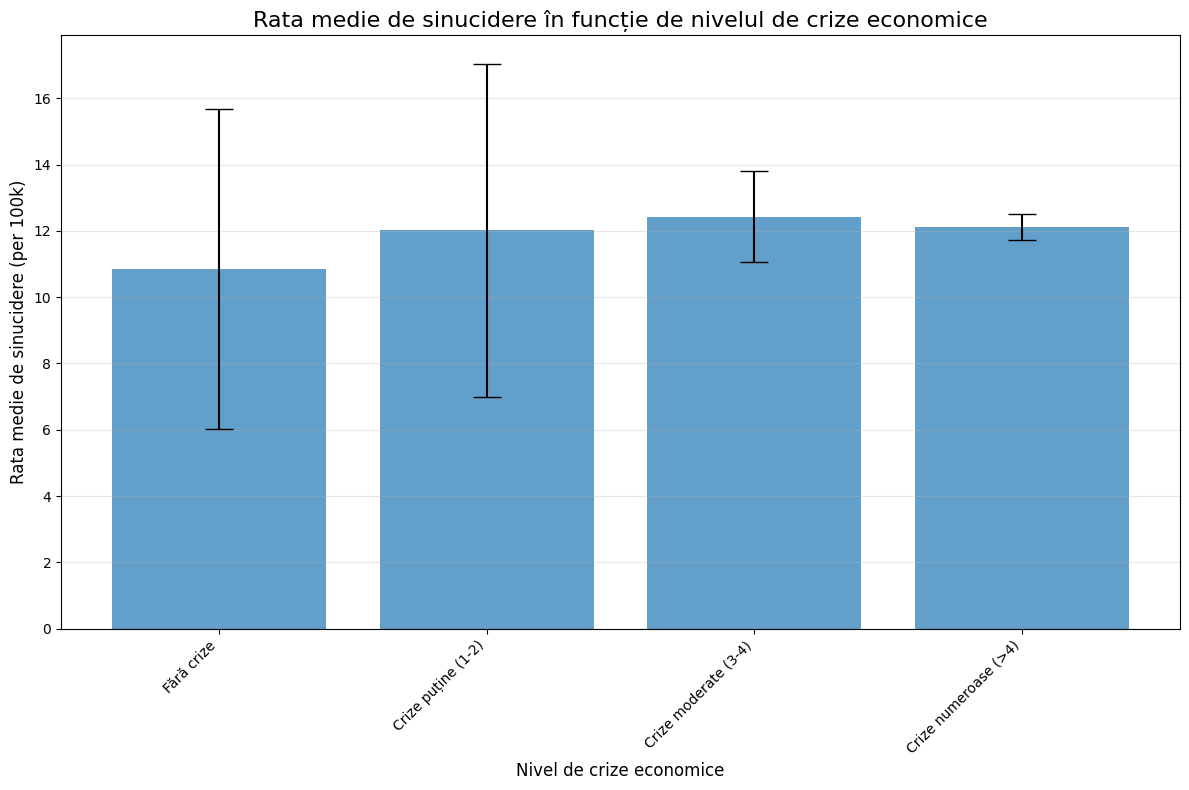


Rezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de crize economice:
F-statistic: 0.2353, p-value: 8.7110e-01
Diferențele sunt semnificative statistic (α=0.05): False


In [ ]:
# Calculăm rata medie de sinucidere pentru anii cu diferite niveluri de crize economice
combined_data['crisis_level'] = pd.cut(
    combined_data['num_crises'],
    bins=[-1, 0, 2, 4, float('inf')],
    labels=['Fără crize', 'Crize puține (1-2)', 'Crize moderate (3-4)', 'Crize numeroase (>4)']
)

crisis_analysis = combined_data.groupby('crisis_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()
print("\nAnaliza ratei de sinucidere în funcție de numărul de crize economice:")
print(crisis_analysis)

# Vizualizarea relației între numărul de crize economice și rata de sinucidere
plt.figure(figsize=(12, 8))
plt.bar(crisis_analysis['crisis_level'], crisis_analysis['mean'],
        yerr=crisis_analysis['std'], capsize=10, color='#1f77b4', alpha=0.7)
plt.title('Rata medie de sinucidere în funcție de nivelul de crize economice', fontsize=16)
plt.xlabel('Nivel de crize economice', fontsize=12)
plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Testul ANOVA pentru a verifica semnificația statistică a diferențelor
crisis_groups = []
for level in crisis_analysis['crisis_level']:
    group_data = combined_data[combined_data['crisis_level'] == level]['suicide_rate']
    if not group_data.empty:
        crisis_groups.append(group_data)

# Aplicăm testul ANOVA dacă avem cel puțin două grupuri
if len(crisis_groups) >= 2:
    f_stat, p_val = f_oneway(*crisis_groups)
    print(f"\nRezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de crize economice:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
    print(f"Diferențele sunt semnificative statistic (α=0.05): {p_val < 0.05}")

<ipython-input-64-df21463cf6c7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disaster_analysis = combined_data.groupby('disaster_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()



Analiza ratei de sinucidere în funcție de numărul de dezastre majore:
  disaster_level       mean       std  count
0  Fără dezastre  12.046655  4.067341     21
1     1 dezastru  11.773740  4.025380     11
2     2 dezastre   9.292079  6.045706      4
3    >2 dezastre        NaN       NaN      0


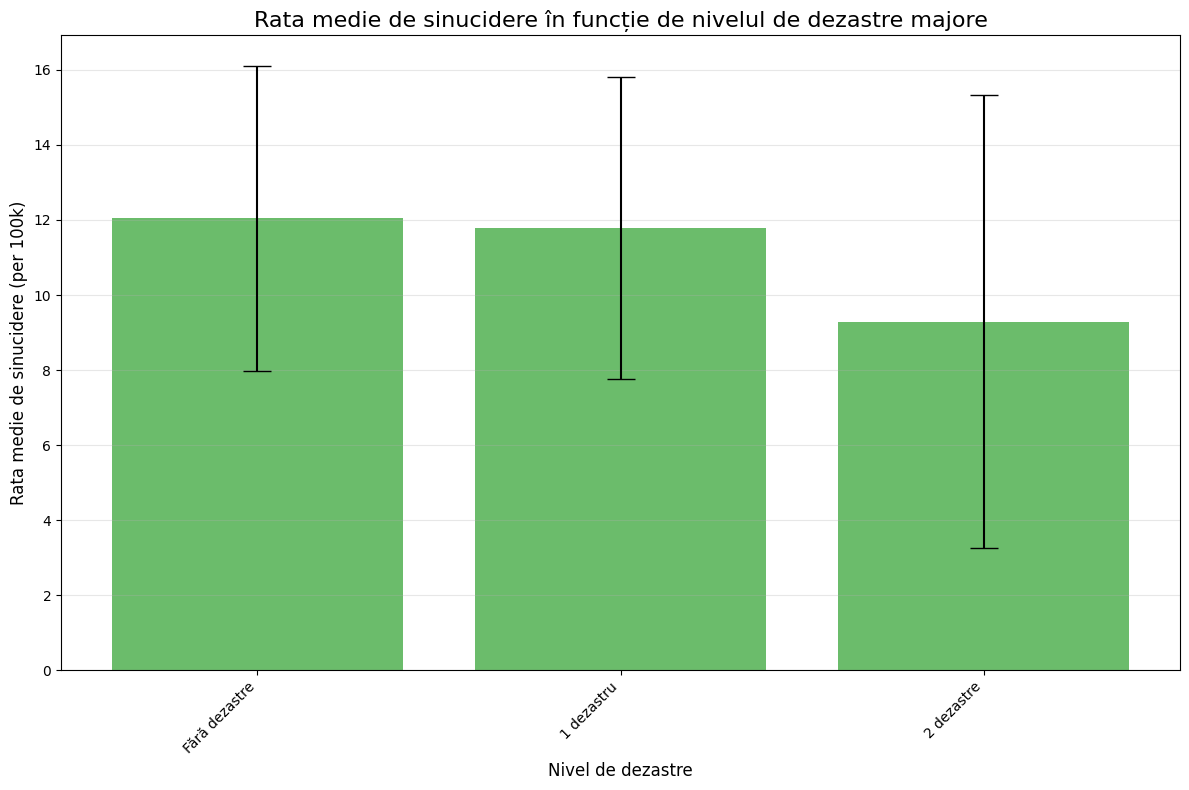


Rezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de dezastre:
F-statistic: 0.7040, p-value: 5.0187e-01
Diferențele sunt semnificative statistic (α=0.05): False


In [ ]:
# Calculăm rata medie de sinucidere pentru anii cu diferite niveluri de dezastre
combined_data['disaster_level'] = pd.cut(
    combined_data['num_disasters'],
    bins=[-1, 0, 1, 2, float('inf')],
    labels=['Fără dezastre', '1 dezastru', '2 dezastre', '>2 dezastre']
)

disaster_analysis = combined_data.groupby('disaster_level')['suicide_rate'].agg(['mean', 'std', 'count']).reset_index()
print("\nAnaliza ratei de sinucidere în funcție de numărul de dezastre majore:")
print(disaster_analysis)

# Vizualizarea relației între numărul de dezastre și rata de sinucidere
plt.figure(figsize=(12, 8))
plt.bar(disaster_analysis['disaster_level'], disaster_analysis['mean'],
        yerr=disaster_analysis['std'], capsize=10, color='#2ca02c', alpha=0.7)
plt.title('Rata medie de sinucidere în funcție de nivelul de dezastre majore', fontsize=16)
plt.xlabel('Nivel de dezastre', fontsize=12)
plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Testul ANOVA pentru a verifica semnificația statistică a diferențelor
disaster_groups = []
for level in disaster_analysis['disaster_level']:
    group_data = combined_data[combined_data['disaster_level'] == level]['suicide_rate']
    if not group_data.empty:
        disaster_groups.append(group_data)

# Aplicăm testul ANOVA dacă avem cel puțin două grupuri
if len(disaster_groups) >= 2:
    f_stat, p_val = f_oneway(*disaster_groups)
    print(f"\nRezultatul testului ANOVA pentru diferențe în ratele de sinucidere între niveluri de dezastre:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
    print(f"Diferențele sunt semnificative statistic (α=0.05): {p_val < 0.05}")


Analiza ratei de sinucidere în funcție de tipul de regim politic:
  regime_type       mean        std  count
0       Altul   9.466136  22.552069  17218
1    Comunist  16.175648  24.423769   7200
2  Democratic  12.622228  14.374155   7338


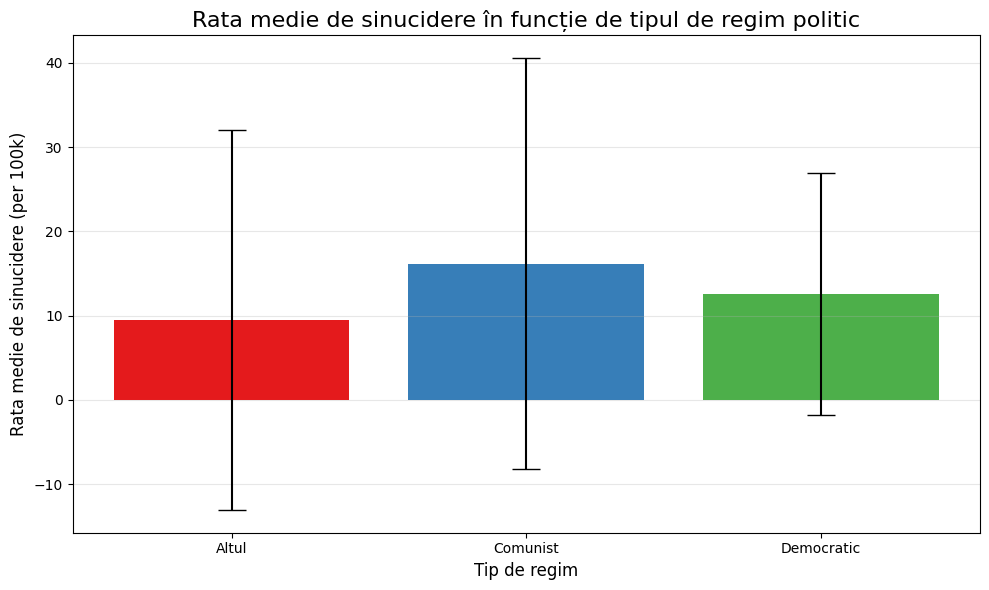


Rezultatul testului ANOVA pentru diferențe în ratele de sinucidere între tipuri de regim politic:
F-statistic: 257.6318, p-value: 1.0234e-111
Diferențele sunt semnificative statistic (α=0.05): True


In [ ]:
# Procesăm datele despre țări comuniste vs. democratice
communist_countries = set(df_communist['Communist_Country'].tolist())
democratic_countries = set(df_communist['Democratic_Counterpart'].tolist())

# Adăugăm o coloană pentru tipul de regim politic
def get_regime_type(country):
    if country in communist_countries:
        return 'Comunist'
    elif country in democratic_countries:
        return 'Democratic'
    else:
        return 'Altul'

df['regime_type'] = df['country'].apply(get_regime_type)

# Calculăm rata medie de sinucidere pentru fiecare tip de regim
regime_analysis = df.groupby('regime_type')['suicides/100k pop'].agg(['mean', 'std', 'count']).reset_index()
print("\nAnaliza ratei de sinucidere în funcție de tipul de regim politic:")
print(regime_analysis)

# Vizualizarea diferențelor între tipurile de regim
plt.figure(figsize=(10, 6))
plt.bar(regime_analysis['regime_type'], regime_analysis['mean'],
        yerr=regime_analysis['std'], capsize=10, color=['#e41a1c', '#377eb8', '#4daf4a'])
plt.title('Rata medie de sinucidere în funcție de tipul de regim politic', fontsize=16)
plt.xlabel('Tip de regim', fontsize=12)
plt.ylabel('Rata medie de sinucidere (per 100k)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Testul ANOVA pentru a verifica semnificația statistică a diferențelor
regime_groups = []
for regime in regime_analysis['regime_type']:
    group_data = df[df['regime_type'] == regime]['suicides/100k pop']
    if not group_data.empty:
        regime_groups.append(group_data)

# Aplicăm testul ANOVA dacă avem cel puțin două grupuri
if len(regime_groups) >= 2:
    f_stat, p_val = f_oneway(*regime_groups)
    print(f"\nRezultatul testului ANOVA pentru diferențe în ratele de sinucidere între tipuri de regim politic:")
    print(f"F-statistic: {f_stat:.4f}, p-value: {p_val:.4e}")
    print(f"Diferențele sunt semnificative statistic (α=0.05): {p_val < 0.05}")

Matricea de corelație pentru variabilele numerice:
                     year  suicides_no  population  suicides/100k pop  \
year                1.000       -0.030       0.144             -0.106   
suicides_no        -0.030        1.000       0.046              0.274   
population          0.144        0.046       1.000             -0.049   
suicides/100k pop  -0.106        0.274      -0.049              1.000   
HDI for year        0.163        0.128       0.083              0.091   
 gdp_for_year ($)   0.118        0.260       0.295              0.264   
gdp_per_capita ($)  0.308        0.057       0.009              0.003   

                    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year                       0.163               0.118               0.308  
suicides_no                0.128               0.260               0.057  
population                 0.083               0.295               0.009  
suicides/100k pop          0.091               0.264            

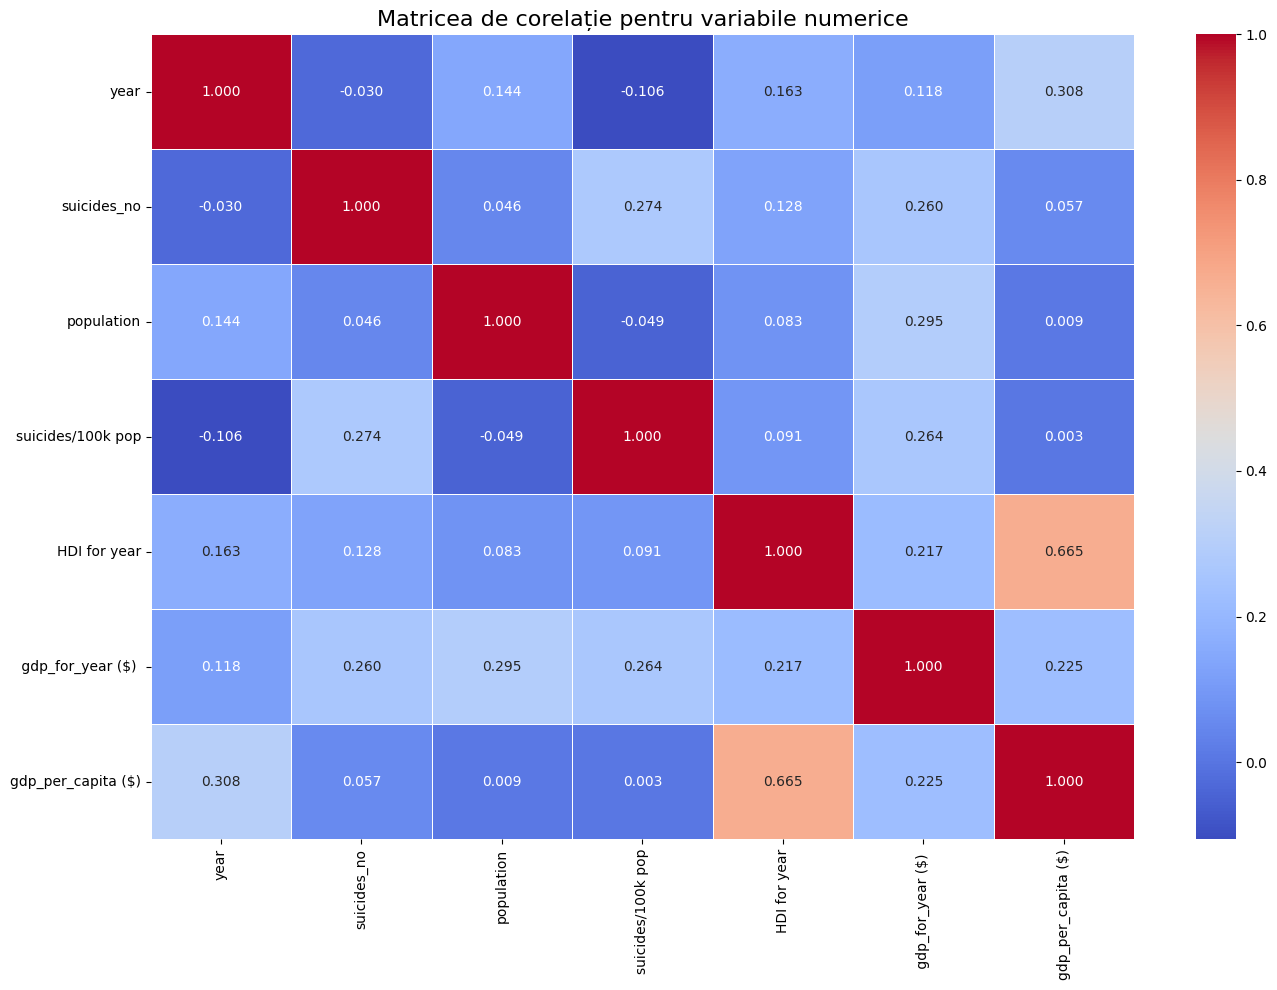

In [ ]:
# Selectarea variabilelor numerice pentru corelație
numeric_vars = ['year', 'suicides_no', 'population', 'suicides/100k pop',
                'HDI for year', ' gdp_for_year ($) ', 'gdp_per_capita ($)']

# Calculul matricei de corelație
correlation_matrix = df[numeric_vars].corr()

# Afișarea matricei de corelație
print("Matricea de corelație pentru variabilele numerice:")
print(correlation_matrix.round(3))

# Vizualizarea matricei de corelație ca heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.title('Matricea de corelație pentru variabile numerice', fontsize=16)
plt.tight_layout()
plt.show()

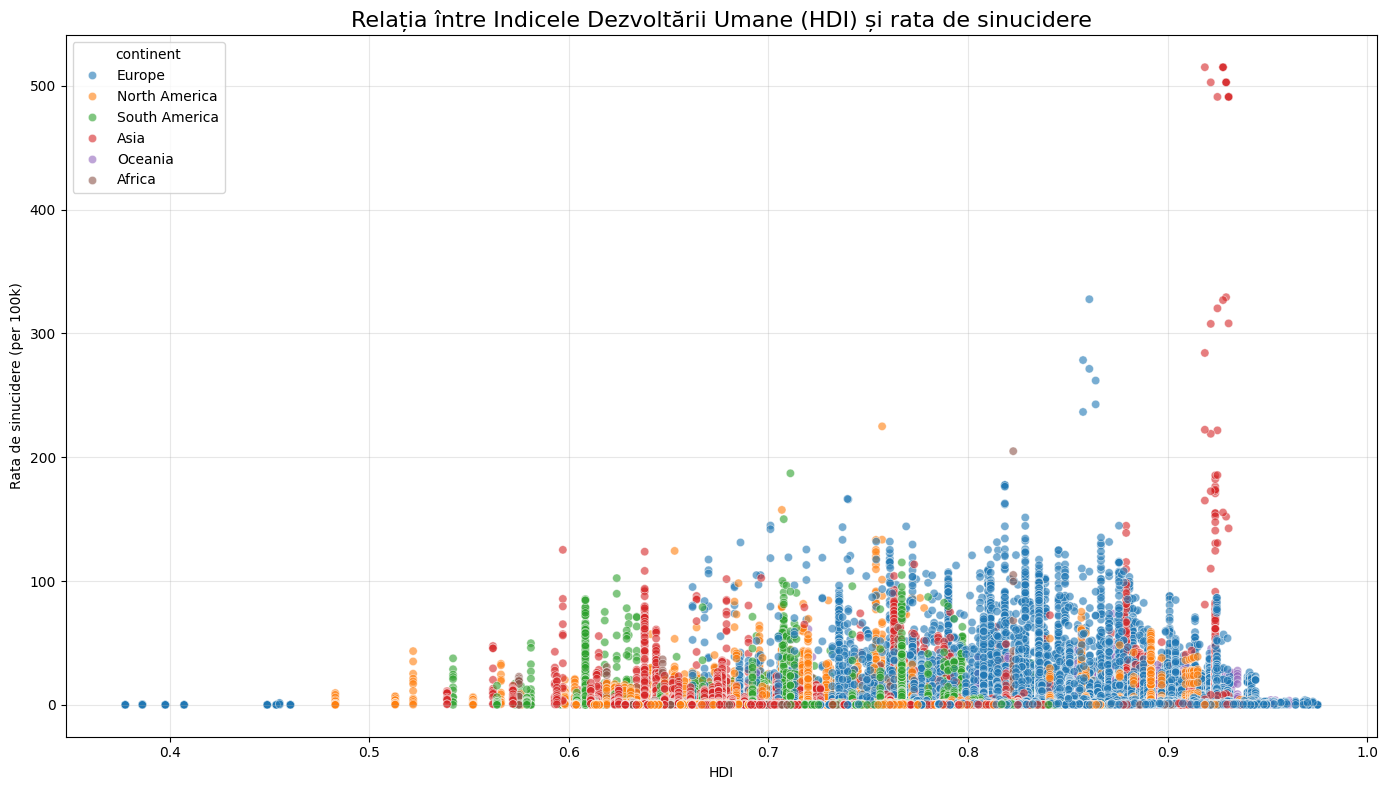

Corelația Pearson între HDI și rata de sinucidere: 0.091 (p-value: 9.459e-60)

Statistici pentru rata de sinucidere în funcție de nivel HDI:
                        mean        std  count
hdi_group                                     
HDI foarte scăzut   8.365835  14.400014   8066
HDI scăzut         10.827201  18.807121   7882
HDI mediu          13.965814  23.176407   7888
HDI ridicat        13.774410  27.379846   7920


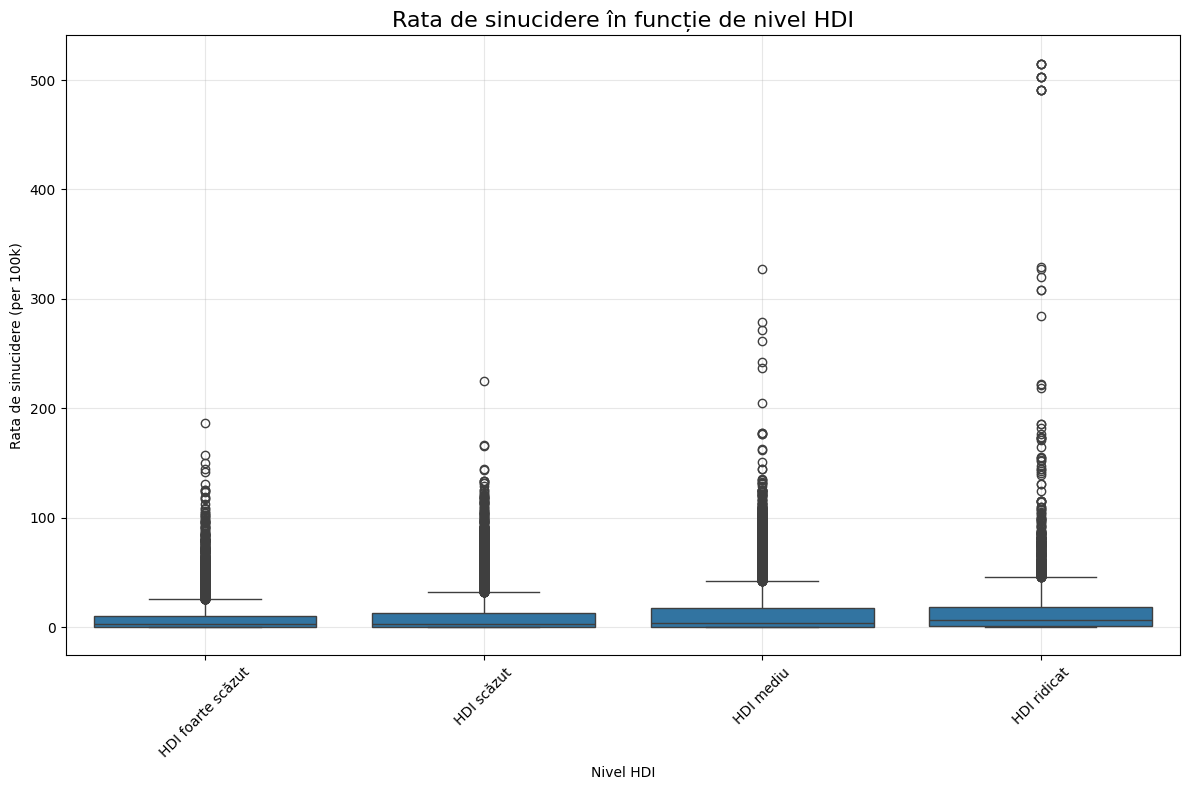

In [ ]:
# Eliminăm valorile lipsă pentru HDI
hdi_df = df.dropna(subset=['HDI for year'])

plt.figure(figsize=(14, 8))
sns.scatterplot(data=hdi_df, x='HDI for year', y='suicides/100k pop', hue='continent', alpha=0.6)
plt.title('Relația între Indicele Dezvoltării Umane (HDI) și rata de sinucidere', fontsize=16)
plt.xlabel('HDI')
plt.ylabel('Rata de sinucidere (per 100k)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Calculul coeficientului de corelație
hdi_suicide_corr, p_value = pearsonr(hdi_df['HDI for year'].values, hdi_df['suicides/100k pop'].values)
print(f"Corelația Pearson între HDI și rata de sinucidere: {hdi_suicide_corr:.3f} (p-value: {p_value:.3e})")

# Crearea unor grupe de HDI pentru analiză statistică
hdi_df['hdi_group'] = pd.qcut(hdi_df['HDI for year'], 4, labels=[
    'HDI foarte scăzut', 'HDI scăzut', 'HDI mediu', 'HDI ridicat'])

# Analiza statistică pe grupe de HDI
hdi_group_stats = hdi_df.groupby('hdi_group')['suicides/100k pop'].agg(['mean', 'std', 'count'])
print("\nStatistici pentru rata de sinucidere în funcție de nivel HDI:")
print(hdi_group_stats)

# Vizualizarea grupelor de HDI
plt.figure(figsize=(12, 8))
sns.boxplot(x='hdi_group', y='suicides/100k pop', data=hdi_df)
plt.title('Rata de sinucidere în funcție de nivel HDI', fontsize=16)
plt.xlabel('Nivel HDI')
plt.ylabel('Rata de sinucidere (per 100k)')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

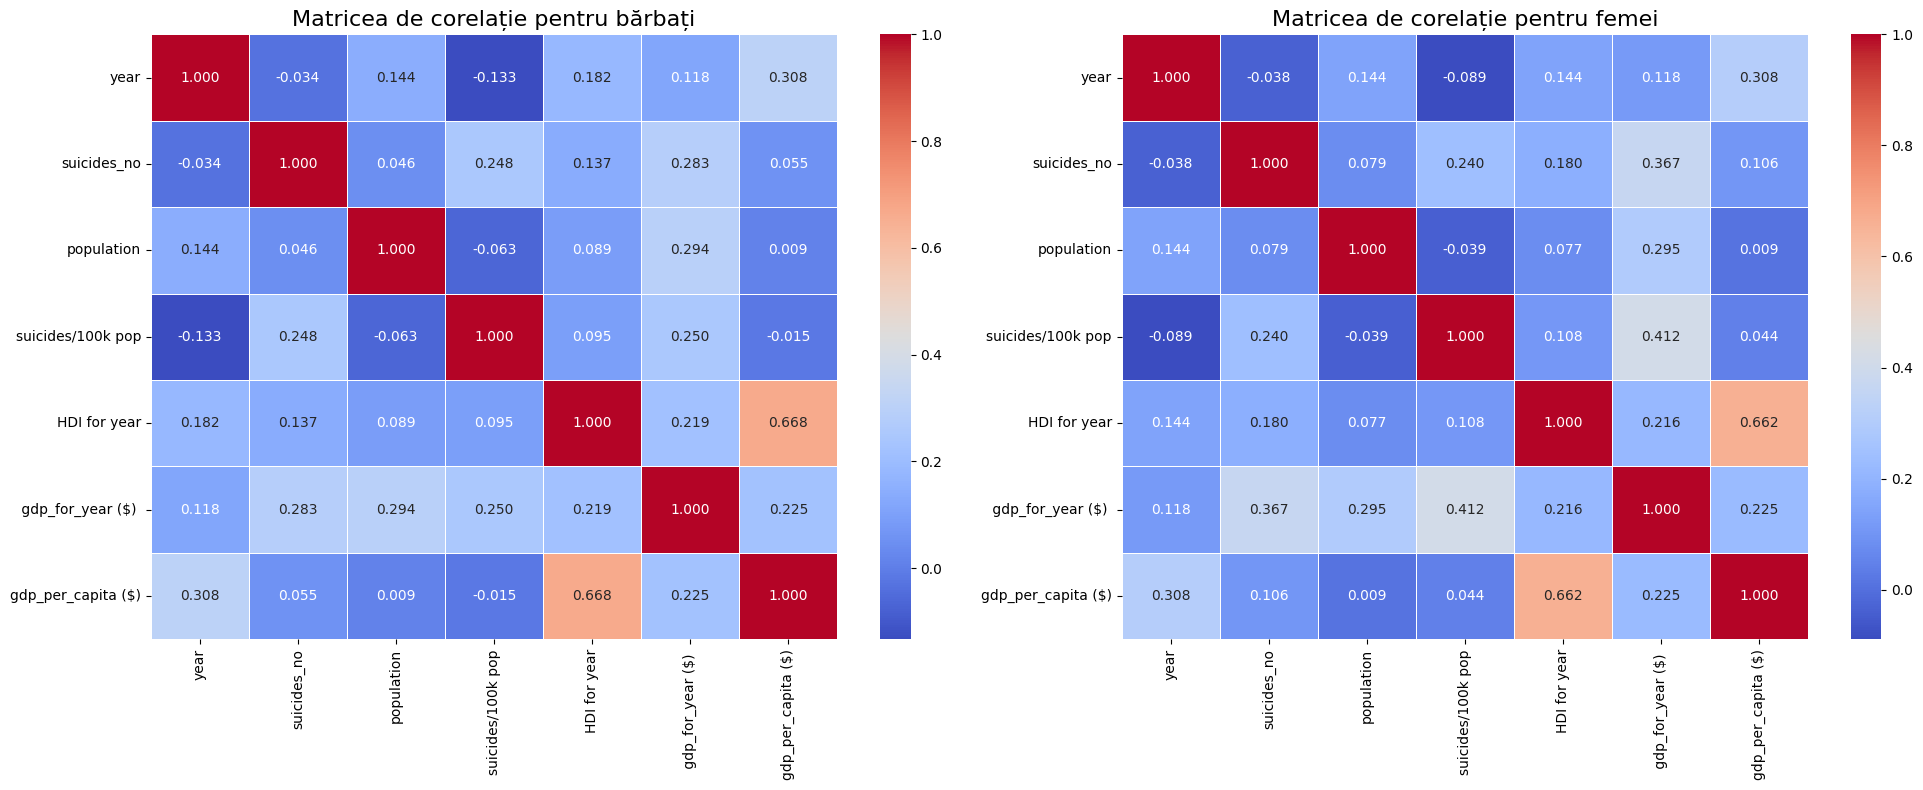


Diferențe de corelație între bărbați și femei:
                                   Variabile  Corelația la bărbați  \
6                       HDI for year vs year                 0.182   
8                 HDI for year vs population                 0.089   
5           suicides/100k pop vs suicides_no                 0.248   
10        HDI for year vs gdp_per_capita ($)                 0.668   
0                        suicides_no vs year                -0.034   
15         gdp_for_year ($)  vs HDI for year                 0.219   
1                         population vs year                 0.144   
19          gdp_per_capita ($) vs population                 0.009   
11                 gdp_for_year ($)  vs year                 0.118   
16   gdp_for_year ($)  vs gdp_per_capita ($)                 0.225   

    Corelația la femei  Diferența  
6                0.144      0.038  
8                0.077      0.011  
5                0.240      0.007  
10               0.662      0.006  
0

In [ ]:
# Matrice de corelație pentru bărbați
male_df = df[df['sex'] == 'male']
male_corr = male_df[numeric_vars].corr()

# Matrice de corelație pentru femei
female_df = df[df['sex'] == 'female']
female_corr = female_df[numeric_vars].corr()

# Vizualizarea matricilor de corelație
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Bărbați
sns.heatmap(male_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, ax=axes[0])
axes[0].set_title('Matricea de corelație pentru bărbați', fontsize=16)

# Femei
sns.heatmap(female_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5, ax=axes[1])
axes[1].set_title('Matricea de corelație pentru femei', fontsize=16)

plt.tight_layout()
plt.show()

# Tabel comparativ al corelațiilor pentru bărbați vs. femei
comparison_df = pd.DataFrame({
    'Variabile': [f"{a} vs {b}" for a in numeric_vars for b in numeric_vars if a < b],
    'Corelația la bărbați': [male_corr.loc[a, b] for a in numeric_vars for b in numeric_vars if a < b],
    'Corelația la femei': [female_corr.loc[a, b] for a in numeric_vars for b in numeric_vars if a < b]
})
comparison_df['Diferența'] = comparison_df['Corelația la bărbați'] - comparison_df['Corelația la femei']
comparison_df = comparison_df.sort_values(by='Diferența', ascending=False)

print("\nDiferențe de corelație între bărbați și femei:")
print(comparison_df.round(3).head(10))

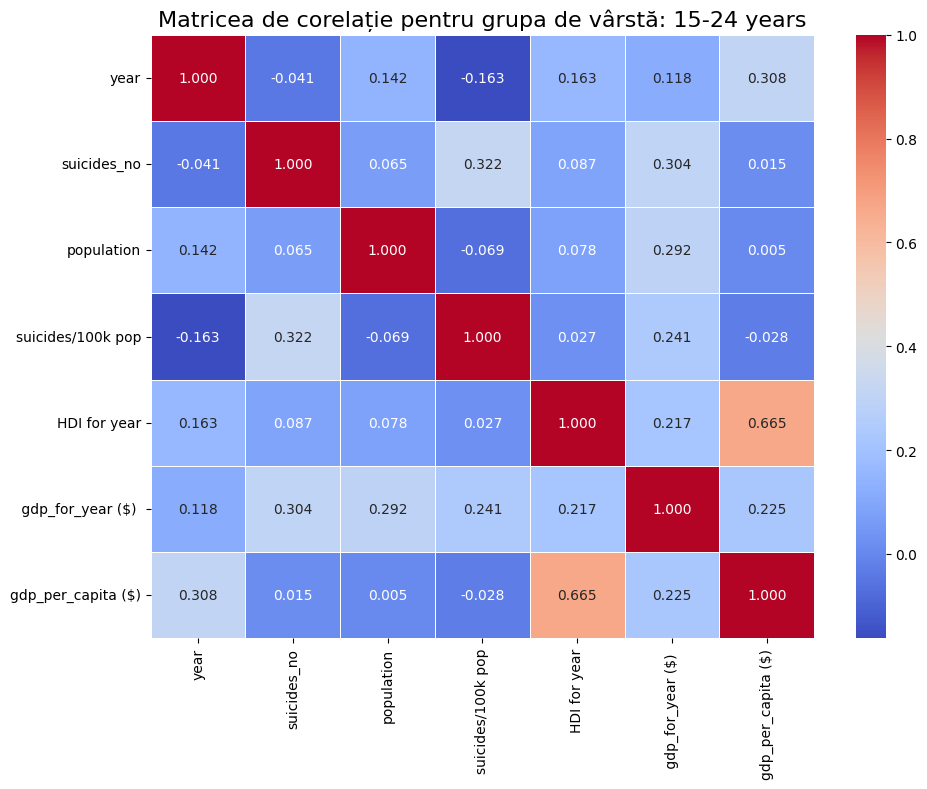

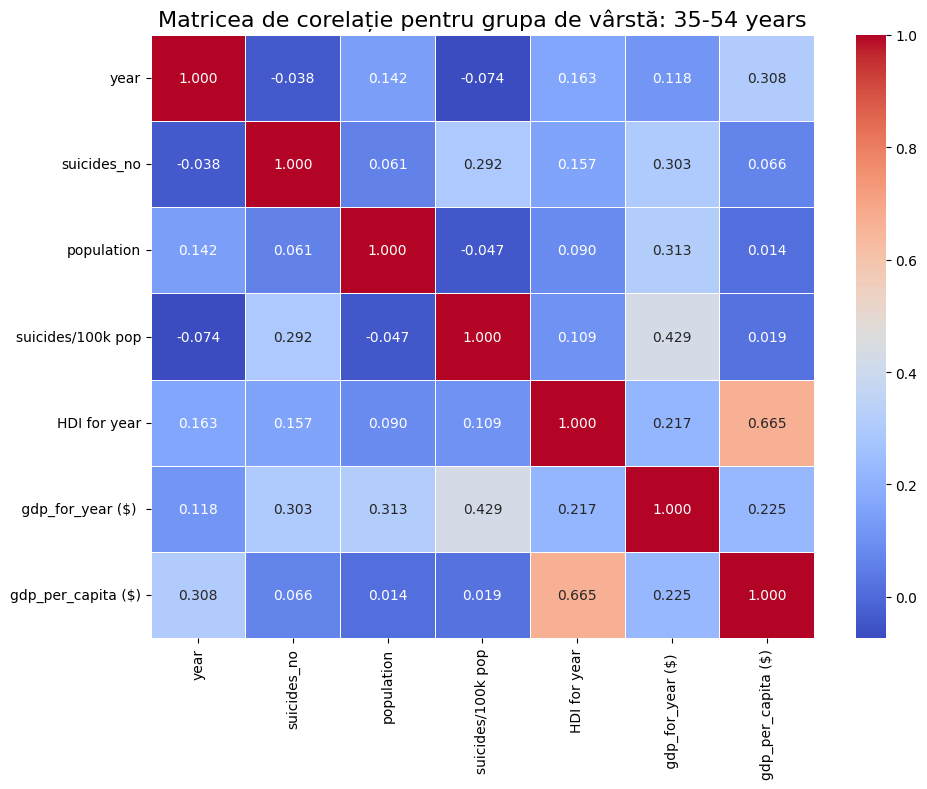

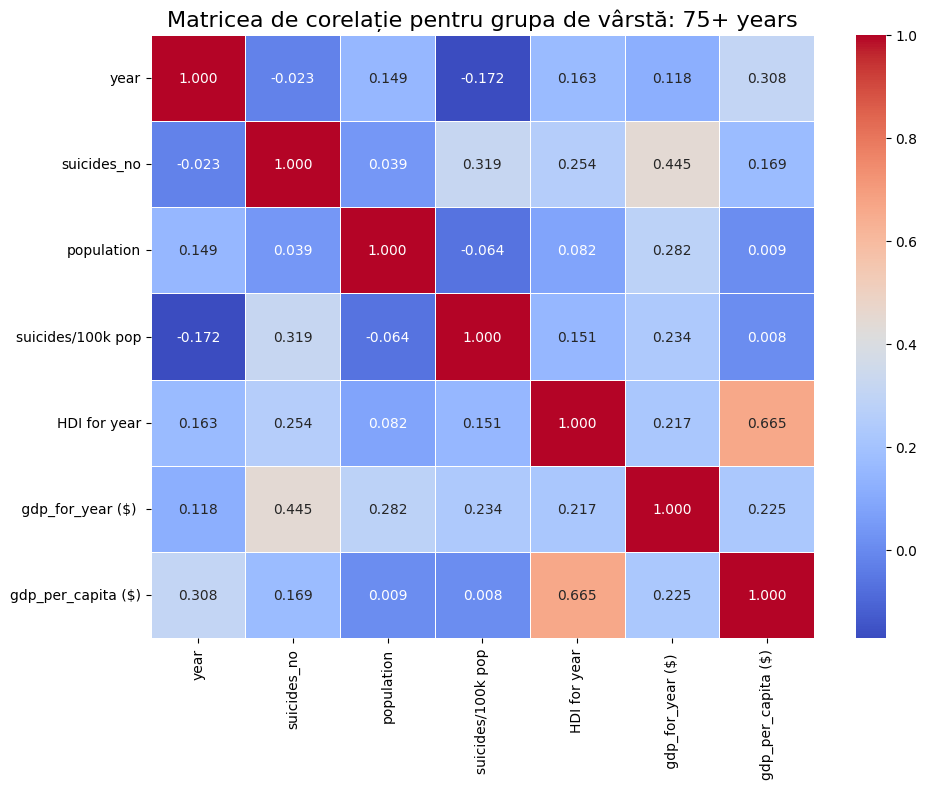

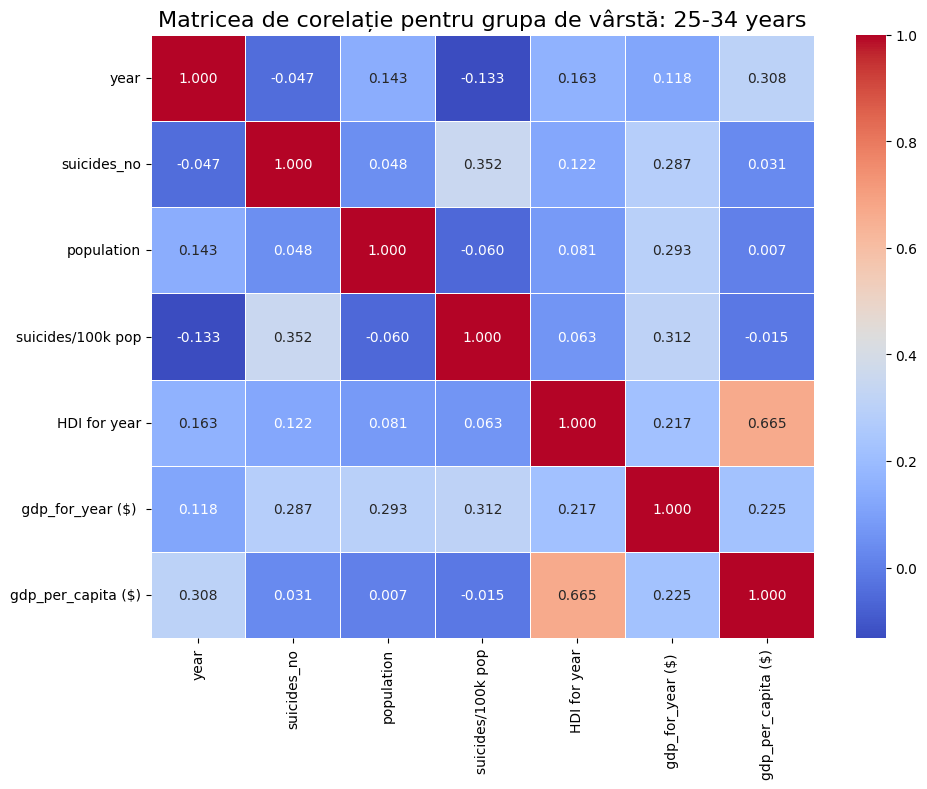

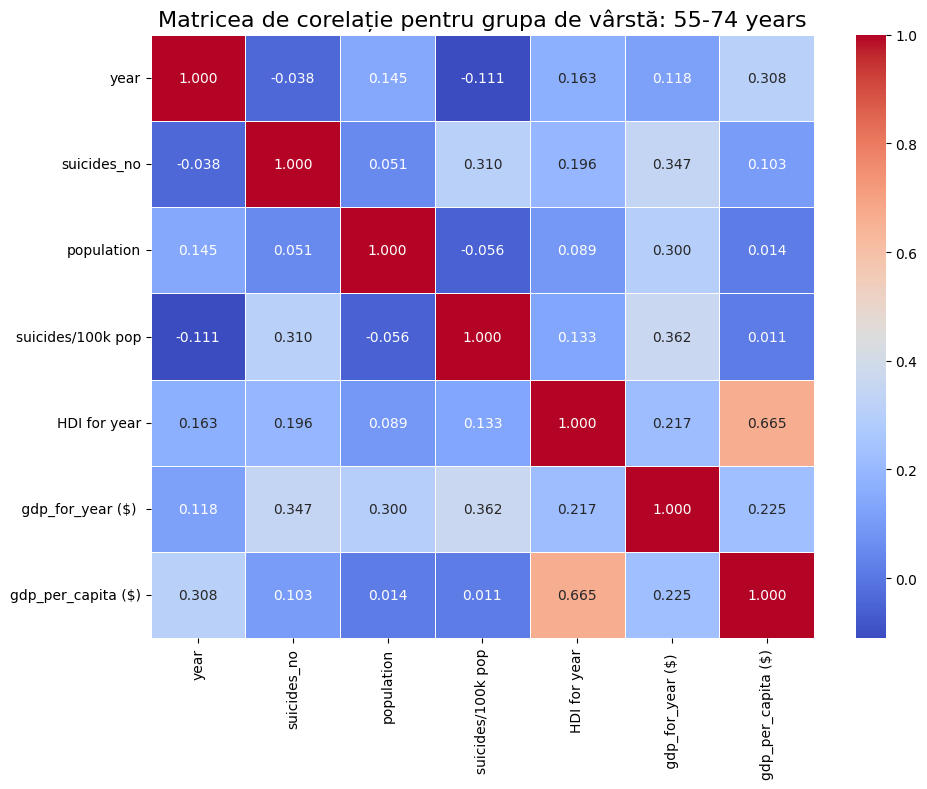

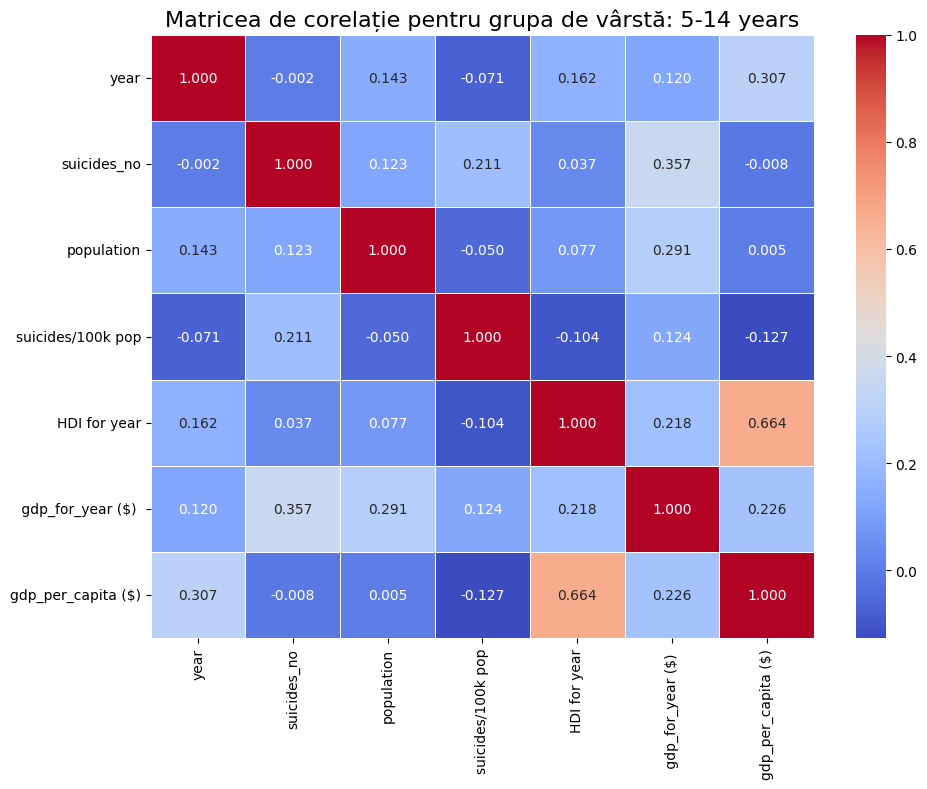


Corelația între PIB per capita și rata de sinucidere pe grupe de vârstă:
  Grupă de vârstă  Corelația PIB per capita - Rata de sinucidere
1     35-54 years                                       0.018909
4     55-74 years                                       0.011480
2       75+ years                                       0.007533
3     25-34 years                                      -0.015171
0     15-24 years                                      -0.028386
5      5-14 years                                      -0.127075


In [ ]:
# Lista grupelor de vârstă
age_groups = df['age'].unique()

# Dicționar pentru stocarea matricilor de corelație
age_corr_matrices = {}

# Calculul matricilor de corelație pentru fiecare grupă de vârstă
for age in age_groups:
    age_df = df[df['age'] == age]
    age_corr_matrices[age] = age_df[numeric_vars].corr()

# Vizualizarea matricilor - una pentru fiecare grupă de vârstă
for age, corr_matrix in age_corr_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.title(f'Matricea de corelație pentru grupa de vârstă: {age}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Comparație a corelațiilor între PIB și rata de sinucidere pentru diferite grupe de vârstă
age_corr_comparison = pd.DataFrame(
    {'Grupă de vârstă': age_groups,
     'Corelația PIB per capita - Rata de sinucidere': [age_corr_matrices[age].loc['gdp_per_capita ($)', 'suicides/100k pop'] for age in age_groups]
    })

print("\nCorelația între PIB per capita și rata de sinucidere pe grupe de vârstă:")
print(age_corr_comparison.sort_values(by='Corelația PIB per capita - Rata de sinucidere', ascending=False))

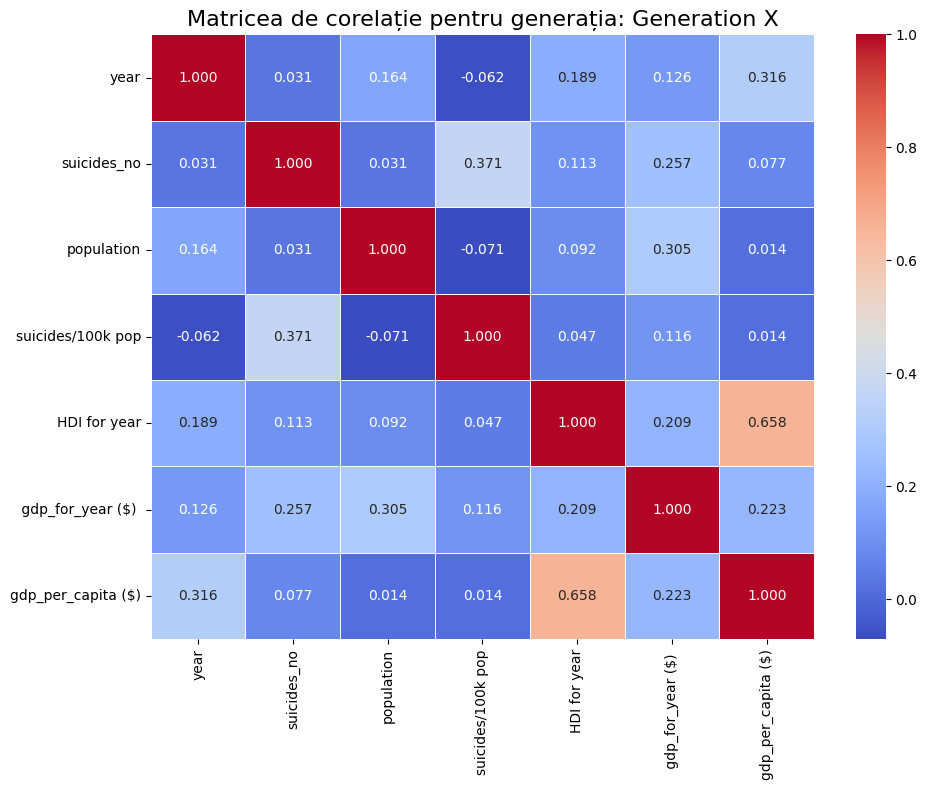

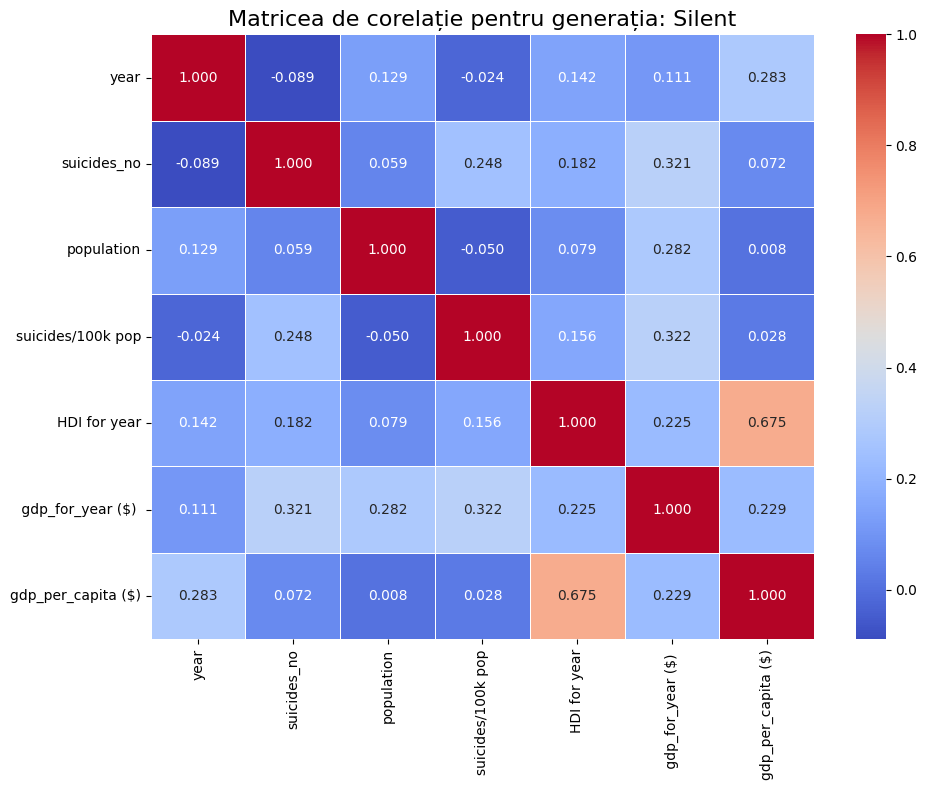

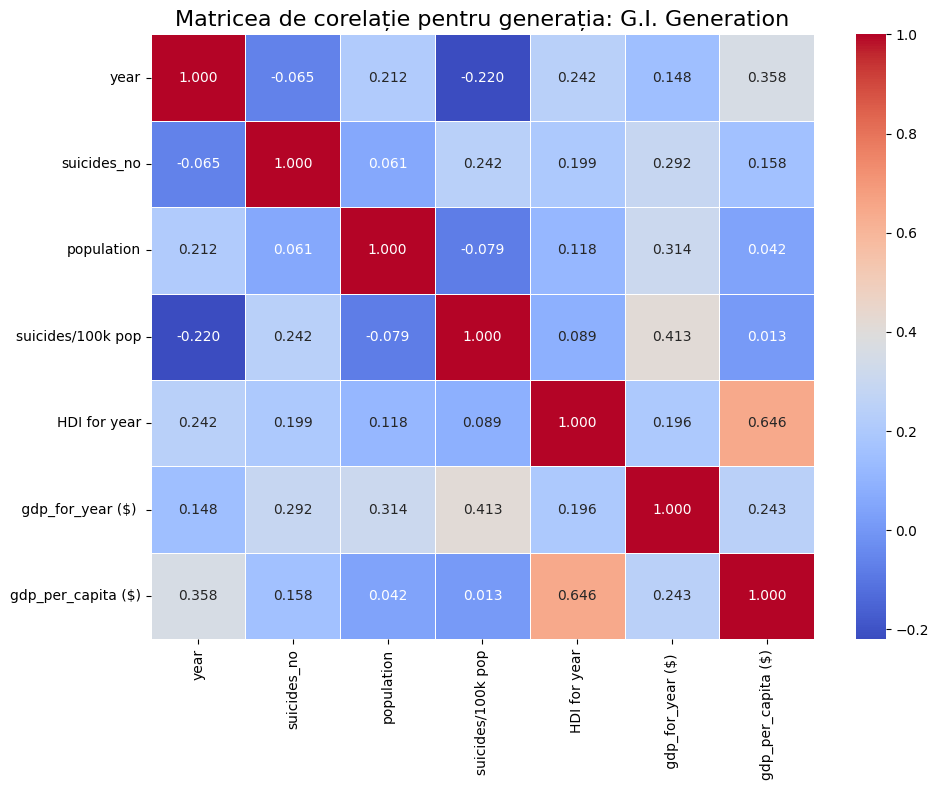

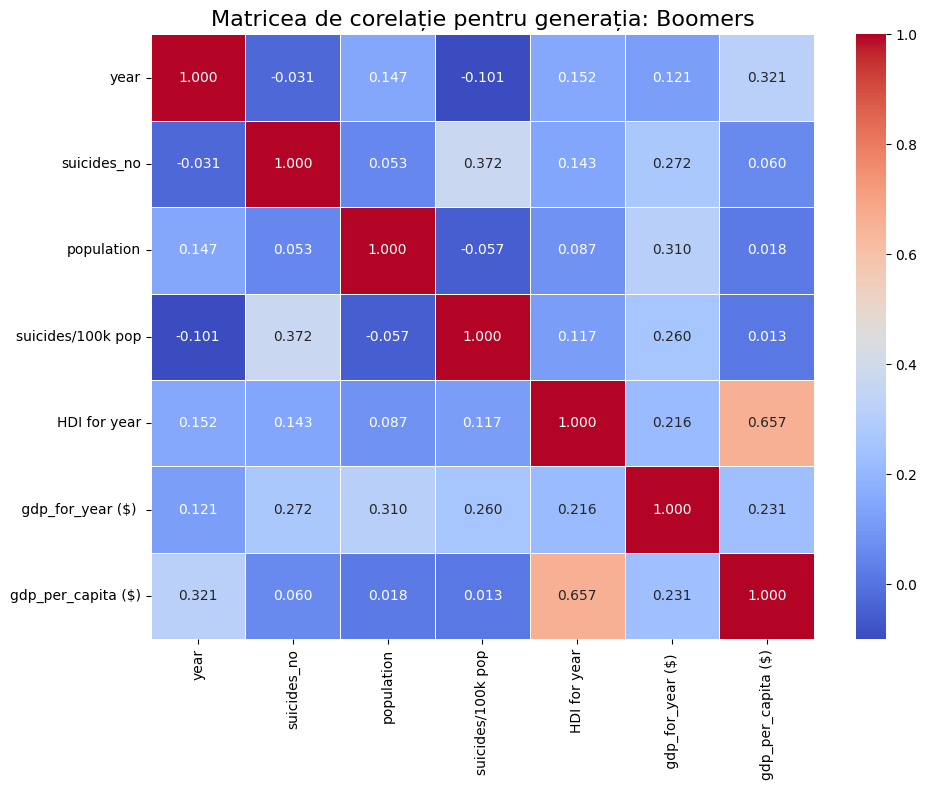

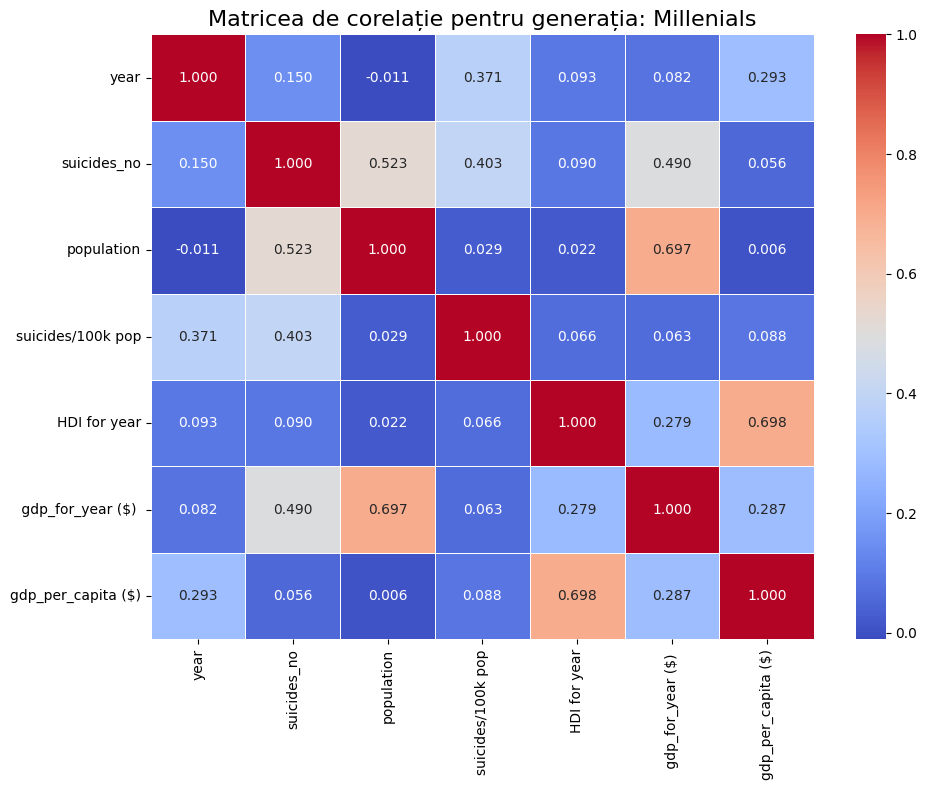

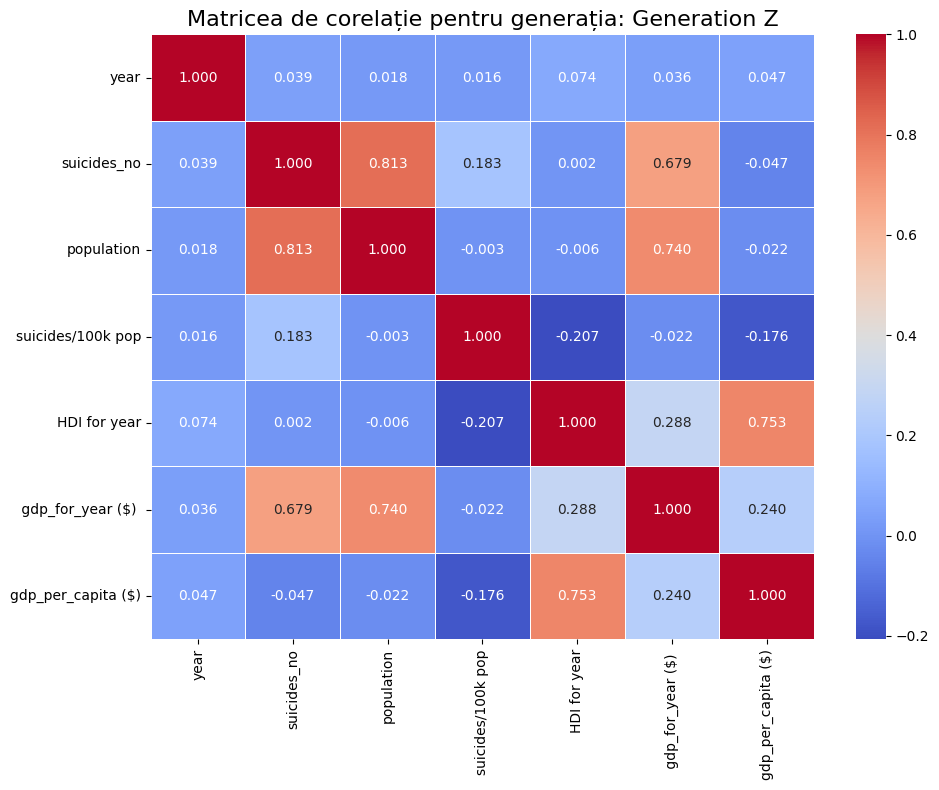


Corelația între PIB per capita și rata de sinucidere pe generații:
         Generație  Corelația PIB per capita - Rata de sinucidere
4       Millenials                                       0.087877
1           Silent                                       0.028329
0     Generation X                                       0.014184
3          Boomers                                       0.013050
2  G.I. Generation                                       0.012808
5     Generation Z                                      -0.175937


In [ ]:
# Lista generațiilor
generations = df['generation'].unique()

# Dicționar pentru stocarea matricilor de corelație
gen_corr_matrices = {}

# Calculul matricilor de corelație pentru fiecare generație
for gen in generations:
    gen_df = df[df['generation'] == gen]
    gen_corr_matrices[gen] = gen_df[numeric_vars].corr()

# Vizualizarea matricilor - una pentru fiecare generație
for gen, corr_matrix in gen_corr_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.title(f'Matricea de corelație pentru generația: {gen}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Comparație a corelațiilor între PIB și rata de sinucidere pentru diferite generații
gen_corr_comparison = pd.DataFrame(
    {'Generație': generations,
     'Corelația PIB per capita - Rata de sinucidere': [gen_corr_matrices[gen].loc['gdp_per_capita ($)', 'suicides/100k pop'] for gen in generations]
    })

print("\nCorelația între PIB per capita și rata de sinucidere pe generații:")
print(gen_corr_comparison.sort_values(by='Corelația PIB per capita - Rata de sinucidere', ascending=False))

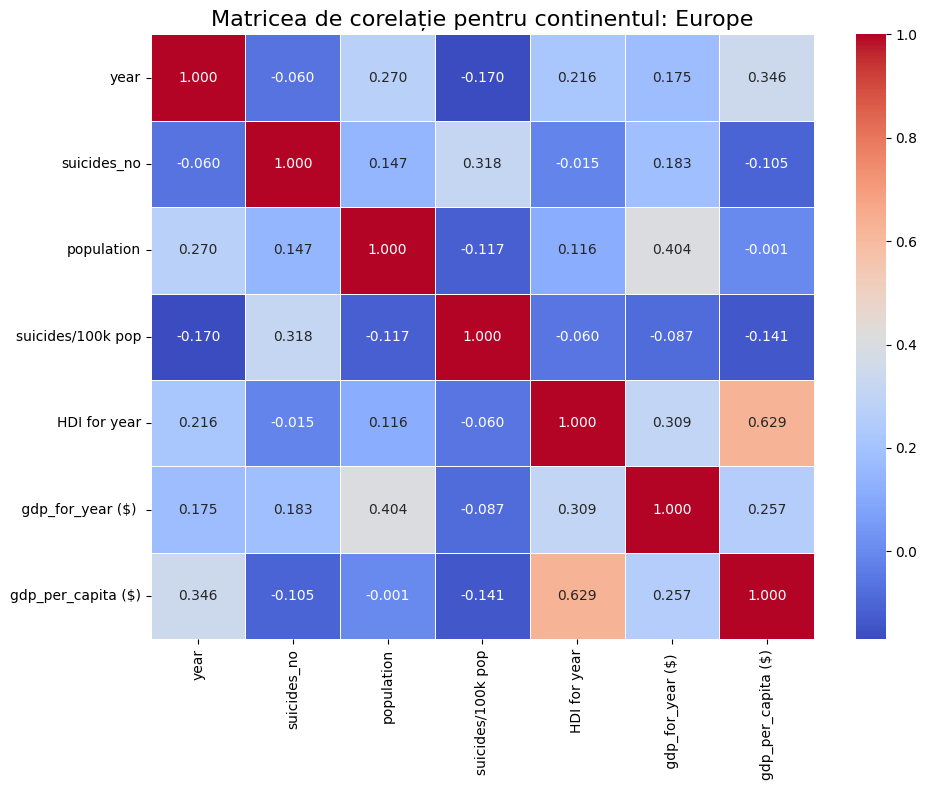

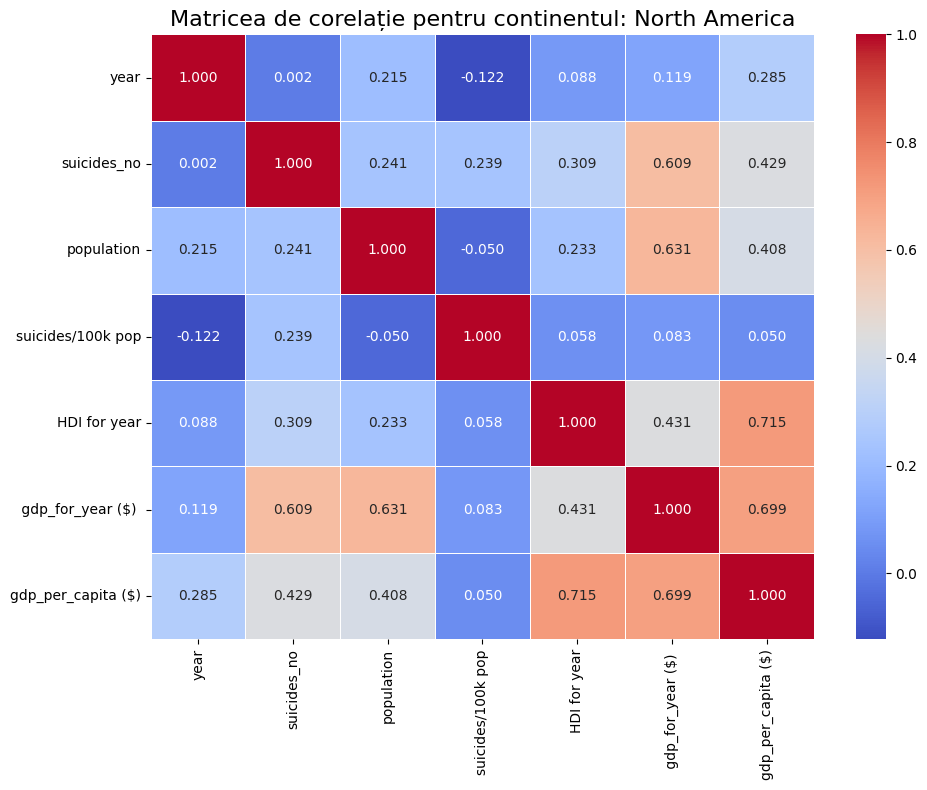

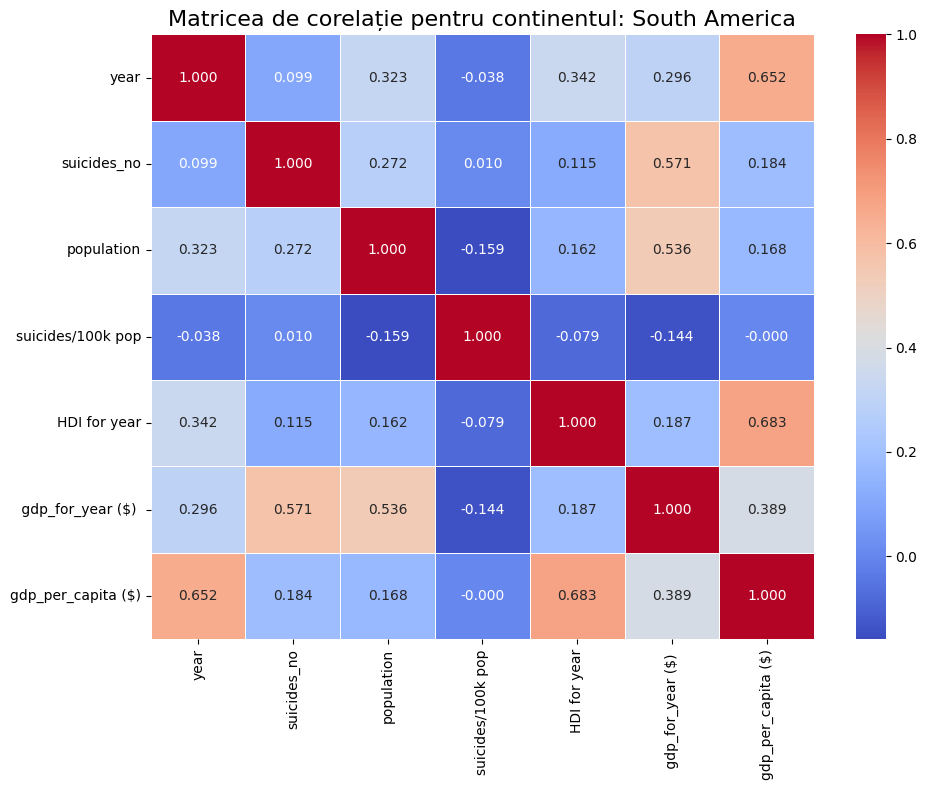

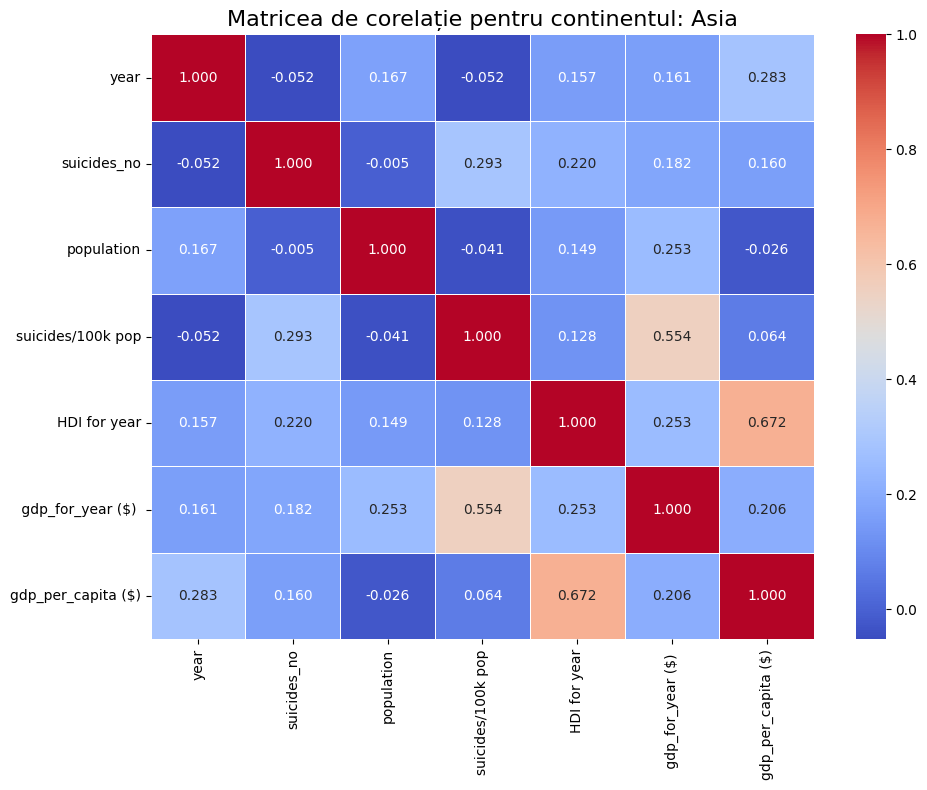

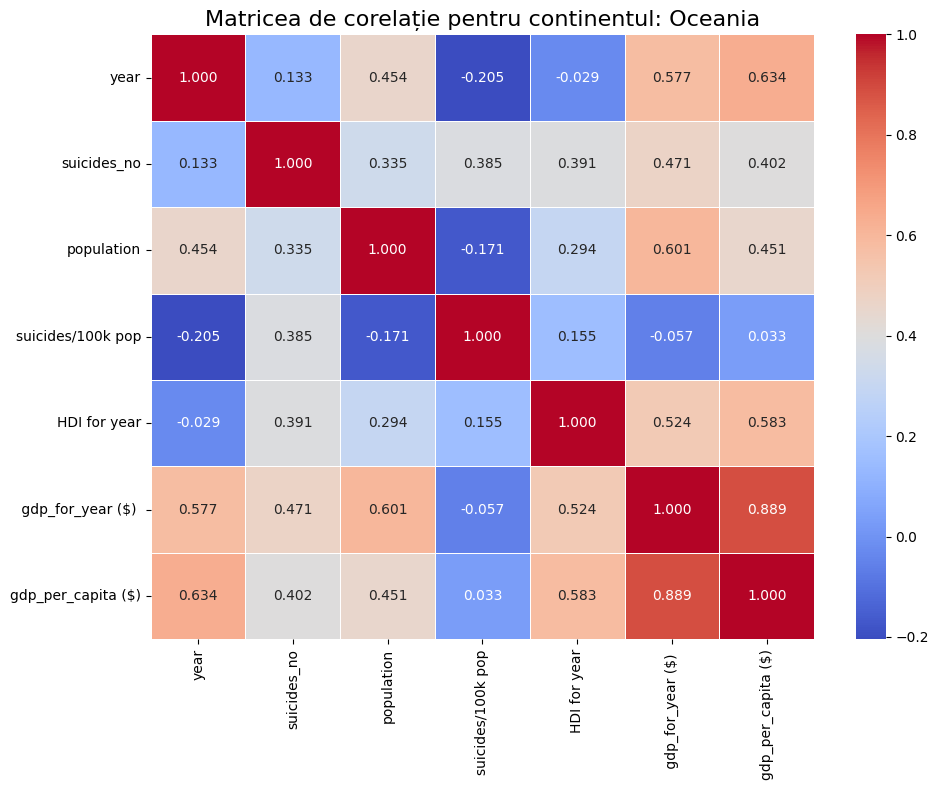

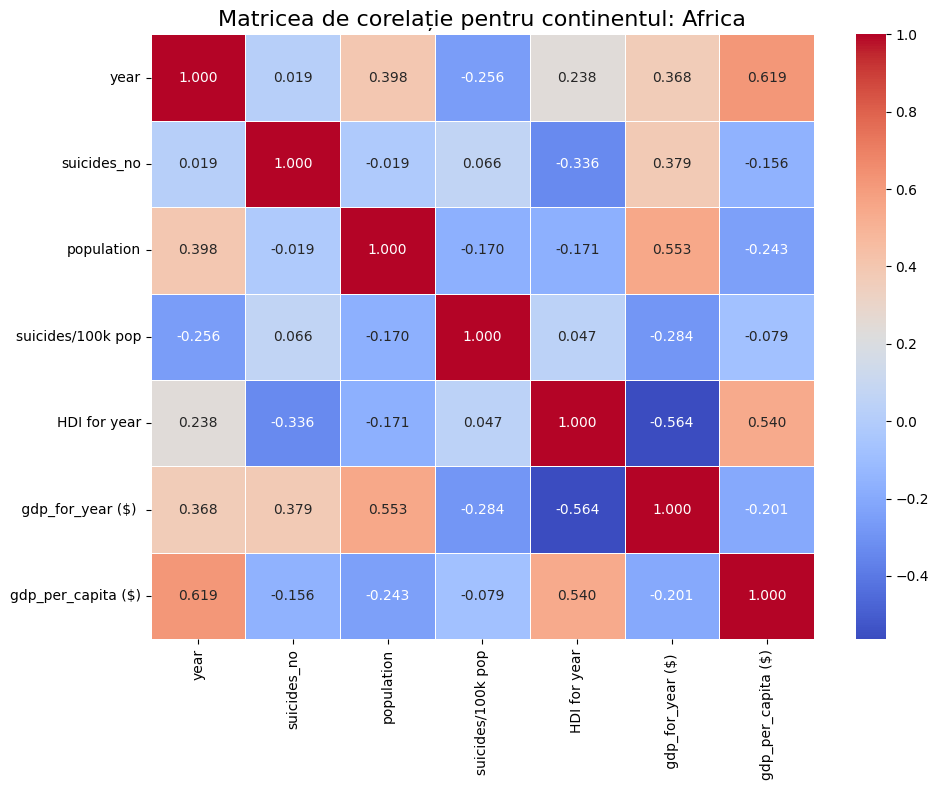


Corelația între HDI și rata de sinucidere pe continente:
       Continent  Corelația HDI - Rata de sinucidere       p-value  \
4        Oceania                            0.155008  6.538481e-07   
3           Asia                            0.128492  1.063843e-24   
1  North America                            0.058461  1.593626e-06   
5         Africa                            0.046641  1.324348e-01   
0         Europe                           -0.059735  7.812768e-12   
2  South America                           -0.079395  2.249453e-06   

   Număr observații  
4              1020  
3              6326  
1              6730  
5              1042  
0             13098  
2              3540  


In [ ]:
# Lista continentelor
continents = df['continent'].unique()

# Dicționar pentru stocarea matricilor de corelație
continent_corr_matrices = {}

# Calculul matricilor de corelație pentru fiecare continent
for continent in continents:
    continent_df = df[df['continent'] == continent]
    if len(continent_df) > 10:  # Verificăm dacă avem suficiente date
        continent_corr_matrices[continent] = continent_df[numeric_vars].corr()

# Vizualizarea matricilor - una pentru fiecare continent
for continent, corr_matrix in continent_corr_matrices.items():
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.title(f'Matricea de corelație pentru continentul: {continent}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Comparație a corelațiilor între HDI și rata de sinucidere pentru diferite continente
hdi_suicide_by_continent = []
for continent in continents:
    continent_df = df[(df['continent'] == continent) & df['HDI for year'].notna()]
    if len(continent_df) > 10:
        corr, p_value = pearsonr(continent_df['HDI for year'].values, continent_df['suicides/100k pop'].values)
        hdi_suicide_by_continent.append({
            'Continent': continent,
            'Corelația HDI - Rata de sinucidere': corr,
            'p-value': p_value,
            'Număr observații': len(continent_df)
        })

hdi_continent_comparison = pd.DataFrame(hdi_suicide_by_continent)
print("\nCorelația între HDI și rata de sinucidere pe continente:")
print(hdi_continent_comparison.sort_values(by='Corelația HDI - Rata de sinucidere', ascending=False))


Matricea de corelație pentru perioada 1985-1994:
                     year  suicides_no  population  suicides/100k pop  \
year                1.000        0.036       0.020              0.045   
suicides_no         0.036        1.000       0.606              0.320   
population          0.020        0.606       1.000              0.004   
suicides/100k pop   0.045        0.320       0.004              1.000   
HDI for year        0.084        0.152       0.141              0.162   
 gdp_for_year ($)   0.055        0.469       0.738              0.066   
gdp_per_capita ($)  0.146        0.154       0.197              0.144   

                    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year                       0.084               0.055               0.146  
suicides_no                0.152               0.469               0.154  
population                 0.141               0.738               0.197  
suicides/100k pop          0.162               0.066             

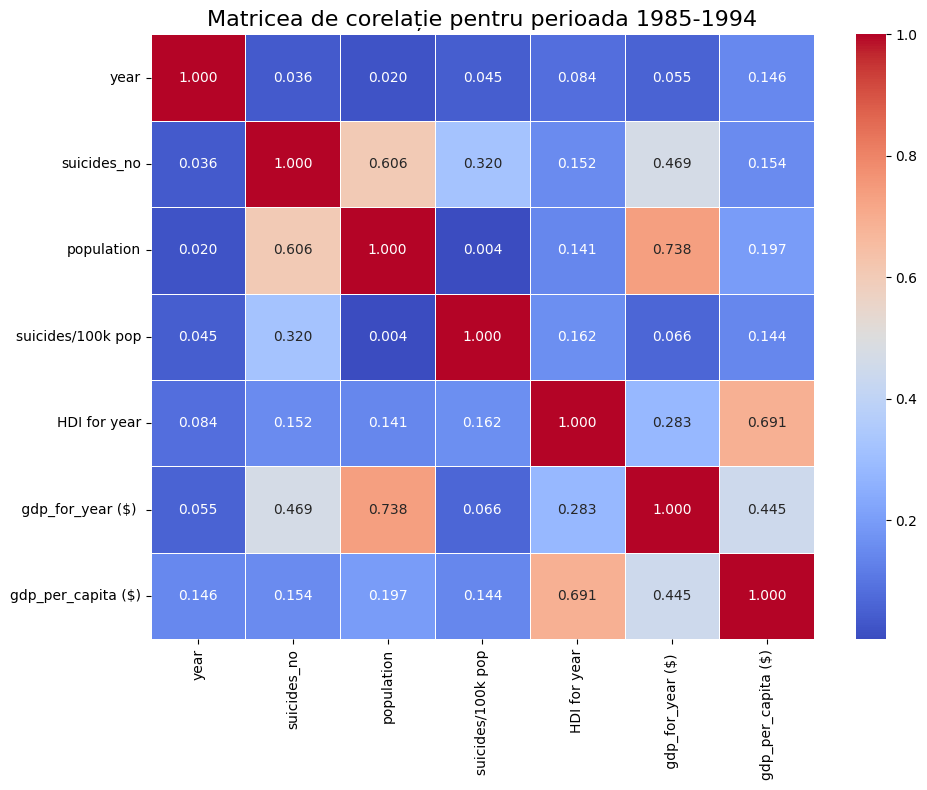


Matricea de corelație pentru perioada 1995-2004:
                     year  suicides_no  population  suicides/100k pop  \
year                1.000       -0.008      -0.003             -0.044   
suicides_no        -0.008        1.000       0.576              0.312   
population         -0.003        0.576       1.000              0.003   
suicides/100k pop  -0.044        0.312       0.003              1.000   
HDI for year        0.066        0.125       0.117              0.116   
 gdp_for_year ($)   0.014        0.360       0.709              0.009   
gdp_per_capita ($)  0.077        0.067       0.132             -0.001   

                    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year                       0.066               0.014               0.077  
suicides_no                0.125               0.360               0.067  
population                 0.117               0.709               0.132  
suicides/100k pop          0.116               0.009             

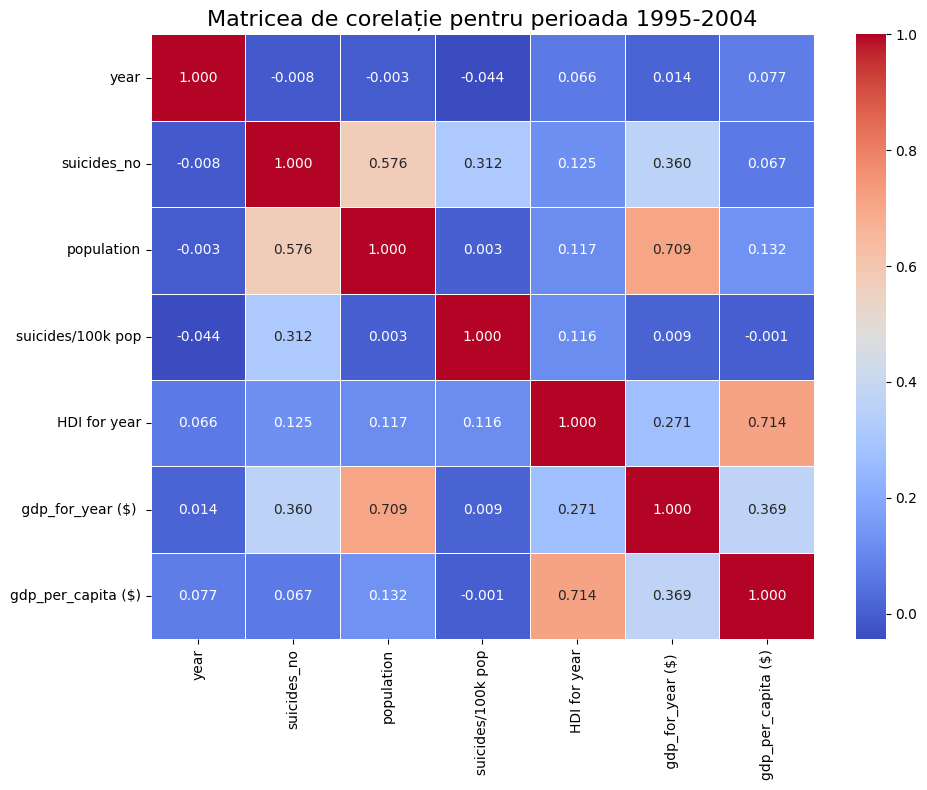


Matricea de corelație pentru perioada 2005-2015:
                     year  suicides_no  population  suicides/100k pop  \
year                1.000        0.008       0.033             -0.021   
suicides_no         0.008        1.000       0.675              0.291   
population          0.033        0.675       1.000              0.020   
suicides/100k pop  -0.021        0.291       0.020              1.000   
HDI for year        0.091        0.157       0.104              0.130   
 gdp_for_year ($)   0.047        0.523       0.745              0.038   
gdp_per_capita ($)  0.088        0.058       0.042              0.003   

                    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year                       0.091               0.047               0.088  
suicides_no                0.157               0.523               0.058  
population                 0.104               0.745               0.042  
suicides/100k pop          0.130               0.038             

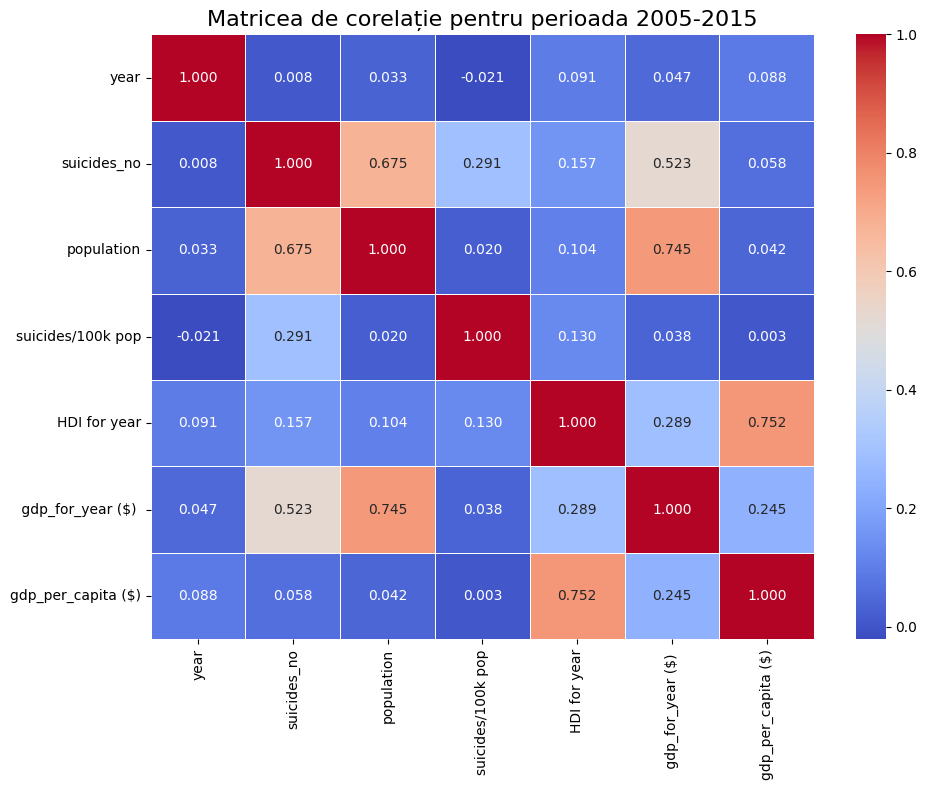


Matricea de corelație pentru perioada 2016-2020:
                     year  suicides_no  population  suicides/100k pop  \
year                1.000       -0.099       0.024             -0.071   
suicides_no        -0.099        1.000       0.146              0.252   
population          0.024        0.146       1.000             -0.033   
suicides/100k pop  -0.071        0.252      -0.033              1.000   
HDI for year        0.013        0.144       0.109              0.078   
 gdp_for_year ($)   0.021        0.347       0.297              0.580   
gdp_per_capita ($) -0.009        0.113      -0.051              0.064   

                    HDI for year   gdp_for_year ($)   gdp_per_capita ($)  
year                       0.013               0.021              -0.009  
suicides_no                0.144               0.347               0.113  
population                 0.109               0.297              -0.051  
suicides/100k pop          0.078               0.580             

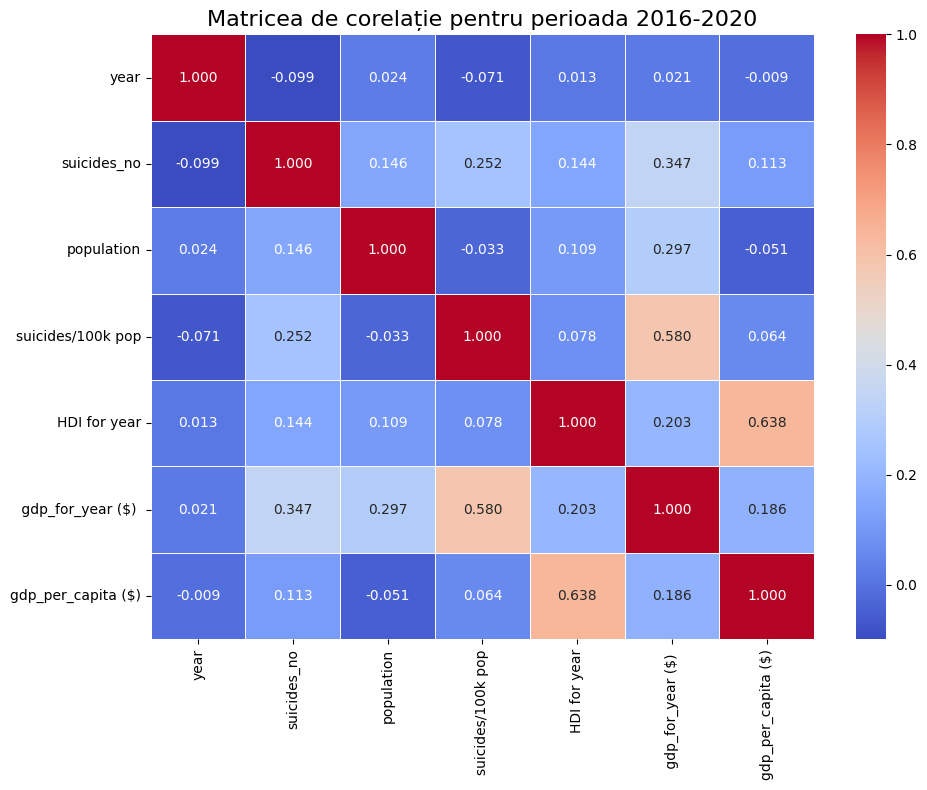


Evoluția corelațiilor în timp:
    Perioada  Corelația PIB-Suicid  Corelația HDI-Suicid
0  1985-1994              0.143532              0.161863
1  1995-2004             -0.000693              0.116321
2  2005-2015              0.003046              0.129811
3  2016-2020              0.063844              0.078047


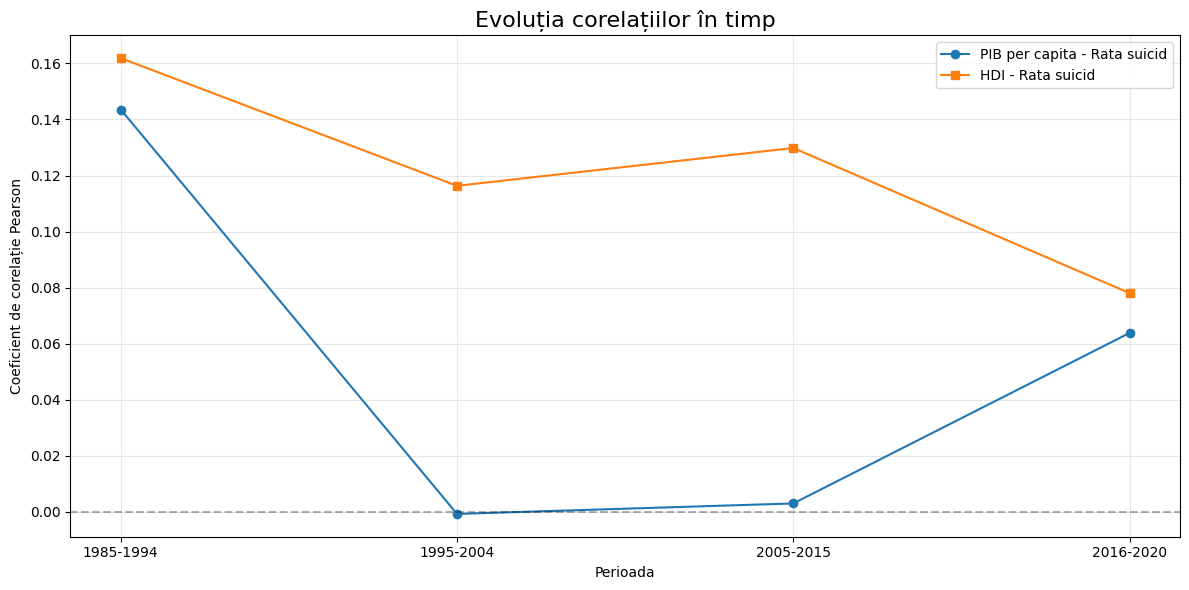

In [ ]:
# Calculăm matricea de corelație pentru diferite perioade
period_ranges = [(1985, 1994), (1995, 2004), (2005, 2015), (2016, 2020)]
period_matrices = {}

for start, end in period_ranges:
    period_df = df[(df['year'] >= start) & (df['year'] <= end)]
    period_matrices[(start, end)] = period_df[numeric_vars].corr()

    # Afișăm corelațiile pentru această perioadă
    print(f"\nMatricea de corelație pentru perioada {start}-{end}:")
    print(period_matrices[(start, end)].round(3))

    # Vizualizăm matricea
    plt.figure(figsize=(10, 8))
    sns.heatmap(period_matrices[(start, end)], annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
    plt.title(f'Matricea de corelație pentru perioada {start}-{end}', fontsize=16)
    plt.tight_layout()
    plt.show()

# Compararea corelațiilor între perioadele analizate
period_comparison = pd.DataFrame({
    'Perioada': [f"{start}-{end}" for start, end in period_ranges],
    'Corelația PIB-Suicid': [period_matrices[(start, end)].loc['gdp_per_capita ($)', 'suicides/100k pop'] for start, end in period_ranges],
    'Corelația HDI-Suicid': [period_matrices[(start, end)].loc['HDI for year', 'suicides/100k pop'] for start, end in period_ranges]
})

print("\nEvoluția corelațiilor în timp:")
print(period_comparison)

# Vizualizarea evoluției corelațiilor
plt.figure(figsize=(12, 6))
periods = [f"{start}-{end}" for start, end in period_ranges]
plt.plot(periods, period_comparison['Corelația PIB-Suicid'], 'o-', label='PIB per capita - Rata suicid')
plt.plot(periods, period_comparison['Corelația HDI-Suicid'], 's-', label='HDI - Rata suicid')
plt.title('Evoluția corelațiilor în timp', fontsize=16)
plt.xlabel('Perioada')
plt.ylabel('Coeficient de corelație Pearson')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Funcție pentru testarea semnificației corelației și raportarea rezultatelor
def test_correlation(x, y, label_x, label_y):
    # Eliminăm valorile lipsă
    mask = ~np.isnan(x) & ~np.isnan(y)
    x_clean = x[mask]
    y_clean = y[mask]

    # Calculul corelației Pearson și Spearman
    pearson_r, pearson_p = pearsonr(x_clean, y_clean)
    spearman_r, spearman_p = spearmanr(x_clean, y_clean)

    print(f"Corelația între {label_x} și {label_y}:")
    print(f"  Pearson r = {pearson_r:.3f}, p-value = {pearson_p:.3e}")
    print(f"  Spearman rho = {spearman_r:.3f}, p-value = {spearman_p:.3e}")
    print(f"  Semnificativ statistic (α=0.05): {pearson_p < 0.05}")
    print(f"  Număr de observații: {len(x_clean)}")
    print()

    return pearson_r, pearson_p, spearman_r, spearman_p

# Testăm corelațiile principale
print("=== TESTAREA SEMNIFICAȚIEI STATISTICE A CORELAȚIILOR ===\n")

# PIB per capita vs. Rata de sinucidere
test_correlation(df['gdp_per_capita ($)'].values, df['suicides/100k pop'].values,
                "PIB per capita", "Rata de sinucidere")

# HDI vs. Rata de sinucidere
test_correlation(df['HDI for year'].values, df['suicides/100k pop'].values,
                "HDI", "Rata de sinucidere")

# An vs. Rata de sinucidere (tendința temporală)
test_correlation(df['year'].values, df['suicides/100k pop'].values,
                "An", "Rata de sinucidere")

# PIB per capita vs. HDI
test_correlation(df['gdp_per_capita ($)'].values, df['HDI for year'].values,
                "PIB per capita", "HDI")

=== TESTAREA SEMNIFICAȚIEI STATISTICE A CORELAȚIILOR ===

Corelația între PIB per capita și Rata de sinucidere:
  Pearson r = 0.003, p-value = 6.436e-01
  Spearman rho = 0.027, p-value = 1.397e-06
  Semnificativ statistic (α=0.05): False
  Număr de observații: 31756

Corelația între HDI și Rata de sinucidere:
  Pearson r = 0.091, p-value = 9.459e-60
  Spearman rho = 0.111, p-value = 1.044e-87
  Semnificativ statistic (α=0.05): True
  Număr de observații: 31756

Corelația între An și Rata de sinucidere:
  Pearson r = -0.106, p-value = 4.303e-80
  Spearman rho = -0.229, p-value = 0.000e+00
  Semnificativ statistic (α=0.05): True
  Număr de observații: 31756

Corelația între PIB per capita și HDI:
  Pearson r = 0.665, p-value = 0.000e+00
  Spearman rho = 0.810, p-value = 0.000e+00
  Semnificativ statistic (α=0.05): True
  Număr de observații: 31756



(np.float64(0.6647108908421767),
 np.float64(0.0),
 np.float64(0.8097084365877342),
 np.float64(0.0))

Rata medie de sinucidere în funcție de prezența evenimentelor globale:
          Tip eveniment  Rata medie de sinucidere
0    Cu criză economică                 12.638131
1  Fără criză economică                 11.346097
2     Cu conflict major                 13.082687
3   Fără conflict major                 11.024454
4     Cu dezastru major                 11.685824
5   Fără dezastru major                 11.721245


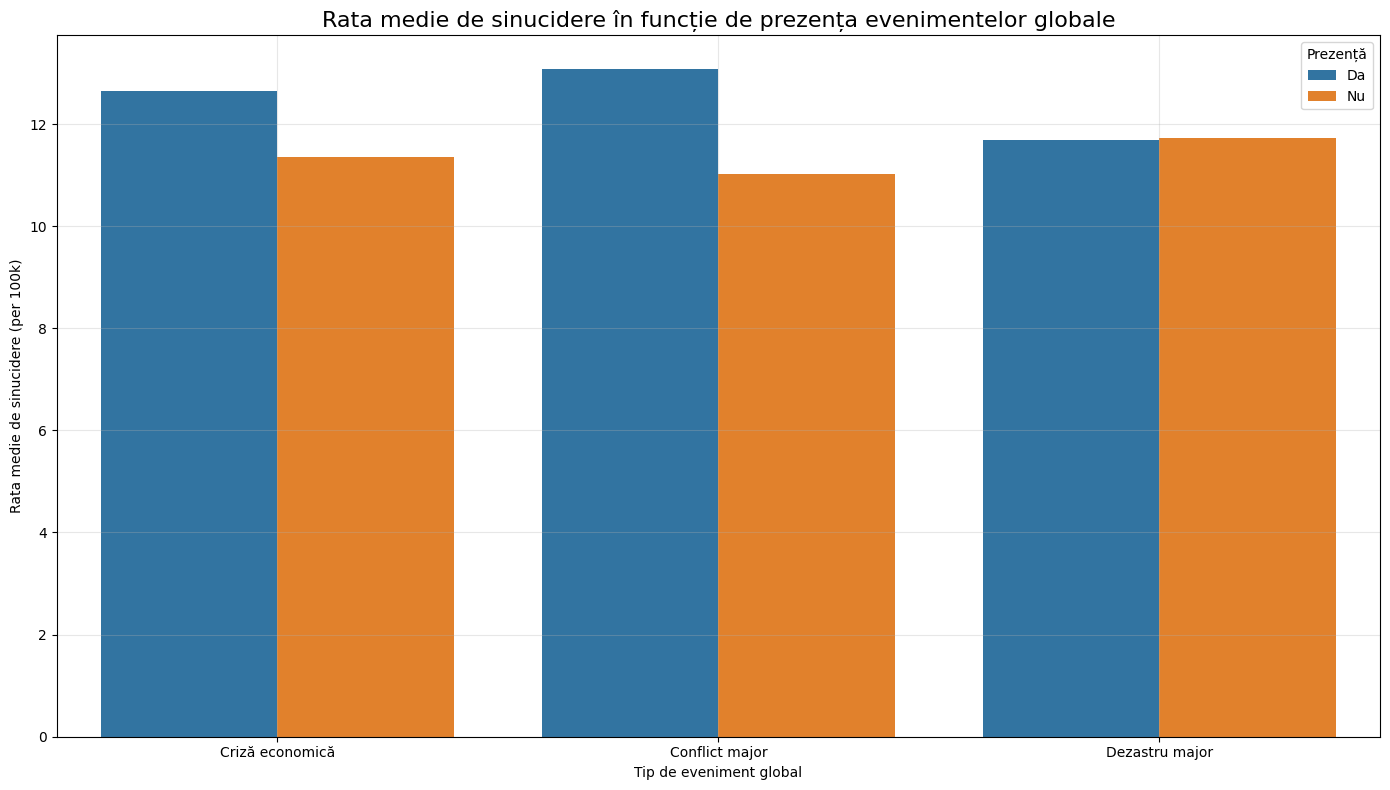


Testarea semnificației statistice a diferențelor:
Crize economice: t-statistic = 4.8247, p-value = 1.4088e-06, semnificativ: True
Conflicte majore: t-statistic = 8.0339, p-value = 9.7697e-16, semnificativ: True
Dezastre naturale: t-statistic = -0.0981, p-value = 9.2188e-01, semnificativ: False


In [ ]:
# Creăm o variabilă dummy pentru anii cu crize economice majore
economic_crisis_years = [1997, 1998, 2001, 2002, 2008, 2009, 2010, 2011, 2012]
df['economic_crisis'] = df['year'].apply(lambda x: 1 if x in economic_crisis_years else 0)

# Creăm o variabilă dummy pentru anii cu conflicte majore
major_conflict_years = [1990, 1991, 1992, 1993, 1994, 1995, 2001, 2002, 2003, 2011, 2014, 2015]
df['major_conflict'] = df['year'].apply(lambda x: 1 if x in major_conflict_years else 0)

# Creăm o variabilă dummy pentru anii cu dezastre naturale majore
major_disaster_years = [2004, 2005, 2010, 2011]
df['major_disaster'] = df['year'].apply(lambda x: 1 if x in major_disaster_years else 0)

# Calculăm rata medie de sinucidere pentru fiecare tip de eveniment
event_means = pd.DataFrame({
    'Tip eveniment': ['Cu criză economică', 'Fără criză economică',
                     'Cu conflict major', 'Fără conflict major',
                     'Cu dezastru major', 'Fără dezastru major'],
    'Rata medie de sinucidere': [
        df[df['economic_crisis'] == 1]['suicides/100k pop'].mean(),
        df[df['economic_crisis'] == 0]['suicides/100k pop'].mean(),
        df[df['major_conflict'] == 1]['suicides/100k pop'].mean(),
        df[df['major_conflict'] == 0]['suicides/100k pop'].mean(),
        df[df['major_disaster'] == 1]['suicides/100k pop'].mean(),
        df[df['major_disaster'] == 0]['suicides/100k pop'].mean()
    ]
})

print("Rata medie de sinucidere în funcție de prezența evenimentelor globale:")
print(event_means)

# Vizualizăm diferențele
plt.figure(figsize=(14, 8))
barplot_data = pd.DataFrame({
    'Categorie': ['Criză economică', 'Criză economică', 'Conflict major', 'Conflict major', 'Dezastru major', 'Dezastru major'],
    'Prezență': ['Da', 'Nu', 'Da', 'Nu', 'Da', 'Nu'],
    'Rata medie': event_means['Rata medie de sinucidere'].values
})

sns.barplot(x='Categorie', y='Rata medie', hue='Prezență', data=barplot_data)
plt.title('Rata medie de sinucidere în funcție de prezența evenimentelor globale', fontsize=16)
plt.xlabel('Tip de eveniment global')
plt.ylabel('Rata medie de sinucidere (per 100k)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Testăm semnificația statistică a diferențelor
from scipy.stats import ttest_ind

print("\nTestarea semnificației statistice a diferențelor:")

# Crize economice
t_stat, p_val = ttest_ind(
    df[df['economic_crisis'] == 1]['suicides/100k pop'].dropna(),
    df[df['economic_crisis'] == 0]['suicides/100k pop'].dropna()
)
print(f"Crize economice: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}, semnificativ: {p_val < 0.05}")

# Conflicte majore
t_stat, p_val = ttest_ind(
    df[df['major_conflict'] == 1]['suicides/100k pop'].dropna(),
    df[df['major_conflict'] == 0]['suicides/100k pop'].dropna()
)
print(f"Conflicte majore: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}, semnificativ: {p_val < 0.05}")

# Dezastre naturale majore
t_stat, p_val = ttest_ind(
    df[df['major_disaster'] == 1]['suicides/100k pop'].dropna(),
    df[df['major_disaster'] == 0]['suicides/100k pop'].dropna()
)
print(f"Dezastre naturale: t-statistic = {t_stat:.4f}, p-value = {p_val:.4e}, semnificativ: {p_val < 0.05}")

=== REZUMATUL TUTUROR CORELAȚIILOR DETECTATE ===

                                            Corelație   Valoare
44                  HDI - Rata sinucidere (1985-1994)  0.161863
22                     HDI - Rata sinucidere (Silent)  0.155551
40                    HDI - Rata sinucidere (Oceania)  0.155008
12                  HDI - Rata sinucidere (75+ years)  0.151026
43       PIB per capita - Rata sinucidere (1985-1994)  0.143532
16                HDI - Rata sinucidere (55-74 years)  0.132529
48                  HDI - Rata sinucidere (2005-2015)  0.129811
38                       HDI - Rata sinucidere (Asia)  0.128492
26                    HDI - Rata sinucidere (Boomers)  0.117465
46                  HDI - Rata sinucidere (1995-2004)  0.116321
10                HDI - Rata sinucidere (35-54 years)  0.109285
6                       HDI - Rata sinucidere (femei)  0.107696
5                     HDI - Rata sinucidere (bărbați)  0.095444
1                      HDI - Rata sinucidere (global) 

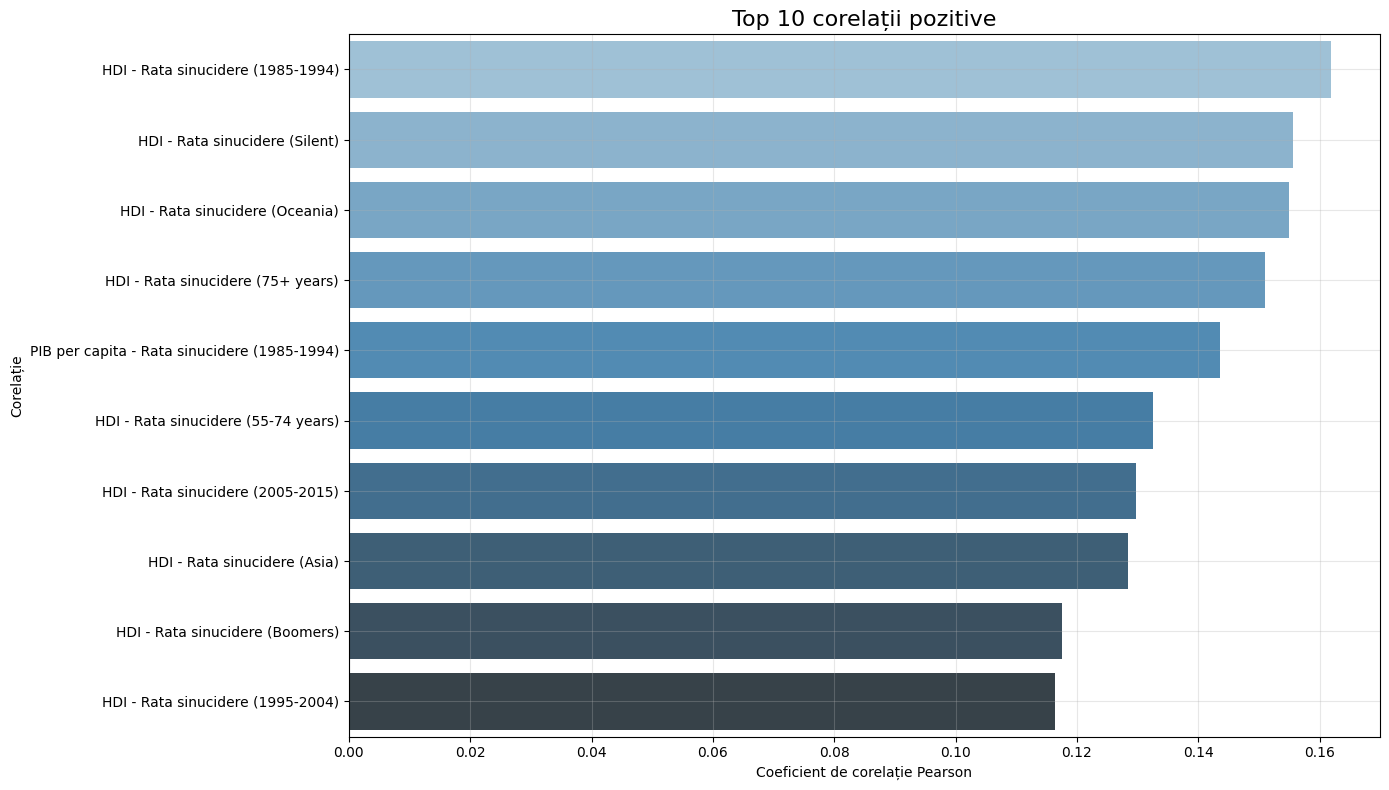

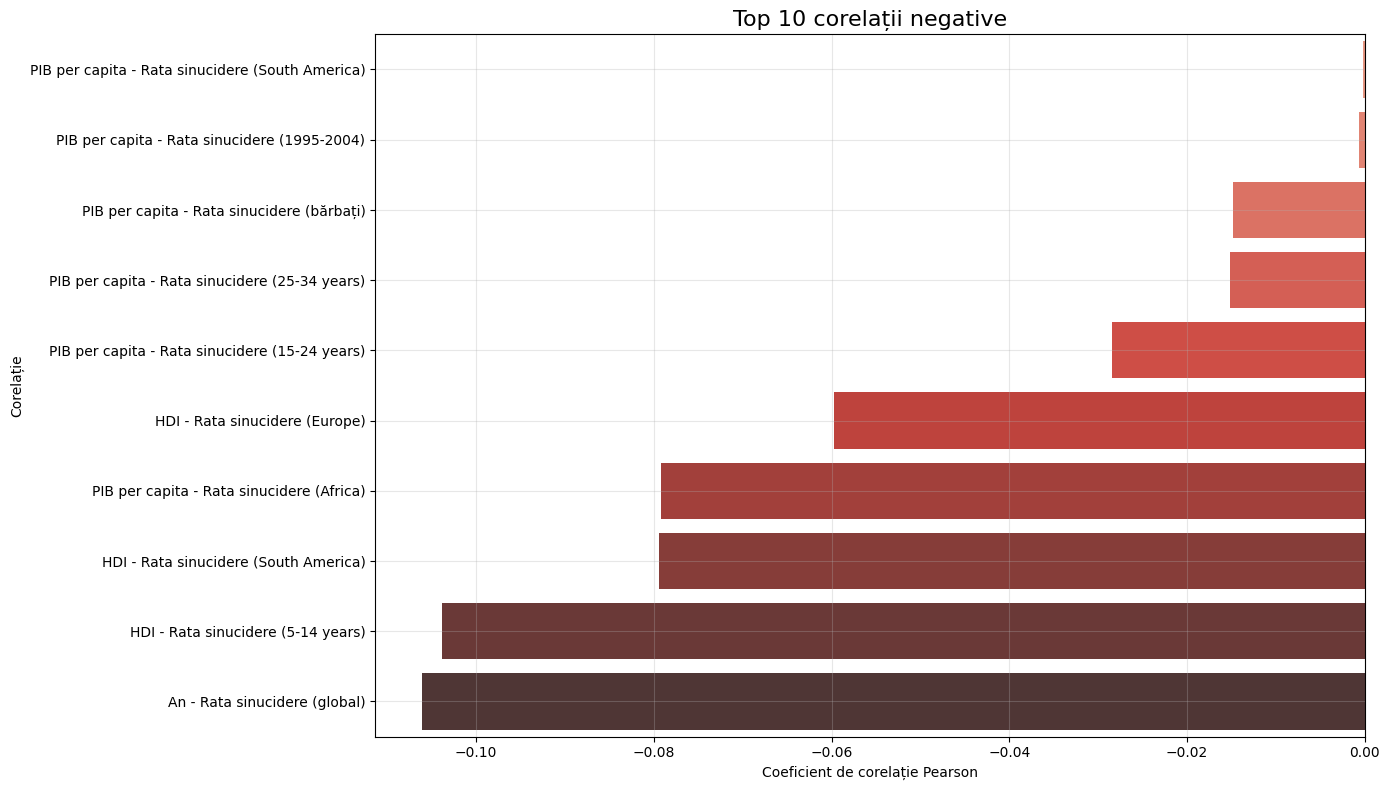

In [ ]:
# Creăm un dicționar pentru a stoca toate corelațiile importante
correlations = {}

# Corelații globale
correlations['PIB per capita - Rata sinucidere (global)'] = correlation_matrix.loc['gdp_per_capita ($)', 'suicides/100k pop']
correlations['HDI - Rata sinucidere (global)'] = correlation_matrix.loc['HDI for year', 'suicides/100k pop']
correlations['An - Rata sinucidere (global)'] = correlation_matrix.loc['year', 'suicides/100k pop']

# Corelații pe gen
correlations['PIB per capita - Rata sinucidere (bărbați)'] = male_corr.loc['gdp_per_capita ($)', 'suicides/100k pop']
correlations['PIB per capita - Rata sinucidere (femei)'] = female_corr.loc['gdp_per_capita ($)', 'suicides/100k pop']
correlations['HDI - Rata sinucidere (bărbați)'] = male_corr.loc['HDI for year', 'suicides/100k pop']
correlations['HDI - Rata sinucidere (femei)'] = female_corr.loc['HDI for year', 'suicides/100k pop']

# Șablonul pentru corelațiile pe grupă de vârstă
for age in age_groups:
    correlations[f'PIB per capita - Rata sinucidere ({age})'] = age_corr_matrices[age].loc['gdp_per_capita ($)', 'suicides/100k pop']
    correlations[f'HDI - Rata sinucidere ({age})'] = age_corr_matrices[age].loc['HDI for year', 'suicides/100k pop']

# Șablonul pentru corelațiile pe generații
for gen in generations:
    correlations[f'PIB per capita - Rata sinucidere ({gen})'] = gen_corr_matrices[gen].loc['gdp_per_capita ($)', 'suicides/100k pop']
    correlations[f'HDI - Rata sinucidere ({gen})'] = gen_corr_matrices[gen].loc['HDI for year', 'suicides/100k pop']

# Șablonul pentru corelațiile pe continente
for continent in continent_corr_matrices.keys():
    correlations[f'PIB per capita - Rata sinucidere ({continent})'] = continent_corr_matrices[continent].loc['gdp_per_capita ($)', 'suicides/100k pop']
    correlations[f'HDI - Rata sinucidere ({continent})'] = continent_corr_matrices[continent].loc['HDI for year', 'suicides/100k pop']

# Corelații pe perioade
for (start, end) in period_ranges:
    correlations[f'PIB per capita - Rata sinucidere ({start}-{end})'] = period_matrices[(start, end)].loc['gdp_per_capita ($)', 'suicides/100k pop']
    correlations[f'HDI - Rata sinucidere ({start}-{end})'] = period_matrices[(start, end)].loc['HDI for year', 'suicides/100k pop']

# Convertim în DataFrame pentru afișare
corr_df = pd.DataFrame(list(correlations.items()), columns=['Corelație', 'Valoare'])
corr_df = corr_df.sort_values(by='Valoare', ascending=False)

print("=== REZUMATUL TUTUROR CORELAȚIILOR DETECTATE ===\n")
print(corr_df)

# Vizualizarea celor mai puternice 10 corelații pozitive
plt.figure(figsize=(14, 8))
top_positive = corr_df[corr_df['Valoare'] > 0].head(10)
sns.barplot(x='Valoare', y='Corelație', data=top_positive, palette='Blues_d')
plt.title('Top 10 corelații pozitive', fontsize=16)
plt.xlabel('Coeficient de corelație Pearson')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Vizualizarea celor mai puternice 10 corelații negative
plt.figure(figsize=(14, 8))
top_negative = corr_df[corr_df['Valoare'] < 0].head(10)
sns.barplot(x='Valoare', y='Corelație', data=top_negative, palette='Reds_d')
plt.title('Top 10 corelații negative', fontsize=16)
plt.xlabel('Coeficient de corelație Pearson')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Importăm biblioteca necesară
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

print("=== ANALIZĂ ANOVA ===\n")

# ANOVA pentru verificarea diferențelor între continente
continent_model = ols('suicides_no ~ C(continent)', data=df).fit()
continent_anova = anova_lm(continent_model)
print("ANOVA pentru diferențe în numărul de sinucideri între continente:")
print(continent_anova)

# ANOVA pentru verificarea diferențelor între grupe de vârstă
age_model = ols('suicides_no ~ C(age)', data=df).fit()
age_anova = anova_lm(age_model)
print("\nANOVA pentru diferențe în numărul de sinucideri între grupe de vârstă:")
print(age_anova)

# ANOVA pentru verificarea diferențelor între generații
generation_model = ols('suicides_no ~ C(generation)', data=df).fit()
generation_anova = anova_lm(generation_model)
print("\nANOVA pentru diferențe în numărul de sinucideri între generații:")
print(generation_anova)

=== ANALIZĂ ANOVA ===

ANOVA pentru diferențe în numărul de sinucideri între continente:
                   df        sum_sq       mean_sq          F        PR(>F)
C(continent)      5.0  1.241988e+08  2.483975e+07  34.350483  3.856761e-35
Residual      31750.0  2.295927e+10  7.231267e+05        NaN           NaN

ANOVA pentru diferențe în numărul de sinucideri între grupe de vârstă:
               df        sum_sq       mean_sq           F         PR(>F)
C(age)        5.0  7.388350e+08  1.477670e+08  209.965469  4.542821e-221
Residual  31750.0  2.234464e+10  7.037681e+05         NaN            NaN

ANOVA pentru diferențe în numărul de sinucideri între generații:
                    df        sum_sq       mean_sq           F         PR(>F)
C(generation)      5.0  3.935044e+08  7.870088e+07  110.125885  9.652471e-116
Residual       31750.0  2.268997e+10  7.146447e+05         NaN            NaN


In [ ]:
# Importăm biblioteca necesară
from scipy.stats import chi2_contingency

print("=== ANALIZĂ CHI-PĂTRAT ===\n")

# Analiza relației între gen și prezența crizelor economice
gender_crisis_table = pd.crosstab(df['sex'], df['economic_crisis'])
chi2, p, dof, expected = chi2_contingency(gender_crisis_table)
print("Testul Chi-pătrat pentru relația între gen și prezența crizelor economice:")
print(f"Chi2 = {chi2:.4f}, p-value = {p:.4e}, grade de libertate = {dof}")
print(f"Semnificativ statistic (α=0.05): {p < 0.05}")
print("\nTabelul de contingență observat:")
print(gender_crisis_table)
print("\nTabelul de contingență așteptat:")
print(pd.DataFrame(expected, index=gender_crisis_table.index, columns=gender_crisis_table.columns))

# Analiza relației între grupă de vârstă și prezența crizelor economice
age_crisis_table = pd.crosstab(df['age'], df['economic_crisis'])
chi2, p, dof, expected = chi2_contingency(age_crisis_table)
print("\nTestul Chi-pătrat pentru relația între grupa de vârstă și prezența crizelor economice:")
print(f"Chi2 = {chi2:.4f}, p-value = {p:.4e}, grade de libertate = {dof}")
print(f"Semnificativ statistic (α=0.05): {p < 0.05}")

=== ANALIZĂ CHI-PĂTRAT ===

Testul Chi-pătrat pentru relația între gen și prezența crizelor economice:
Chi2 = 0.0000, p-value = 1.0000e+00, grade de libertate = 1
Semnificativ statistic (α=0.05): False

Tabelul de contingență observat:
economic_crisis      0     1
sex                         
female           11324  4554
male             11324  4554

Tabelul de contingență așteptat:
economic_crisis        0       1
sex                             
female           11324.0  4554.0
male             11324.0  4554.0

Testul Chi-pătrat pentru relația între grupa de vârstă și prezența crizelor economice:
Chi2 = 0.0651, p-value = 9.9994e-01, grade de libertate = 5
Semnificativ statistic (α=0.05): False


## Vizualizări

Vizualizarea distribuției datelor
* Histograme pentru variabilele numerice
* Diagrame de tip bar chart pentru variabilele categorice


Vizualizarea tendințelor temporale
* Grafice de linie pentru evoluția sinuciderilor de-a lungul timpului
* Heatmap-uri pentru reprezentarea tendințelor în funcție de mai multe variabile


Vizualizarea comparativă
* Box plot-uri pentru compararea distribuțiilor între grupuri
* Diagrame de tip bar chart grupate pentru comparații între categorii


Vizualizarea corelațiilor
* Heatmap pentru matricea de corelație
* Scatter plot-uri pentru relațiile între variabile continue


Vizualizări geografice
* Hărți coropleth pentru distribuția globală a sinuciderilor
* Comparații regionale

## Ipoteze

Formularea ipotezelor bazate pe analiză
* Identificarea relațiilor potențiale între variabile
* Propunerea unor explicații pentru tendințele observate


Validarea preliminară a ipotezelor
* Testarea preliminară a ipotezelor folosind datele disponibile
* Discutarea limitărilor analizei


Propuneri pentru analize ulterioare
* Sugestii pentru explorări suplimentare
* Variabile sau relații care necesită investigații mai detaliate


Concluzii preliminare
* Sumarizarea principalelor descoperiri
* Implicații ale analizei pentru etapa următoare a proiectului

# Etapa 2: Modelarea datelor



În a doua etapă, echipele vor aplica tehnici de învățare automată pentru modelarea datelor. Vor implementa metode de regresie, clasificare sau clustering, în funcție de specificul setului de date ales. Evaluarea performanței modelelor și interpretarea rezultatelor vor fi esențiale în această etapă.




# Etapa 3: Prezentarea proiectului


În ultima etapă, fiecare echipă va prezenta proiectul în fața clasei, explicând pașii parcurși, metodele utilizate și concluziile obținute. Veți discuta despre procesul de analiză a datelor, modelele aplicate și vizualizările realizate, oferind o înțelegere completă a proiectului.
